# Problem solving:
Analyzing the prices of Laptops available on *Flipkart* based on their Specifications
-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
laptops_df = pd.read_csv('flipkart_laptops.csv')
laptops_df

Unnamed: 0            brand               model  \
0             0  SponsoredLenovo      IdeaPad Slim 3   
1             1  SponsoredLenovo      IdeaPad Slim 5   
2             2         Colorful           Evol P-15   
3             3           Lenovo   V15 Intel Celeron   
4             4             ASUS  X1502ZA Intel Core   
..          ...              ...                 ...   
931         931     SponsoredAXL  Intel Celeron Dual   
932         932             ASUS       Intel Core i3   
933         933          Ultimus    Elite Intel Core   
934         934           Lenovo      IdeaPad Flex 5   
935         935           Lenovo       V15 AMD Ryzen   

                                processor  ram  memory    ratings  reviews  \
0                 Core i5 13th Gen 13420H   16   512.0     4.318       0.0   
1                 Core i5 13th Gen 13500H   16   512.0    4.2248      37.0   
2                 Core i5 12th Gen 12450H   16   512.0        NaN      NaN   
3               Celeron Dual Core 4th Gen    8   256.0        NaN    189.0   
4                  Core i5 12th Gen 1235U    8   512.0     3.813       3.0   
..                                    ...  ...     ...        ...      ...   
931  SponsoredAXL Intel Celeron Dual Core    4   256.0     3.521       0.0   
932                Intel Core i3 10th Gen    4     1.0     3.850       9.0   
933                Intel Core i5 10th Gen    8   512.0    3.7291      75.0   
934               Ryzen 5 Hexa Core 7530U   16   512.0     4.534       4.0   
935               Ryzen 5 Hexa Core 5500U    8   512.0  4.21,256     128.0   

    ram_version  display_inch  warranty  price  
0          DDR5          15.6       1.0  59390  
1          DDR5          16.0       NaN  71990  
2          DDR5          15.6       2.0  65640  
3          DDR4          15.6       1.0  19990  
4          DDR4          15.6       NaN  45900  
..          ...           ...       ...    ...  
931        DDR4          15.6       1.0  16990  
932        DDR4          15.6       1.0  31500  
933        DDR4          14.1       1.0  26990  
934       DDR4X          14.0     211.0  64400  
935        DDR4          15.6       1.0  33941  

[936 rows x 12 columns]

In [3]:
laptops_df.drop(columns=['Unnamed: 0'],inplace=True)

### Identifying & Handling duplicates

In [4]:
# checking for the duplicate values 
laptops_df[(laptops_df.duplicated(keep='first'))]

brand               model  \
26   SponsoredLenovo      IdeaPad Slim 3   
27   SponsoredLenovo      IdeaPad Slim 5   
30    SponsoredCHUWI  Intel Celeron Dual   
31   SponsoredLenovo      IdeaPad Slim 5   
36      SponsoredAXL  Intel Celeron Dual   
..               ...                 ...   
925             Acer      Aspire 3 Intel   
926   SponsoredCHUWI  Intel Celeron Dual   
927   SponsoredCHUWI  Intel Celeron Quad   
930  SponsoredLenovo      IdeaPad Flex 5   
931     SponsoredAXL  Intel Celeron Dual   

                                processor  ram  memory  ratings  reviews  \
26                Core i5 13th Gen 13420H   16   512.0   4.318       0.0   
27                Core i5 13th Gen 13500H   16   512.0  4.2248      37.0   
30               Dual Core 11th Gen N4020    8   256.0  3.7327      54.0   
31                Core i5 12th Gen 12450H   16   512.0  4.2103      12.0   
36   SponsoredAXL Intel Celeron Dual Core    4   256.0   3.521       0.0   
..                                    ...  ...     ...      ...      ...   
925                Core i3 12th Gen 1215U    8   512.0   3.810       0.0   
926              Dual Core 11th Gen N4020    8   256.0  3.7327      54.0   
927               Quad Core 12th Gen N100    8   256.0      NaN     15.0   
930                Core i5 13th Gen 1335U   16   512.0   4.621       8.0   
931  SponsoredAXL Intel Celeron Dual Core    4   256.0   3.521       0.0   

    ram_version  display_inch  warranty  price  
26         DDR5          15.6       1.0  59390  
27         DDR5          16.0       NaN  71990  
30         DDR4          15.6       1.0  18990  
31         DDR5          14.0       1.0  60190  
36         DDR4          15.6       1.0  16990  
..          ...           ...       ...    ...  
925        DDR5          15.6       1.0  33490  
926        DDR4          15.6       1.0  18990  
927        DDR5          14.1       1.0  18990  
930       DDR4X          14.0       1.0  77190  
931        DDR4          15.6       1.0  16990  

[361 rows x 11 columns]

In [5]:
# dropping the duplicate values

In [6]:
laptops_df.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [7]:
df = laptops_df.copy()

In [8]:
df

brand               model                  processor  ram  \
0    SponsoredLenovo      IdeaPad Slim 3    Core i5 13th Gen 13420H   16   
1    SponsoredLenovo      IdeaPad Slim 5    Core i5 13th Gen 13500H   16   
2           Colorful           Evol P-15    Core i5 12th Gen 12450H   16   
3             Lenovo   V15 Intel Celeron  Celeron Dual Core 4th Gen    8   
4               ASUS  X1502ZA Intel Core     Core i5 12th Gen 1235U    8   
..               ...                 ...                        ...  ...   
570             ASUS         AMD Ryzen 5      AMD Ryzen 5 Hexa Core    8   
571             ASUS       Intel Core i3     Intel Core i3 10th Gen    4   
572          Ultimus    Elite Intel Core     Intel Core i5 10th Gen    8   
573           Lenovo      IdeaPad Flex 5    Ryzen 5 Hexa Core 7530U   16   
574           Lenovo       V15 AMD Ryzen    Ryzen 5 Hexa Core 5500U    8   

     memory    ratings  reviews ram_version  display_inch  warranty  price  
0     512.0     4.318       0.0        DDR5          15.6       1.0  59390  
1     512.0    4.2248      37.0        DDR5          16.0       NaN  71990  
2     512.0        NaN      NaN        DDR5          15.6       2.0  65640  
3     256.0        NaN    189.0        DDR4          15.6       1.0  19990  
4     512.0     3.813       3.0        DDR4          15.6       NaN  45900  
..      ...        ...      ...         ...           ...       ...    ...  
570   512.0     4.618       2.0        DDR4          15.6       NaN  39999  
571     1.0     3.850       9.0        DDR4          15.6       1.0  31500  
572   512.0    3.7291      75.0        DDR4          14.1       1.0  26990  
573   512.0     4.534       4.0       DDR4X          14.0     211.0  64400  
574   512.0  4.21,256     128.0        DDR4          15.6       1.0  33941  

[575 rows x 11 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         575 non-null    object 
 1   model         575 non-null    object 
 2   processor     548 non-null    object 
 3   ram           575 non-null    int64  
 4   memory        572 non-null    float64
 5   ratings       438 non-null    object 
 6   reviews       473 non-null    float64
 7   ram_version   565 non-null    object 
 8   display_inch  560 non-null    float64
 9   warranty      542 non-null    float64
 10  price         575 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 49.5+ KB


In [12]:
df.isna().sum()

brand             0
model             0
processor        27
ram               0
memory            3
ratings         137
reviews         102
ram_version      10
display_inch     15
warranty         33
price             0
dtype: int64

In [13]:
df.isna().sum() / len(df)*100

brand            0.000000
model            0.000000
processor        4.695652
ram              0.000000
memory           0.521739
ratings         23.826087
reviews         17.739130
ram_version      1.739130
display_inch     2.608696
warranty         5.739130
price            0.000000
dtype: float64

# Data cleaning

In [14]:
df['brand'].value_counts()

brand
HP                 134
ASUS               120
Lenovo              86
DELL                52
Acer                43
MSI                 36
Infinix             33
SAMSUNG             15
Apple               13
ZEBRONICS            6
Ultimus              5
SponsoredLenovo      5
Colorful             4
WINGS                4
MICROSOFT            4
CHUWI                3
SponsoredCHUWI       3
Primebook            2
SponsoredAXL         2
Avita                2
AXL                  1
GIGABYTE             1
LG                   1
Name: count, dtype: int64

In [15]:
# converting the incorrect brand names

In [16]:
df.loc[df['brand'].str.contains('Sponsored'), 'brand']

0      SponsoredLenovo
1      SponsoredLenovo
7      SponsoredLenovo
10      SponsoredCHUWI
11      SponsoredCHUWI
16     SponsoredLenovo
17        SponsoredAXL
20      SponsoredCHUWI
123    SponsoredLenovo
494       SponsoredAXL
Name: brand, dtype: object

In [17]:
df.loc[df['brand'].str.contains('Sponsored'),'brand'].unique()

array(['SponsoredLenovo', 'SponsoredCHUWI', 'SponsoredAXL'], dtype=object)

In [18]:
df.loc[1,'brand']

'SponsoredLenovo'

In [19]:
dic = {'SponsoredLenovo' : 'Lenovo', 'SponsoredCHUWI' : 'CHUWI', 'SponsoredAXL' : 'AXL'}
for i in range(len(df)):
    if df.loc[i,'brand'] in dic.keys() :
        df.loc[i,'brand'] = dic[df.loc[i,'brand']]

In [20]:
dic['SponsoredLenovo']

'Lenovo'

In [21]:
df.loc[1,'brand']

'Lenovo'

In [22]:
df['brand']

0        Lenovo
1        Lenovo
2      Colorful
3        Lenovo
4          ASUS
         ...   
570        ASUS
571        ASUS
572     Ultimus
573      Lenovo
574      Lenovo
Name: brand, Length: 575, dtype: object

In [23]:
df['brand'].value_counts()

brand
HP           134
ASUS         120
Lenovo        91
DELL          52
Acer          43
MSI           36
Infinix       33
SAMSUNG       15
Apple         13
CHUWI          6
ZEBRONICS      6
Ultimus        5
Colorful       4
WINGS          4
MICROSOFT      4
AXL            3
Primebook      2
Avita          2
GIGABYTE       1
LG             1
Name: count, dtype: int64

In [24]:
df['model'].value_counts()

model
Intel Core i5                  24
Intel Core i3                  21
IdeaPad Slim 3                 15
AMD Ryzen 5                    15
Inspiron Intel Core            11
                               ..
Stealth 15 Intel Core           1
Aspire 3 14                     1
Nuvobook S2 Aluminium Alloy     1
Aspire Lite Intel               1
Prestige 13 AI Evo              1
Name: count, Length: 250, dtype: int64

In [25]:
df['processor'].value_counts()

processor
Core i3 11th Gen 1115G4          28
Core i3 12th Gen 1215U           27
Core i5 12th Gen 1235U           23
Core i5 12th Gen 12450H          17
Core i5 13th Gen 1335U           17
                                 ..
AMD Ryzen 3 Octa Core             1
Intel Celeron Quad Core N4120     1
Ryzen 3 Quad Core 7330U           1
Core i3 12th Gen 1213U            1
Intel Core i3 10th Gen            1
Name: count, Length: 152, dtype: int64

In [26]:
df['processor'].str.extract('(\w+?\s?[\si]\d)\s').value_counts()

Core i5    162
Core i3     97
Core i7     81
Ryzen 5     64
Ryzen 7     26
Ryzen 3     24
Ultra 7      9
Core i9      8
Core 7       2
Ultra 5      2
Core 5       1
Ultra 9      1
Name: count, dtype: int64

In [27]:
df['processor'].str.extract('\s(\d.?.?[\sth])').value_counts()

12th    136
11th    101
13th     88
5        67
7        37
10th     25
3        24
14th      6
4th       4
8th       3
9th       3
6th       1
9         1
Name: count, dtype: int64

In [28]:
df['processor'].str.extract('\s(\d+\w+)$').value_counts()

1215U     28
1115G4    28
1235U     23
1335U     18
12450H    17
          ..
1250U      1
3550H      1
155U       1
185H       1
9300H      1
Name: count, Length: 87, dtype: int64

In [29]:
df['processor'].str.extract('\s(\w+?$)').value_counts()

Gen       47
1215U     28
1115G4    28
1235U     23
1335U     18
          ..
120U       1
7505       1
11900H     1
11500      1
155U       1
Name: count, Length: 106, dtype: int64

In [30]:
df['processor'].isna().sum()

27

In [31]:
df['ram']

0      16
1      16
2      16
3       8
4       8
       ..
570     8
571     4
572     8
573    16
574     8
Name: ram, Length: 575, dtype: int64

In [32]:
df['ram'].value_counts()

ram
8     290
16    240
4      28
32     17
Name: count, dtype: int64

In [33]:
# understanding the memory column 

In [34]:
df['memory'].value_counts() 

memory
512.0    404
1.0       93
256.0     55
128.0     10
64.0       7
2.0        1
32.0       1
51.0       1
Name: count, dtype: int64

In [35]:
# There are 3 laptops with 2TB, 32GB, 51GB
# There's no 51GB memory in laptops. So, converting the 51GB to 512GB by considering price


In [36]:
df[df['memory'].isin([51,2,32])]

brand                     model                      processor  ram  \
220  ASUS  ExpertBook B9 Intel Core        Core i7 10th Gen 10510U   16   
310  ASUS     Chromebook Flip Touch  Intel Celeron Dual Core N4020    4   
410  ASUS            TUF Gaming F15        Core i7 12th Gen 12700H   16   

     memory  ratings  reviews ram_version  display_inch  warranty   price  
220     2.0      NaN      NaN        DDR3          14.0       3.0  111127  
310    32.0      NaN    448.0        DDR4          11.6       1.0   29431  
410    51.0  4.4220      21.0        DDR4          15.6       1.0   99990

In [37]:
df[df['memory'].isin([51,2,32])].index

Index([220, 310, 410], dtype='int64')

In [38]:
# converting the memory size 1TB data to 1000GB
# correcting the missing value of 51 GB - 512GB

In [39]:
for i in range(len(df)):
    if df.loc[i,'memory'] == 51:
        df.loc[i,'memory'] = 512
    elif df.loc[i,'memory'] == 1:
        df.loc[i,'memory'] = 1000

In [40]:
df['memory'].value_counts()

memory
512.0     405
1000.0     93
256.0      55
128.0      10
64.0        7
2.0         1
32.0        1
Name: count, dtype: int64

In [41]:
# dropping the rows which contains memory values count - 1

In [42]:
df.drop(index= df[df['memory'].isin([2, 32])].index,inplace=True)

In [43]:
df.reset_index(drop=True,inplace=True)

In [44]:
df['memory'].value_counts()

memory
512.0     405
1000.0     93
256.0      55
128.0      10
64.0        7
Name: count, dtype: int64

In [45]:
df.head()

brand               model                  processor  ram  memory  \
0    Lenovo      IdeaPad Slim 3    Core i5 13th Gen 13420H   16   512.0   
1    Lenovo      IdeaPad Slim 5    Core i5 13th Gen 13500H   16   512.0   
2  Colorful           Evol P-15    Core i5 12th Gen 12450H   16   512.0   
3    Lenovo   V15 Intel Celeron  Celeron Dual Core 4th Gen    8   256.0   
4      ASUS  X1502ZA Intel Core     Core i5 12th Gen 1235U    8   512.0   

   ratings  reviews ram_version  display_inch  warranty  price  
0   4.318       0.0        DDR5          15.6       1.0  59390  
1  4.2248      37.0        DDR5          16.0       NaN  71990  
2      NaN      NaN        DDR5          15.6       2.0  65640  
3      NaN    189.0        DDR4          15.6       1.0  19990  
4   3.813       3.0        DDR4          15.6       NaN  45900

In [46]:
# cleaning the invalid values like (' ',',') present in the ratings column
# rounding the deciaml values into 1 decimal value by converting the format

In [47]:
df['ratings'].astype(str)

0         4.318 
1        4.2248 
2            nan
3            nan
4         3.813 
         ...    
568       4.618 
569       3.850 
570      3.7291 
571       4.534 
572    4.21,256 
Name: ratings, Length: 573, dtype: object

In [48]:
df['ratings'] = df['ratings'].str.strip(' ').str.replace(',','').astype(float).round(1)

In [49]:
df['ratings']

0      4.3
1      4.2
2      NaN
3      NaN
4      3.8
      ... 
568    4.6
569    3.8
570    3.7
571    4.5
572    4.2
Name: ratings, Length: 573, dtype: float64

In [50]:
df['ratings'].describe()

count    438.000000
mean       4.233790
std        0.296971
min        3.300000
25%        4.100000
50%        4.300000
75%        4.400000
max        4.900000
Name: ratings, dtype: float64

In [51]:
df['ratings'].value_counts()

ratings
4.3    92
4.4    71
4.2    70
4.1    42
4.5    32
3.8    26
4.6    20
3.9    17
4.7    13
3.7    13
4.0    10
4.8     8
4.9     6
3.6     5
3.3     5
3.5     4
3.4     4
Name: count, dtype: int64

In [52]:
df.tail()

brand             model                processor  ram  memory  ratings  \
568     ASUS       AMD Ryzen 5    AMD Ryzen 5 Hexa Core    8   512.0      4.6   
569     ASUS     Intel Core i3   Intel Core i3 10th Gen    4  1000.0      3.8   
570  Ultimus  Elite Intel Core   Intel Core i5 10th Gen    8   512.0      3.7   
571   Lenovo    IdeaPad Flex 5  Ryzen 5 Hexa Core 7530U   16   512.0      4.5   
572   Lenovo     V15 AMD Ryzen  Ryzen 5 Hexa Core 5500U    8   512.0      4.2   

     reviews ram_version  display_inch  warranty  price  
568      2.0        DDR4          15.6       NaN  39999  
569      9.0        DDR4          15.6       1.0  31500  
570     75.0        DDR4          14.1       1.0  26990  
571      4.0       DDR4X          14.0     211.0  64400  
572    128.0        DDR4          15.6       1.0  33941

In [53]:
df['reviews']

0        0.0
1       37.0
2        NaN
3      189.0
4        3.0
       ...  
568      2.0
569      9.0
570     75.0
571      4.0
572    128.0
Name: reviews, Length: 573, dtype: float64

In [54]:
df['reviews'].describe()


count    472.000000
mean      68.654661
std      136.663011
min        0.000000
25%        3.000000
50%       13.000000
75%       65.000000
max      944.000000
Name: reviews, dtype: float64

<Axes: ylabel='Density'>

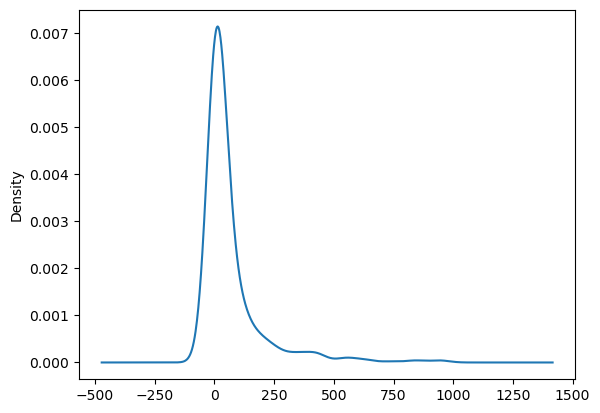

In [55]:
df['reviews'].plot(kind='kde')

In [56]:
df['ram_version']

0       DDR5
1       DDR5
2       DDR5
3       DDR4
4       DDR4
       ...  
568     DDR4
569     DDR4
570     DDR4
571    DDR4X
572     DDR4
Name: ram_version, Length: 573, dtype: object

In [57]:
df['ram_version'].value_counts()

ram_version
DDR4        368
DDR5        126
DDR4X        55
DDR5X         9
DDR3          4
DDR5DDR5      1
Name: count, dtype: int64

In [58]:
df.loc[df['ram_version'] == df['ram_version'].value_counts().index[-1]]

brand          model                                          processor  \
371  Acer  Extensa (2023  Ryzen 5 Quad Core 7520UThin and Light LaptopLP...   

     ram  memory  ratings  reviews ram_version  display_inch  warranty  price  
371    8   512.0      4.1    242.0    DDR5DDR5          15.6       1.0  32990

In [59]:
# converting the invalid ram_version 
df.loc[df['ram_version'] == 'DDR5DDR5','ram_version'] = 'DDR5'

In [60]:
df['ram_version'].value_counts()

ram_version
DDR4     368
DDR5     127
DDR4X     55
DDR5X      9
DDR3       4
Name: count, dtype: int64

In [61]:
df[df['ram_version'] == 'DDR3']

brand                     model                processor  ram  memory  \
307     HP       Spectre Folio Intel  Core i7 10th Gen 10510Y   16   512.0   
439   ASUS     ZenBook 13 Intel Core    Core i5 8th Gen 8250U    8   256.0   
467  Apple         MacBook Pro Intel    Intel Core i5 8th Gen    8   512.0   
545   ASUS  ExpertBook B9 Intel Core  Core i5 10th Gen 10210U    8   512.0   

     ratings  reviews ram_version  display_inch  warranty   price  
307      NaN      NaN        DDR3          13.3       1.0  188990  
439      4.6     92.0        DDR3          13.3       1.0   51840  
467      4.2     13.0        DDR3          13.3       1.0  162990  
545      NaN      NaN        DDR3          14.0       1.0   69911

In [62]:
df['display_inch']

0      15.6
1      16.0
2      15.6
3      15.6
4      15.6
       ... 
568    15.6
569    15.6
570    14.1
571    14.0
572    15.6
Name: display_inch, Length: 573, dtype: float64

In [63]:
df['display_inch'].value_counts()

display_inch
15.6    317
14.0    129
16.0     37
13.3     18
14.1     12
17.3     11
16.1      9
11.6      6
13.0      4
13.6      3
15.0      3
13.5      2
17.0      2
12.4      2
13.4      1
16.2      1
14.5      1
Name: count, dtype: int64

In [64]:
np.round(15.6)

16.0

In [65]:
np.round(df['display_inch'])

0      16.0
1      16.0
2      16.0
3      16.0
4      16.0
       ... 
568    16.0
569    16.0
570    14.0
571    14.0
572    16.0
Name: display_inch, Length: 573, dtype: float64

In [66]:
df['display_inch'] = np.round(df['display_inch'])

In [67]:
df['display_inch'].value_counts()

display_inch
16.0    364
14.0    147
13.0     23
17.0     13
12.0      8
15.0      3
Name: count, dtype: int64

In [68]:
df['warranty']

0        1.0
1        NaN
2        2.0
3        1.0
4        NaN
       ...  
568      NaN
569      1.0
570      1.0
571    211.0
572      1.0
Name: warranty, Length: 573, dtype: float64

In [69]:
df['warranty'].value_counts()

warranty
1.0      451
2.0       38
211.0     37
191.0      8
11.0       2
192.0      2
212.0      1
3.0        1
Name: count, dtype: int64

In [70]:
df['warranty']

0        1.0
1        NaN
2        2.0
3        1.0
4        NaN
       ...  
568      NaN
569      1.0
570      1.0
571    211.0
572      1.0
Name: warranty, Length: 573, dtype: float64

In [72]:
df['warranty'].isna().sum()

33

In [73]:
df['price']

0      59390
1      71990
2      65640
3      19990
4      45900
       ...  
568    39999
569    31500
570    26990
571    64400
572    33941
Name: price, Length: 573, dtype: int64

## Detecting & Handling Null values

In [74]:
df.isna().sum()

brand             0
model             0
processor        27
ram               0
memory            3
ratings         135
reviews         101
ram_version      10
display_inch     15
warranty         33
price             0
dtype: int64

In [75]:
df.isna().sum() / len(df) * 100

brand            0.000000
model            0.000000
processor        4.712042
ram              0.000000
memory           0.523560
ratings         23.560209
reviews         17.626527
ram_version      1.745201
display_inch     2.617801
warranty         5.759162
price            0.000000
dtype: float64

In [76]:
df.sort_values(by='price',ignore_index=True,inplace=True)

In [77]:
# null values in processor column
df[df['processor'].isna()]

brand                   model processor  ram  memory  ratings  reviews  \
13     ASUS   VivoBook 15 AMD Ryzen       NaN    4   256.0      4.3    224.0   
37       HP          841w6pa 255 g9       NaN    8   512.0      3.9      5.0   
44       HP          841w6pa 255 g9       NaN    8   512.0      3.9      5.0   
79       HP        255 G9 AMD Ryzen       NaN    8   512.0      NaN      NaN   
112      HP       250 G8 Intel Core       NaN    8   256.0      NaN      NaN   
113      HP       255 G9 Silver AMD       NaN    8   512.0      4.3      1.0   
123      HP       240 G8 Intel Core       NaN    8   512.0      3.7      7.0   
127      HP        Chromebook (2023       NaN    8   256.0      4.3      4.0   
146    DELL             AMD Ryzen 3       NaN    8   512.0      4.2      0.0   
151    ASUS      X1504ZA Intel Core       NaN    8   512.0      NaN      2.0   
182    ASUS      X1502ZA Intel Core       NaN    8   512.0      NaN      NaN   
214    ASUS  Vivobook 15 Intel Core       NaN    8   512.0      4.2     12.0   
272      HP       250 G8 Intel Core       NaN    8  1000.0      3.8      0.0   
274  Lenovo             AMD Ryzen 5       NaN    8   512.0      NaN      NaN   
329    ASUS        Vivobook 16X AMD       NaN   16   512.0      4.6      4.0   
331    ASUS      VivoBook Ultra AMD       NaN    8   512.0      4.3      8.0   
337    ASUS           Vivobook S 14       NaN    8   512.0      4.4      0.0   
341      HP     Pavilion Gaming AMD       NaN    8   512.0      4.0      7.0   
342    ASUS          TUF Gaming A15       NaN    8  1000.0      4.3    118.0   
372  Lenovo        IdeaPad Gaming 3       NaN   16   512.0      4.3     31.0   
374    ASUS       VivoBook K15 OLED       NaN   16   512.0      4.3    184.0   
387    DELL             AMD Ryzen 5       NaN    8   512.0      NaN     24.0   
389    DELL      Inspiron AMD Ryzen       NaN    8   512.0      4.5      1.0   
393      HP     Pavilion Gaming AMD       NaN   16  1000.0      4.4    154.0   
410    ASUS  Vivobook 15 Intel Core       NaN   16   512.0      4.0      1.0   
486    DELL             AMD Ryzen 7       NaN   16   512.0      4.1      2.0   
535    ASUS           ROG Strix G17       NaN   16  1000.0      4.7      5.0   

    ram_version  display_inch  warranty   price  
13         DDR4          16.0       NaN   18590  
37         DDR4          16.0       1.0   23990  
44         DDR4          16.0       1.0   25500  
79         DDR4          16.0       1.0   30999  
112        DDR4          16.0       1.0   32990  
113        DDR4          16.0       1.0   32999  
123        DDR4          14.0       1.0   33700  
127       DDR4X          13.0       1.0   33990  
146        DDR4          16.0       1.0   35190  
151        DDR4          16.0       NaN   35690  
182        DDR4          16.0       1.0   37990  
214        DDR4          16.0     211.0   42990  
272        DDR4          16.0       NaN   49990  
274        DDR4          16.0       1.0   50100  
329        DDR4          16.0       1.0   57000  
331        DDR4          14.0       1.0   57600  
337        DDR4          14.0       1.0   57990  
341        DDR4          16.0       NaN   58000  
342        DDR4          16.0       1.0   58949  
372        DDR4          16.0       1.0   63419  
374        DDR4          16.0       1.0   63990  
387        DDR5           NaN       1.0   66215  
389        DDR4          14.0     211.0   67690  
393        DDR4          16.0       1.0   68490  
410        DDR4          16.0       1.0   70990  
486        DDR5           NaN       1.0   91991  
535        DDR4          17.0     191.0  132990

In [78]:
# filled the missing values with bfill() method

df['processor'].bfill(inplace=True)


In [79]:
df[df['processor'].isna()]

Empty DataFrame
Columns: [brand, model, processor, ram, memory, ratings, reviews, ram_version, display_inch, warranty, price]
Index: []

In [80]:
df['memory'].isna().sum()

3

In [81]:
df['memory'].mode()[0]

512.0

In [82]:
# filling the missing values with mode of memory column
df['memory'].fillna(df['memory'].mode()[0],inplace=True)

In [83]:
df['memory'].value_counts()

memory
512.0     408
1000.0     93
256.0      55
128.0      10
64.0        7
Name: count, dtype: int64

In [84]:
df['memory'].isna().sum()

0

In [85]:
df['ratings']

0      3.6
1      NaN
2      NaN
3      3.8
4      4.2
      ... 
568    NaN
569    NaN
570    NaN
571    4.2
572    NaN
Name: ratings, Length: 573, dtype: float64

In [86]:
df['ratings'].describe()

count    438.000000
mean       4.233790
std        0.296971
min        3.300000
25%        4.100000
50%        4.300000
75%        4.400000
max        4.900000
Name: ratings, dtype: float64

<Axes: ylabel='Frequency'>

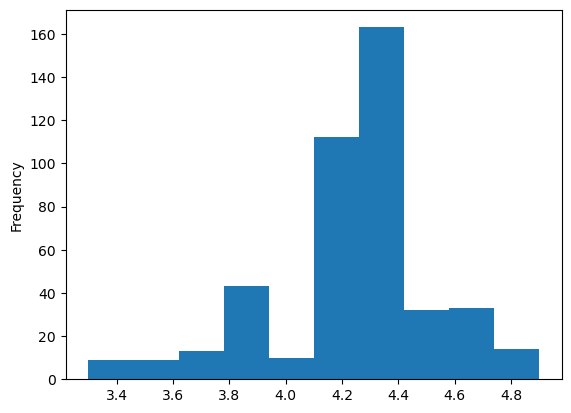

In [87]:
df['ratings'].plot(kind='hist')

In [88]:
df[df['ratings'].isna()]

brand                 model                        processor  ram  \
1      Ultimus    Intel Celeron Dual    Intel Celeron Dual Core N4020    4   
2      Ultimus    Intel Celeron Dual  Ultimus Intel Celeron Dual Core    4   
14       CHUWI    Intel Celeron Quad          Quad Core 12th Gen N100    8   
16       CHUWI    Intel Celeron Quad          Quad Core 12th Gen N100    8   
17     Infinix           Y1 Plus Neo         Quad Core 11th Gen N5100    4   
..         ...                   ...                              ...  ...   
567       DELL  Alienware Intel Core          Core i7 12th Gen 12700H   32   
568       Acer    Predator Helios 16         Core i9 14th Gen 14900HX   32   
569  MICROSOFT         Surface Pro 9           Core i7 12th Gen 1255U   32   
570      Apple      2023 MacBook Pro         MacBook Pro Apple M2 Max   32   
572     Lenovo     Legion Intel Core         Core i9 14th Gen 14900HX   32   

     memory  ratings  reviews ram_version  display_inch  warranty   price  
1     128.0      NaN      NaN        DDR4          14.0       1.0   12990  
2     128.0      NaN      NaN        DDR4          14.0       1.0   12990  
14    256.0      NaN     15.0        DDR5          14.0       1.0   18990  
16    256.0      NaN     15.0        DDR5          14.0       1.0   18990  
17    128.0      NaN    195.0       DDR4X          16.0       1.0   18990  
..      ...      ...      ...         ...           ...       ...     ...  
567  1000.0      NaN      NaN        DDR5          17.0       1.0  237890  
568  1000.0      NaN      NaN        DDR5          16.0       1.0  249999  
569  1000.0      NaN      NaN        DDR5          13.0       1.0  261990  
570  1000.0      NaN      0.0         NaN          14.0       1.0  282990  
572  1000.0      NaN      NaN        DDR5          16.0     211.0  374990  

[135 rows x 11 columns]

In [89]:
df['ratings'].skew()

-0.6779330037298673

In [90]:
df['ratings'].fillna(df['ratings'].mean())

0      3.60000
1      4.23379
2      4.23379
3      3.80000
4      4.20000
        ...   
568    4.23379
569    4.23379
570    4.23379
571    4.20000
572    4.23379
Name: ratings, Length: 573, dtype: float64

In [91]:
df['ratings'].fillna(df['ratings'].mean()).skew()

-0.7747738704196857

In [92]:
df['ratings'].interpolate(method='linear',inplace=True)

In [93]:
# filled the missing using interpolate method

df['ratings'].interpolate(method='linear').skew()

-0.6509161675580789

<Axes: ylabel='Frequency'>

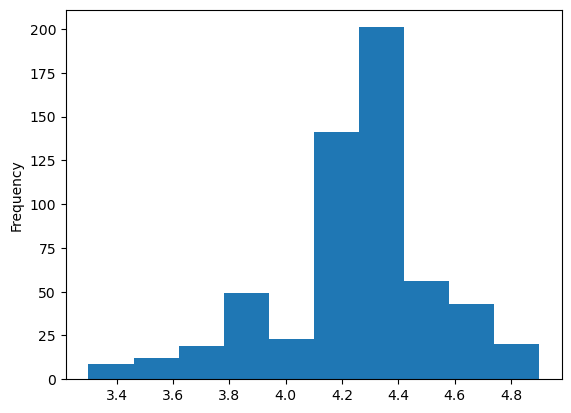

In [94]:
df['ratings'].interpolate(method='linear').plot(kind='hist')

In [95]:
df['ratings'].mean()

4.244851657940663

In [96]:
df['ratings'].round(1)

0      3.6
1      3.7
2      3.7
3      3.8
4      4.2
      ... 
568    4.3
569    4.3
570    4.2
571    4.2
572    4.2
Name: ratings, Length: 573, dtype: float64

In [97]:
df['ratings'] = df['ratings'].round(1)

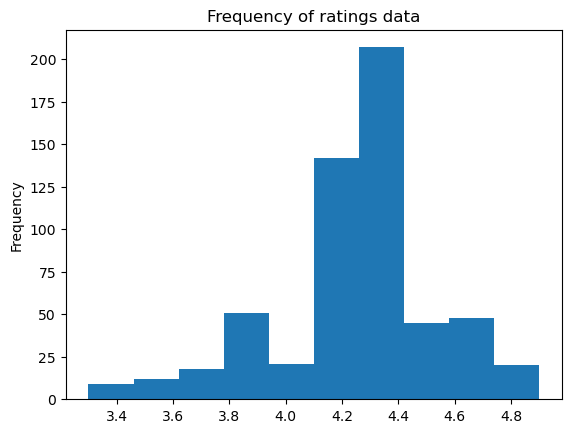

In [98]:
df['ratings'].plot(kind='hist')
plt.title('Frequency of ratings data')
plt.show()

In [99]:
df['reviews']

0        5.0
1        NaN
2        NaN
3      113.0
4      849.0
       ...  
568      NaN
569      NaN
570      0.0
571      5.0
572      NaN
Name: reviews, Length: 573, dtype: float64

In [100]:
df['reviews'].isna().sum()

101

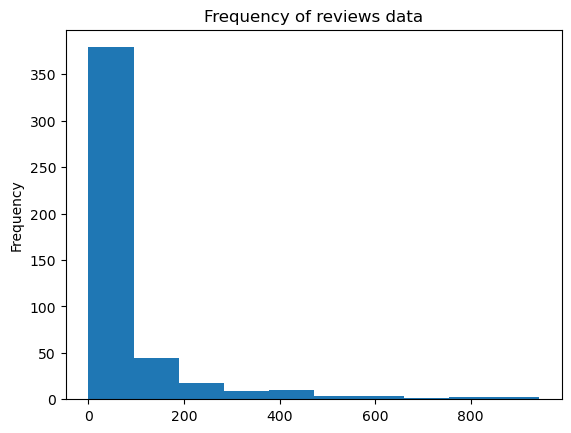

In [101]:
df['reviews'].plot(kind='hist')
plt.title('Frequency of reviews data')
plt.show()

In [102]:
df['reviews'].skew()

3.4795762585001757

In [103]:
df['reviews'].interpolate().skew()

3.8058087562222775

In [104]:
df['reviews'].mean(), df['reviews'].median()

(68.65466101694915, 13.0)

In [105]:
df['reviews'].fillna(df['reviews'].mean()).skew()

3.8316717125365733

In [106]:
df['reviews'].fillna(df['reviews'].median()).skew()

3.889134305475719

In [107]:
df['reviews'].interpolate(inplace=True)

In [108]:
# filled the missiing values of review column using interpolate method
df['reviews'].interpolate().skew()

3.8058087562222775

In [109]:
df['reviews'] = df['reviews'].astype(int)

In [110]:
df['ram_version']

0       DDR4
1       DDR4
2       DDR4
3      DDR4X
4       DDR4
       ...  
568     DDR5
569     DDR5
570      NaN
571      NaN
572     DDR5
Name: ram_version, Length: 573, dtype: object

In [111]:
df['ram_version'].value_counts()

ram_version
DDR4     368
DDR5     127
DDR4X     55
DDR5X      9
DDR3       4
Name: count, dtype: int64

In [112]:
df['ram_version'].mode()[0]

'DDR4'

In [113]:
df['ram_version'].fillna(df['ram_version'].mode()[0]).value_counts()

ram_version
DDR4     378
DDR5     127
DDR4X     55
DDR5X      9
DDR3       4
Name: count, dtype: int64

In [114]:
# immputing the missing values in ram_version column with mode
df['ram_version'].fillna(df['ram_version'].mode()[0],inplace=True)

In [115]:
df['display_inch']

0      12.0
1      14.0
2      14.0
3      14.0
4      12.0
       ... 
568    16.0
569    13.0
570    14.0
571    16.0
572    16.0
Name: display_inch, Length: 573, dtype: float64

In [116]:
df[df['display_inch'].isna()]

brand                    model                   processor  ram  \
30   Infinix              Y1 Plus Neo     Core 11th Gen JSL N5100    8   
51   Infinix     INBook X2 Plus Intel     Core i3 11th Gen 1115G4    8   
64    Lenovo            V15 AMD Ryzen     Ryzen 3 Quad Core 7320U    8   
67   Infinix     INBook Y1 Plus Intel     Core i3 10th Gen 1005G1    8   
140     DELL            Intel Core i3      Core i3 12th Gen 1215U    8   
141     DELL            Intel Core i3      Core i3 12th Gen 1215U    8   
147   Lenovo           IdeaPad Slim 3      Core i3 12th Gen 1215U    8   
176   Lenovo           IdeaPad Slim 3      Core i3 12th Gen 1215U    8   
247   Lenovo         IdeaPad Gaming 3     Ryzen 5 Quad Core 5500H    8   
354  Infinix  ZEROBOOK 13 Intel Intel     Core i7 13th Gen 13700H   16   
357     ASUS             ROG Ally AMD  Ryzen Z1 Octa Core Extreme   16   
387     DELL              AMD Ryzen 5     Ryzen 5 Hexa Core 7530U    8   
416     DELL           G15 Intel Core     Core i5 12th Gen 12500H   16   
443       HP        Envy x360 Creator      Core i5 12th Gen 1230U   16   
486     DELL              AMD Ryzen 7      Intel Core i7 13th Gen   16   

     memory  ratings  reviews ram_version  display_inch  warranty  price  
30    512.0      4.1      554       DDR4X           NaN       1.0  22990  
51    256.0      4.3      106       DDR4X           NaN       1.0  25990  
64    512.0      4.3       47        DDR5           NaN       1.0  27990  
67    512.0      4.2      547       DDR4X           NaN       1.0  28990  
140   512.0      4.2      172        DDR4           NaN       1.0  34990  
141   512.0      3.8        8        DDR4           NaN       1.0  34990  
147   512.0      4.2       78        DDR4           NaN       2.0  35250  
176   512.0      4.2       58        DDR4           NaN       2.0  37900  
247   512.0      4.2       22        DDR4           NaN       1.0  47990  
354   512.0      4.2       29       DDR5X           NaN       1.0  59990  
357   512.0      4.6       84        DDR5           NaN       1.0  59990  
387   512.0      4.2       24        DDR5           NaN       1.0  66215  
416   512.0      4.1       30        DDR5           NaN       1.0  72400  
443   512.0      4.3       21       DDR4X           NaN       1.0  78500  
486   512.0      4.1        2        DDR5           NaN       1.0  91991

In [117]:
df['display_inch'].value_counts()

display_inch
16.0    364
14.0    147
13.0     23
17.0     13
12.0      8
15.0      3
Name: count, dtype: int64

In [118]:
df['display_inch'].mode()[0]

16.0

In [119]:
df['display_inch'].skew()

-0.9786048795976721

In [120]:
df['display_inch'].interpolate().skew()

-0.9714865715521062

In [121]:
df['display_inch'].fillna(df['display_inch'].mode()[0]).skew()

-1.0196363772668895

In [122]:
# filled the missing values interpolate method
# becuase the skewness is - 0.971 (it is less compared to actual skewness of data)
df['display_inch'].interpolate(inplace=True)

In [123]:
df['display_inch'].isna().sum()

0

In [124]:
df['display_inch'].value_counts()

display_inch
16.000000    370
14.000000    150
13.000000     23
17.000000     13
12.000000      8
15.000000      7
15.333333      1
14.666667      1
Name: count, dtype: int64

In [125]:
df['display_inch'] = df['display_inch'].astype(int)

In [126]:
df['display_inch'].value_counts()

display_inch
16    370
14    151
13     23
17     13
12      8
15      8
Name: count, dtype: int64

In [127]:
df['warranty']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
       ...  
568      1.0
569      1.0
570      1.0
571      1.0
572    211.0
Name: warranty, Length: 573, dtype: float64

In [128]:
df['warranty'].value_counts()

warranty
1.0      451
2.0       38
211.0     37
191.0      8
11.0       2
192.0      2
212.0      1
3.0        1
Name: count, dtype: int64

In [129]:
df[df['warranty'].isna()]

brand                   model                      processor  ram  \
13     ASUS   VivoBook 15 AMD Ryzen        Quad Core 12th Gen N100    4   
60     ASUS  Vivobook Intel Celeron  Intel Celeron Dual Core N4020    8   
61   Lenovo             AMD Ryzen 3          AMD Ryzen 3 Octa Core    8   
80   Lenovo      V14 G3 (82TSA01KIH         Core i3 12th Gen 1213U    8   
96       HP          G Series Intel        Core i3 10th Gen 1005G1    4   
122  Lenovo           Intel Core i3         Intel Core i3 12th Gen    8   
151    ASUS      X1504ZA Intel Core        Core i3 11th Gen 1115G4    8   
160      HP           Intel Core i3         Intel Core i3 11th Gen    8   
163      HP           Intel Core i3         Intel Core i3 11th Gen    8   
195      HP             AMD Ryzen 5          AMD Ryzen 5 Quad Core    8   
200    ASUS             AMD Ryzen 5          AMD Ryzen 5 Hexa Core    8   
218  Lenovo          IdeaPad Slim 3        Core i5 11th Gen 1155G7    8   
234    ASUS      X1502ZA Intel Core         Core i5 12th Gen 1235U    8   
256    ASUS           Intel Core i5         Intel Core i5 10th Gen    8   
262      HP          15s Intel Core         Intel Core i5 12th Gen    8   
272      HP       250 G8 Intel Core          Intel Core i5 9th Gen    8   
273    Acer           Intel Core i5          Intel Core i5 9th Gen    8   
294    ASUS           Intel Core i5         Intel Core i5 12th Gen   16   
341      HP     Pavilion Gaming AMD        Core i5 12th Gen 12450H    8   
355    DELL        Inspiron 15 3530         Intel Core i5 13th Gen    8   
368    ASUS           Intel Core i5         Intel Core i5 13th Gen   16   
377      LG         Gram Intel Core         Core i5 12th Gen 1240P    8   
391    DELL     Inspiron 5430 Intel         Intel Core i5 13th Gen   16   
394    Acer           Nitro 5 (2023       Ryzen 5 Hexa Core 7535HS   16   
412  Lenovo          IdeaPad Slim 5        Core i5 13th Gen 13500H   16   
415    DELL     Inspiron 5430 Intel         Intel Core i5 13th Gen   16   
429    DELL     Inspiron 5000 Intel         Core i5 13th Gen 1340P   16   
466    ASUS             AMD Ryzen 7            7 Octa Core 6th Gen   16   
470  Lenovo          IdeaPad Slim 5        Core i7 13th Gen 13620H   16   
471    DELL           Intel Core i7         Intel Core i7 12th Gen   16   
483      HP           Intel Core i7         Intel Core i7 12th Gen   16   
484    Acer             Nitro 5 AMD        Ryzen 5 Hexa Core 5600H   16   
506      HP           Intel Core i7         Intel Core i7 12th Gen   16   

     memory  ratings  reviews ram_version  display_inch  warranty   price  
13    256.0      4.3      224        DDR4            16       NaN   18590  
60    512.0      3.8        0        DDR4            16       NaN   27890  
61    512.0      4.5        2        DDR4            14       NaN   27990  
80    512.0      4.1        2        DDR4            14       NaN   31000  
96    512.0      4.3       14        DDR4            16       NaN   31999  
122   512.0      3.3        0        DDR4            16       NaN   33590  
151   512.0      4.3        2        DDR4            16       NaN   35690  
160   512.0      4.3        4        DDR4            16       NaN   36200  
163   512.0      4.3        4        DDR4            16       NaN   36790  
195   512.0      4.2       33        DDR4            16       NaN   39990  
200   512.0      4.6        2        DDR4            16       NaN   39999  
218   512.0      4.3      413        DDR4            16       NaN   43500  
234   512.0      3.8        3        DDR4            16       NaN   45900  
256  1000.0      4.5        0        DDR4            16       NaN   48990  
262   512.0      4.1        3        DDR4            16       NaN   49990  
272  1000.0      3.8        0        DDR4            16       NaN   49990  
273  1000.0      4.0        4        DDR4            16       NaN   49999  
294   512.0      4.4        1        DDR4            16       NaN   52782  
341   512.0

In [130]:
df['warranty'].skew()

2.9051483460137697

In [131]:
df['warranty'].interpolate().skew()

2.8849606340033014

In [132]:
df['warranty'].mode()[0]

1.0

In [133]:
df['warranty'].fillna(df['warranty'].mode()[0]).skew()

3.020755733222495

In [134]:
# filling the missing values in warranty column with it's mode 
df['warranty'].fillna(df['warranty'].mode()[0],inplace=True)

In [135]:
df['warranty']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
       ...  
568      1.0
569      1.0
570      1.0
571      1.0
572    211.0
Name: warranty, Length: 573, dtype: float64

In [136]:
int(str(df.loc[572,'warranty'])[0])

2

In [137]:
for i in range(len(df)):
    df.loc[i,'warranty'] = int(str(df.loc[i,'warranty'])[0])

In [138]:
# converted the inappropriate values present in the warranty column
df['warranty'].value_counts()

warranty
1.0    496
2.0     76
3.0      1
Name: count, dtype: int64

In [139]:
df['warranty'].skew()

2.251688875389448

In [140]:
df[df['warranty'] == 3]

brand                     model                processor  ram  memory  \
408  ASUS  ExpertBook P2 Intel Core  Core i7 10th Gen 10510U    8  1000.0   

     ratings  reviews ram_version  display_inch  warranty  price  
408      4.4       87        DDR4            14       3.0  70279

In [141]:
# replacing the warranty of laptop which has 3 years with mode 
df.loc[df['warranty'] == 3,'warranty'] = df['warranty'].mode()[0]

In [142]:
df.loc[408:409]

brand                     model                processor  ram  memory  \
408  ASUS  ExpertBook P2 Intel Core  Core i7 10th Gen 10510U    8  1000.0   
409  ASUS            TUF Gaming F15  Core i5 12th Gen 12500H   16   512.0   

     ratings  reviews ram_version  display_inch  warranty  price  
408      4.4       87        DDR4            14       1.0  70279  
409      4.5       39        DDR4            16       1.0  70990

In [143]:
df['warranty'] = df['warranty'].astype(int)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         573 non-null    object 
 1   model         573 non-null    object 
 2   processor     573 non-null    object 
 3   ram           573 non-null    int64  
 4   memory        573 non-null    float64
 5   ratings       573 non-null    float64
 6   reviews       573 non-null    int64  
 7   ram_version   573 non-null    object 
 8   display_inch  573 non-null    int64  
 9   warranty      573 non-null    int64  
 10  price         573 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 49.4+ KB


In [145]:
df.isna().sum()

brand           0
model           0
processor       0
ram             0
memory          0
ratings         0
reviews         0
ram_version     0
display_inch    0
warranty        0
price           0
dtype: int64

## Detecting & Handling Outliers :

In [146]:
df['ram'].value_counts()

ram
8     290
16    239
4      27
32     17
Name: count, dtype: int64

In [147]:
ram_q1 = df['ram'].quantile(0.25)
ram_q3 = df['ram'].quantile(0.75)
ram_iqr = ram_q3 - ram_q1
ram_iqr

8.0

In [148]:
ram_ll = max(df['ram'].min(),ram_q1-1.5*ram_iqr)
ram_ul = min(df['ram'].max(),ram_q3+1.5*ram_iqr)
ram_ll,ram_ul

(4, 28.0)

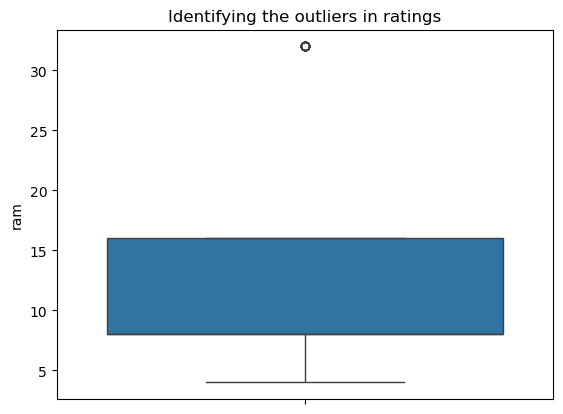

In [149]:
sns.boxplot(df['ram'])
plt.title('Identifying the outliers in ratings')
plt.show()

In [150]:
df[df['ram'] == 32].sample(5)

brand                 model                processor  ram  memory  \
549   MSI  Summit E16Flip Intel   Core i7 13th Gen 1360P   32  1000.0   
565   MSI  Stealth 16 AI Studio  Intel Core Ultra 7 155H   32  1000.0   
563   MSI     Pulse 17 AI Intel  Intel Core Ultra 9 185H   32  1000.0   
547    HP         Intel Core i7   Core i7 13th Gen 1355U   32  1000.0   
564    HP    Spectre x360 Intel  Intel Core Ultra 7 155H   32  1000.0   

     ratings  reviews ram_version  display_inch  warranty   price  
549      4.6        0        DDR5            16         2  159990  
565      4.4        0        DDR5            16         2  199990  
563      4.5        0        DDR5            17         2  189990  
547      4.8        0       DDR4X            14         1  152990  
564      4.5        0       DDR5X            16         1  195990

In [151]:
df[df['ram'] == 16].sample(5)

brand               model                 processor  ram  memory  \
531    Lenovo  Lenovo Legion Slim  Ryzen 7 Octa Core 7840HS   16   512.0   
439    Lenovo      IdeaPad Flex 5    Core i7 13th Gen 1355U   16   512.0   
382  Colorful           Evol P-15   Core i5 12th Gen 12450H   16   512.0   
372    Lenovo    IdeaPad Gaming 3   Ryzen 7 Octa Core 5700U   16   512.0   
211   Infinix      X2 Slim Series   Core i5 11th Gen 1155G7   16  1000.0   

     ratings  reviews ram_version  display_inch  warranty   price  
531      4.8        0        DDR5            16         1  128990  
439      4.8        2       DDR4X            14         2   77190  
382      4.3      122        DDR5            16         2   65640  
372      4.3       31        DDR4            16         1   63419  
211      4.2       40       DDR4X            14         1   42890

In [152]:
df[df['ram'] == 8].sample(5)

brand                   model                processor  ram  memory  \
237  Lenovo  ThinkBook 15 AMD Ryzen  Ryzen 7 Octa Core 7730U    8   512.0   
240    DELL           Intel Core i5  Core i5 11th Gen 1135G7    8   512.0   
171    DELL       Vostro Intel Core  Core i3 11th Gen 1115G4    8  1000.0   
89       HP       240 G8 Intel Core   Intel Core i3 11th Gen    8   512.0   
266  Lenovo        IdeaPad Gaming 3  Core i5 11th Gen 11300H    8   512.0   

     ratings  reviews ram_version  display_inch  warranty  price  
237      3.9        3        DDR4            16         1  46215  
240      3.4        0        DDR4            16         1  46700  
171      4.3       66        DDR4            16         1  36990  
89       4.3       10        DDR4            14         1  31890  
266      4.3       15        DDR4            16         1  49990

In [153]:
df[df['ram'].isin([4])].sample(5)

brand                 model                             processor  ram  \
29  Infinix  INBook X1 Neo Series         Intel Celeron Quad Core N5100    4   
0     CHUWI    Intel Celeron Dual              Dual Core 10th Gen N4020    4   
10      AXL    Intel Celeron Dual  SponsoredAXL Intel Celeron Dual Core    4   
50     ASUS     VivoBook 14 (2021         Intel Celeron Dual Core N4020    4   
12      AXL    Intel Celeron Dual             Celeron Dual Core 9th Gen    4   

    memory  ratings  reviews ram_version  display_inch  warranty  price  
29   128.0      4.1      154       DDR4X            14         1  22890  
0    128.0      3.6        5        DDR4            12         1  12990  
10   256.0      3.5        0        DDR4            16         1  16990  
50   256.0      4.1      321        DDR4            14         1  25990  
12   256.0      4.2        3        DDR4            16         1  16990

### Observations : ram 
- Outliers are present in the ram column. 
- Upper limit is 28GB, but the 32GB laptops have high price when compared with other laptops
- 32GB laptops have price 1lakh
- 16GB laptops are between 40K - 1lakh
- 8GB laptops are also between 30k - 1lakh
- 4GB laptops are below 40k
- Not handling the outliers. Because, the prices of laptops are different according to the ram present in the laptosp



In [154]:
# memory column 
# identifying the outliers

In [155]:
df['memory'].value_counts()

memory
512.0     408
1000.0     93
256.0      55
128.0      10
64.0        7
Name: count, dtype: int64

In [156]:
df['memory'] = df['memory'].astype(int)

In [157]:
mem_q1 = df['memory'].quantile(0.25)
mem_q3 = df['memory'].quantile(0.75)
mem_iqr = mem_q3-mem_q1
mem_iqr

0.0

In [158]:
mem_ll = max(df['memory'].min(),mem_q1-1.5*mem_iqr)
mem_ul = min(df['memory'].max(),mem_q3+1.5*mem_iqr)
mem_ll,mem_ul

(512.0, 512.0)

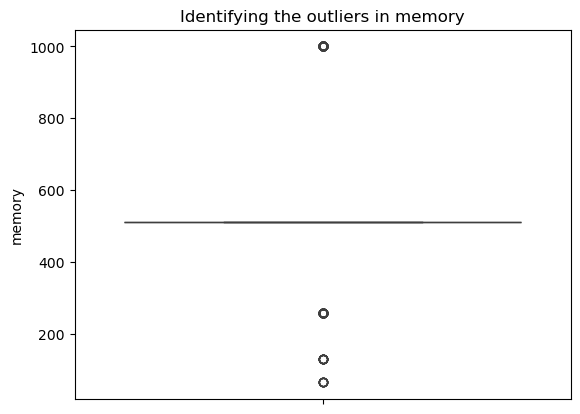

In [159]:
sns.boxplot(df['memory'])
plt.title('Identifying the outliers in memory')
plt.show()

In [160]:
df.groupby(['memory','ram'])[['price']].agg(['min','max']).unstack()

price                                                          \
            min                                 max                       
ram          4        8        16       32       4         8         16   
memory                                                                    
64      13990.0      NaN      NaN      NaN  25900.0       NaN       NaN   
128     12990.0  19982.0      NaN      NaN  22990.0   19990.0       NaN   
256     16990.0  15990.0  99990.0      NaN  32990.0  126890.0  162990.0   
512     31999.0  22990.0  32990.0      NaN  31999.0  162990.0  199990.0   
1000    21800.0  36990.0  41299.0  74990.0  31500.0  178590.0  186990.0   

                  
                  
ram           32  
memory            
64           NaN  
128          NaN  
256          NaN  
512          NaN  
1000    374990.0

### Observations : memory
- Outlier are present in memory column. Both upper & lower limits are 512GB
- For the price range of 20k we'll be getting 256GB MEMORY with 4GB or 8GB RAM
- 512GB MEMORY laptops are > 30k and < 2lakhs according to the RAM size
- Laptops with 1000GB MEMORY and different RAM capacities, prices are ranging from 22k to 3.8lakhs
- If we impute the outliers with upper limit and lower limit. Then, we may get wrong insights.
- MEMORY column is effecting the price of laptops

In [161]:
# ratings column

In [162]:
df['ratings']

0      3.6
1      3.7
2      3.7
3      3.8
4      4.2
      ... 
568    4.3
569    4.3
570    4.2
571    4.2
572    4.2
Name: ratings, Length: 573, dtype: float64

In [163]:
df['ratings'].describe()

count    573.000000
mean       4.245026
std        0.293276
min        3.300000
25%        4.100000
50%        4.300000
75%        4.400000
max        4.900000
Name: ratings, dtype: float64

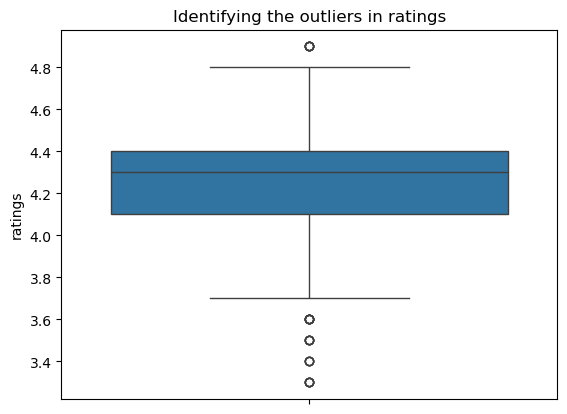

In [164]:
sns.boxplot(df['ratings'])
plt.title('Identifying the outliers in ratings')
plt.show()

In [165]:
ratings_q1 = df['ratings'].quantile(0.25)
ratings_q3 = df['ratings'].quantile(0.75)
ratings_iqr=ratings_q3 - ratings_q1
ratings_iqr

0.3000000000000007

In [166]:
ratings_ll = max(df['ratings'].min(),ratings_q1-1.5*ratings_iqr)
ratings_ul = min(df['ratings'].max(),ratings_q3+1.5*ratings_iqr)
ratings_ll,ratings_ul

(3.6499999999999986, 4.850000000000001)

In [167]:
df['ratings'].median()

4.3

In [168]:
df['ratings'] =  np.where(
    df['ratings'] > ratings_ul,
    ratings_ul,
    np. where (df['ratings'] < ratings_ll ,
        ratings_ll,
        df['ratings']))

In [169]:
ratings_q1 = df['ratings'].quantile(0.25)
ratings_q3 = df['ratings'].quantile(0.75)
ratings_iqr=ratings_q3 - ratings_q1
ratings_iqr

0.3000000000000007

In [170]:
ratings_ll = max(df['ratings'].min(),ratings_q1-1.5*ratings_iqr)
ratings_ul = min(df['ratings'].max(),ratings_q3+1.5*ratings_iqr)
ratings_ll,ratings_ul

(3.6499999999999986, 4.850000000000001)

In [171]:
df['ratings'].median()

4.3

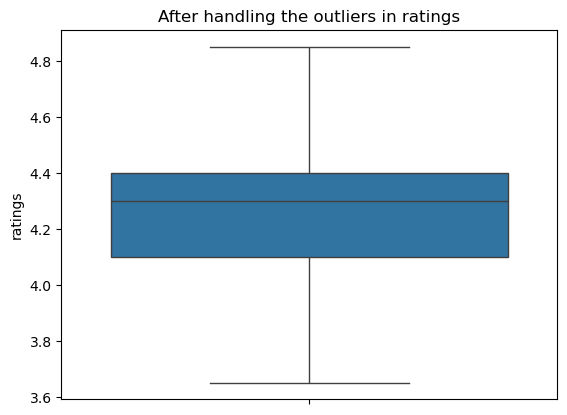

In [172]:
sns.boxplot(df['ratings'])
plt.title('After handling the outliers in ratings')
plt.show()

In [173]:
df['ratings'] = df['ratings'].round(1)

In [174]:
df['ratings']

0      3.6
1      3.7
2      3.7
3      3.8
4      4.2
      ... 
568    4.3
569    4.3
570    4.2
571    4.2
572    4.2
Name: ratings, Length: 573, dtype: float64

### Observations : ratings
- Filled the outliers with lower limit - 3.6 and upper limits - 4.8 of ratings column
- No outliers present after imputing the outliers with lower and upper limits
- There's no change in lower and upper limits after handling the outliers

In [175]:
df['reviews']

0        5
1       41
2       77
3      113
4      849
      ... 
568      0
569      0
570      0
571      5
572      5
Name: reviews, Length: 573, dtype: int64

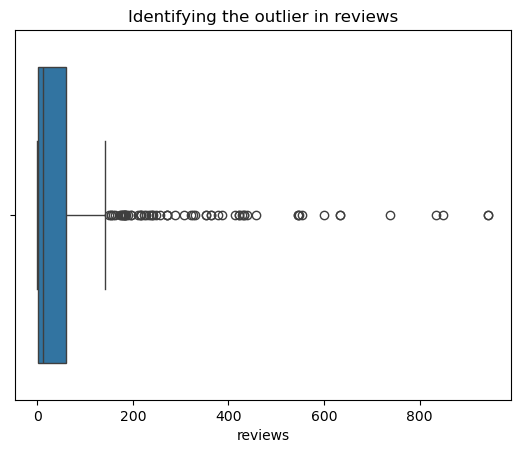

In [176]:
sns.boxplot(x=df['reviews'])
plt.title('Identifying the outlier in reviews')
plt.show()

In [177]:
reviews_q1 = df['reviews'].quantile(0.25)
reviews_q3 = df['reviews'].quantile(0.75)
reviews_iqr = reviews_q3 - reviews_q1
reviews_iqr

58.0

In [178]:
reviews_ll = max(df['reviews'].min(),reviews_q1-1.5*reviews_iqr)
reviews_ul = min(df['reviews'].max(),reviews_q3+1.5*reviews_iqr)
reviews_ll,reviews_ul

(0, 147.0)

In [179]:
df['reviews'].mean()

61.30890052356021

In [180]:
int(df['reviews'].mean())

61

In [181]:
int(df['reviews'].median())

12

In [182]:
df['reviews'] =  np.where(
    df['reviews'] > reviews_ul,
    reviews_ul,
    np. where (df['reviews'] <= reviews_ll ,
        reviews_ll,
        df['reviews']))

In [183]:
# mean value got affected by outliers
int(df['reviews'].mean())

38

In [184]:
# median is not affected by outliers
int(df['reviews'].median())

12

In [185]:
reviews_q1 = df['reviews'].quantile(0.25)
reviews_q3 = df['reviews'].quantile(0.75)
reviews_iqr = reviews_q3 - reviews_q1
reviews_iqr

58.0

In [186]:
# even after handling the outliers the lower and upper limmit are same

reviews_ll = max(df['reviews'].min(),reviews_q1-1.5*reviews_iqr)
reviews_ul = min(df['reviews'].max(),reviews_q3+1.5*reviews_iqr)
reviews_ll,reviews_ul

(0.0, 147.0)

In [187]:
df[df['reviews'] == 0]

brand                   model                             processor  \
9          AXL      Intel Celeron Dual           AXL Intel Celeron Dual Core   
10         AXL      Intel Celeron Dual  SponsoredAXL Intel Celeron Dual Core   
47      Lenovo          IdeaPad Slim 3         Intel Celeron Dual Core N4020   
60        ASUS  Vivobook Intel Celeron         Intel Celeron Dual Core N4020   
86        Acer             Aspire 3 15               Ryzen 5 Quad Core 7520U   
..         ...                     ...                                   ...   
566       ASUS          Zenbook Pro 14               Core i5 13th Gen 13500H   
567       DELL    Alienware Intel Core               Core i7 12th Gen 12700H   
568       Acer      Predator Helios 16              Core i9 14th Gen 14900HX   
569  MICROSOFT           Surface Pro 9                Core i7 12th Gen 1255U   
570      Apple        2023 MacBook Pro              MacBook Pro Apple M2 Max   

     ram  memory  ratings  reviews ram_version  display_inch  warranty   price  
9      4     256      3.6      0.0        DDR4            16         1   16990  
10     4     256      3.6      0.0        DDR4            16         1   16990  
47     8     256      3.6      0.0        DDR4            16         2   25899  
60     8     512      3.8      0.0        DDR4            16         1   27890  
86     8     512      4.2      0.0        DDR5            16         1   31690  
..   ...     ...      ...      ...         ...           ...       ...     ...  
566   16     512      4.4      0.0        DDR5            14         1  199990  
567   32    1000      4.4      0.0        DDR5            17         1  237890  
568   32    1000      4.3      0.0        DDR5            16         1  249999  
569   32    1000      4.3      0.0        DDR5            13         1  261990  
570   32    1000      4.2      0.0        DDR4            14         1  282990  

[71 rows x 11 columns]

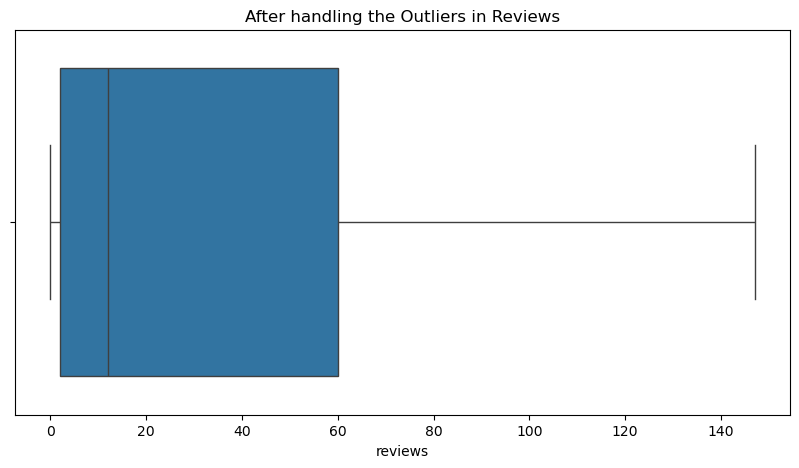

In [188]:
plt.figure(figsize=[10,5])
sns.boxplot(x=df['reviews'])
plt.title('After handling the Outliers in Reviews')
plt.show()

In [189]:
df['reviews'] = df['reviews'].astype(int)

In [190]:
df[df['reviews'] >= reviews_ul]

brand                  model                         processor  ram  \
4    Primebook       4G Android Based  4G Android Based MediaTek MT8788    4   
5    Primebook        S Wifi MediaTek  Primebook S Wifi MediaTek MT8183    4   
8        Avita    SATUS Intel Celeron     Intel Celeron Dual Core N4020    4   
13        ASUS  VivoBook 15 AMD Ryzen           Quad Core 12th Gen N100    4   
17     Infinix            Y1 Plus Neo          Quad Core 11th Gen N5100    4   
..         ...                    ...                               ...  ...   
406    SAMSUNG       Galaxy Book2 Pro            Core i5 12th Gen 1240P   16   
424      Apple       2020 Macbook Air         2020 Macbook Air Apple M1    8   
430      Apple       2020 Macbook Air         2020 Macbook Air Apple M1    8   
432       ASUS      Vivobook S14 OLED           Core i5 12th Gen 12500H   16   
497      Apple       2022 MacBook AIR         2022 MacBook AIR Apple M2    8   

     memory  ratings  reviews ram_version  display_inch  warranty  price  
4        64      4.2      147        DDR4            12         1  13990  
5       128      4.4      147        DDR4            12         1  13990  
8       128      3.6      147        DDR4            14         1  15990  
13      256      4.3      147        DDR4            16         1  18590  
17      128      3.7      147       DDR4X            16         1  18990  
..      ...      ...      ...         ...           ...       ...    ...  
406     512      4.6      147        DDR5            13         1  69990  
424     256      4.7      147        DDR4            13         1  73990  
430     256      4.7      147        DDR4            13         1  74990  
432     512      4.4      147        DDR4            14         1  74990  
497     256      4.8      147        DDR4            14         1  96990  

[64 rows x 11 columns]

### Observations : reviews
- Reveiws are filled with lower limit - 0 and upper limit - 147
- After handling the outliers, lower limit and upper limit are same


In [191]:
df['ram_version'].value_counts()

ram_version
DDR4     378
DDR5     127
DDR4X     55
DDR5X      9
DDR3       4
Name: count, dtype: int64

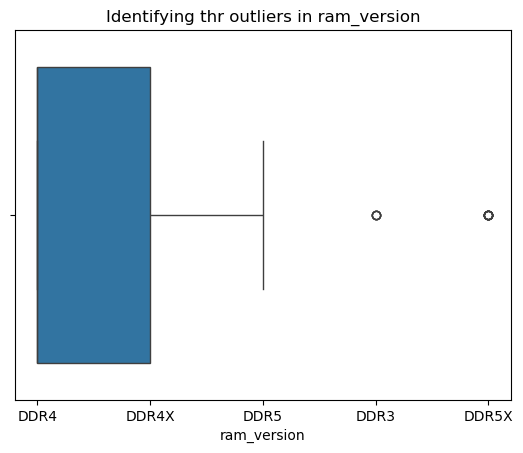

In [192]:
sns.boxplot(x=df['ram_version'])
plt.title('Identifying thr outliers in ram_version')
plt.show()

In [193]:
df[df['ram_version'] == 'DDR3']

brand                     model                processor  ram  memory  \
283   ASUS     ZenBook 13 Intel Core    Core i5 8th Gen 8250U    8     256   
402   ASUS  ExpertBook B9 Intel Core  Core i5 10th Gen 10210U    8     512   
552  Apple         MacBook Pro Intel    Intel Core i5 8th Gen    8     512   
561     HP       Spectre Folio Intel  Core i7 10th Gen 10510Y   16     512   

     ratings  reviews ram_version  display_inch  warranty   price  
283      4.6       92        DDR3            13         1   51840  
402      4.6        6        DDR3            14         1   69911  
552      4.2       13        DDR3            13         1  162990  
561      4.6        0        DDR3            13         1  188990

In [194]:
df[df['ram_version'] == 'DDR5X']

brand                    model                processor  ram  memory  \
354  Infinix  ZEROBOOK 13 Intel Intel  Core i7 13th Gen 13700H   16     512   
433  Infinix  ZEROBOOK 13 Intel Intel  Core i9 13th Gen 13900H   32    1000   
436   Lenovo           IdeaPad Slim 5  Intel Core Ultra 5 125H   16    1000   
488   Lenovo              Yoga Slim 6  Core i7 13th Gen 13700H   16     512   
513   Lenovo              Yoga Slim 7  Intel Core Ultra 7 155H   32    1000   
540  SAMSUNG         Galaxy Book4 Pro  Intel Core Ultra 5 125H   16     512   
544  SAMSUNG         Galaxy Book4 Pro  Intel Core Ultra 7 155H   16     512   
554       HP       Spectre x360 Intel  Intel Core Ultra 7 155H   32    1000   
564       HP       Spectre x360 Intel  Intel Core Ultra 7 155H   32    1000   

     ratings  reviews ram_version  display_inch  warranty   price  
354      4.2       29       DDR5X            16         1   59990  
433      4.2      103       DDR5X            16         1   74990  
436      4.5       15       DDR5X            16         1   75990  
488      4.8        1       DDR5X            14         1   92690  
513      4.5        4       DDR5X            14         1  107990  
540      4.7        0       DDR5X            16         2  141990  
544      4.7        1       DDR5X            16         2  149990  
554      4.6        1       DDR5X            14         1  168990  
564      4.5        0       DDR5X            16         1  195990

### Observations : ram_version
- DDR3 ram versions are old model laptops. So, they are with DDR3 version
- DDR5X is the latest ram_version used in laptops for faster performance
- we can see DDR5X laptops are high cost, only 2-3 laptops < 75k
- Even the processors are with high performance chips
- So, didn't handle the outliers

In [195]:
df['display_inch']

0      12
1      14
2      14
3      14
4      12
       ..
568    16
569    13
570    14
571    16
572    16
Name: display_inch, Length: 573, dtype: int64

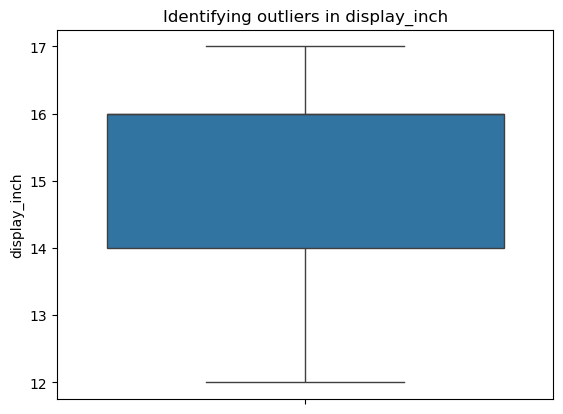

In [196]:
sns.boxplot(df['display_inch'])
plt.title('Identifying outliers in display_inch')
plt.show()

### Observations : display_inch
- No otliers present in display_inch


In [197]:
df['warranty']

0      1
1      1
2      1
3      1
4      1
      ..
568    1
569    1
570    1
571    1
572    2
Name: warranty, Length: 573, dtype: int64

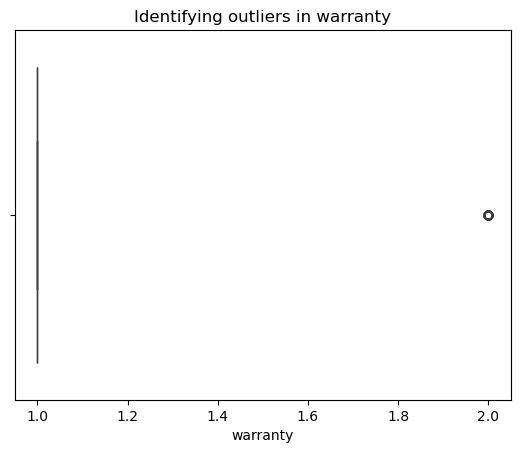

In [198]:
sns.boxplot(x=df['warranty'])
plt.title('Identifying outliers in warranty')
plt.show()

In [199]:
df[df['warranty'] == 2].sample(10)
                              

brand              model                      processor  ram  memory  \
246        HP  Laptop Intel Core         Core i3 13th Gen 1315U    8     512   
390    Lenovo   IdeaPad Gaming 3        Core i5 12th Gen 12450H   16     512   
147    Lenovo     IdeaPad Slim 3         Core i3 12th Gen 1215U    8     512   
295       MSI    GF63 Intel Core        Core i5 11th Gen 11260H    8     512   
286    Lenovo     IdeaPad Slim 3         Core i5 12th Gen 1235U   16     512   
145    Lenovo     IdeaPad Slim 3        Core i3 11th Gen 1115G4    8     512   
128        HP        AMD Ryzen 3        Ryzen 3 Quad Core 7320U    8     512   
47     Lenovo     IdeaPad Slim 3  Intel Celeron Dual Core N4020    8     256   
382  Colorful          Evol P-15        Core i5 12th Gen 12450H   16     512   
524   SAMSUNG   Galaxy Book4 360          Evo Intel Core 7 150U   16     512   

     ratings  reviews ram_version  display_inch  warranty   price  
246      4.2       21        DDR4            14         2   47990  
390      4.3       58        DDR4            16         2   67990  
147      4.2       78        DDR4            16         2   35250  
295      4.2      121        DDR4            16         2   52990  
286      4.2      129        DDR4            16         2   51990  
145      4.2      147        DDR4            16         2   35100  
128      4.2        7        DDR5            14         2   33990  
47       3.6        0        DDR4            16         2   25899  
382      4.3      122        DDR5            16         2   65640  
524      4.5        2        DDR5            16         2  122990

### Observations : warranty
- 2 years warranty is the outlier
- But, the price difference is seen in laptops
- laptop brands are compromising by installing low end processor or ram or memory to provide another features like warranty
- where as some laptop brands are including the warranty 2 year and increasing the prices of laptops, there's no compromise in any segment
  


## Creating required columns

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         573 non-null    object 
 1   model         573 non-null    object 
 2   processor     573 non-null    object 
 3   ram           573 non-null    int64  
 4   memory        573 non-null    int64  
 5   ratings       573 non-null    float64
 6   reviews       573 non-null    int64  
 7   ram_version   573 non-null    object 
 8   display_inch  573 non-null    int64  
 9   warranty      573 non-null    int64  
 10  price         573 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 49.4+ KB


In [201]:
df['processor'].sample(10)

173    Core i3 11th Gen 1115G4
68     Core i3 10th Gen 1005G1
454    Ryzen 5 Hexa Core 7530U
208      Core i3 13th Gen N305
364     Core i5 12th Gen 1235U
108     Core i3 12th Gen 1215U
115    Ryzen 3 Hexa Core 5300U
218    Core i5 11th Gen 1155G7
492    Core i5 12th Gen 12500H
460    Core i5 12th Gen 12450H
Name: processor, dtype: object

### processor subset columns
creating columns - processor_type, processor_generation, processor_series
-

In [202]:
df['processor_type'] = df['processor'].str.extract('(\w+?\s?[\si]\d)\s')

In [203]:
# handling the missing values as 'others' 
# intel processors have many varieties in them
# some other brands are use different processors. So, filled the nan values as 'others'

df['processor_type'].fillna('others',inplace=True)

In [204]:
df['processor_type'].value_counts()

processor_type
Core i5    169
Core i3    103
Core i7     84
others      72
Ryzen 5     68
Ryzen 7     28
Ryzen 3     26
Ultra 7      9
Core i9      8
Ultra 5      2
Core 7       2
Core 5       1
Ultra 9      1
Name: count, dtype: int64

In [205]:
df['processor_generation'] = df['processor'].str.extract('\s(\d.?.?[\sth])')

In [206]:
# representing the missing values as 'No' - because there's no proper processor generation available to some laptops

df['processor_generation'].fillna('No',inplace=True)


In [207]:
df['processor_generation'].value_counts()

processor_generation
12th    147
11th    105
13th     90
5        71
No       52
7        39
3        26
10th     24
14th      6
9th       4
4th       4
8th       3
6th       1
9         1
Name: count, dtype: int64

In [208]:
df['processor_series'] = df['processor'].str.extract('\s(\w+?$)')

In [209]:
df['processor_series']

0        N4020
1        N4020
2         Core
3        N4500
4       MT8788
        ...   
568    14900HX
569      1255U
570        Max
571        Max
572    14900HX
Name: processor_series, Length: 573, dtype: object

In [210]:
df.head()

brand                     model                         processor  ram  \
0      CHUWI        Intel Celeron Dual          Dual Core 10th Gen N4020    4   
1    Ultimus        Intel Celeron Dual     Intel Celeron Dual Core N4020    4   
2    Ultimus        Intel Celeron Dual   Ultimus Intel Celeron Dual Core    4   
3       ASUS  Chromebook Intel Celeron     Intel Celeron Dual Core N4500    4   
4  Primebook          4G Android Based  4G Android Based MediaTek MT8788    4   

   memory  ratings  reviews ram_version  display_inch  warranty  price  \
0     128      3.6        5        DDR4            12         1  12990   
1     128      3.7       41        DDR4            14         1  12990   
2     128      3.7       77        DDR4            14         1  12990   
3      64      3.8      113       DDR4X            14         1  13990   
4      64      4.2      147        DDR4            12         1  13990   

  processor_type processor_generation processor_series  
0         others                 10th            N4020  
1         others                   No            N4020  
2         others                   No             Core  
3         others                   No            N4500  
4         others                   No           MT8788

In [211]:
df.loc[df['processor_series'].str.contains('C')]

brand               model                             processor  ram  \
2    Ultimus  Intel Celeron Dual       Ultimus Intel Celeron Dual Core    4   
7    Ultimus   Pro Intel Celeron           Pro Intel Celeron Dual Core    8   
9        AXL  Intel Celeron Dual           AXL Intel Celeron Dual Core    4   
10       AXL  Intel Celeron Dual  SponsoredAXL Intel Celeron Dual Core    4   
35        HP      255 G9 841W6pa                 AMD Ryzen 3 Dual Core    8   
57        HP       245G9 841W7PA                 AMD Ryzen 3 Dual Core    8   
61    Lenovo         AMD Ryzen 3                 AMD Ryzen 3 Octa Core    8   
85      Acer         AMD Ryzen 5                 AMD Ryzen 5 Quad Core    8   
90        HP         AMD Ryzen 5                 AMD Ryzen 5 Quad Core    8   
195       HP         AMD Ryzen 5                 AMD Ryzen 5 Quad Core    8   
200     ASUS         AMD Ryzen 5                 AMD Ryzen 5 Hexa Core    8   
223     ASUS         AMD Ryzen 5                 AMD Ryzen 5 Quad Core   16   
226       HP       14s AMD Ryzen                 AMD Ryzen 3 Quad Core    8   
259       HP         AMD Ryzen 5                 AMD Ryzen 5 Hexa Core    8   
532       HP      OMEN ARM Ryzen                 ARM Ryzen 7 Octa Core   16   

     memory  ratings  reviews ram_version  display_inch  warranty   price  \
2       128      3.7       77        DDR4            14         1   12990   
7       256      3.8        1        DDR4            14         1   15990   
9       256      3.6        0        DDR4            16         1   16990   
10      256      3.6        0        DDR4            16         1   16990   
35      512      3.7       15        DDR4            16         1   23990   
57      512      4.1       11        DDR4            14         1   26600   
61      512      4.5        2        DDR4            14         1   27990   
85      512      4.0        4        DDR5            16         1   31690   
90      512      4.2        0        DDR4            14         1   31990   
195     512      4.2       33        DDR4            16         1   39990   
200     512      4.6        2        DDR4            16         1   39999   
223     512      4.0        7        DDR4            14         1   43990   
226     512      4.6      147        DDR4            14         1   43999   
259     512      3.6        1        DDR4            16         1   49490   
532     512      4.7        0        DDR5            16         1  129490   

    processor_type processor_generation processor_series  
2           others                   No             Core  
7           others                   No             Core  
9           others                   No             Core  
10          others                   No             Core  
35         Ryzen 3                   3              Core  
57         Ryzen 3                   3              Core  
61         Ryzen 3                   3              Core  
85         Ryzen 5                   5              Core  
90         Ryzen 5                   5              Core  
195        Ryzen 5                   5              Core  
200        Ryzen 5                   5              Core  
223        Ryzen 5                   5              Core  
226        Ryzen 3                   3              Core  
259        Ryzen 5                   5              Core  
532        Ryzen 7                   7              Core

In [212]:
df['processor_series'].str.extract('([A-Z]+)').value_counts()

U      196
H      127
G      120
N       43
HS      21
P       17
C       15
M       12
HX      10
MT       2
E        1
RAM      1
Y        1
Name: count, dtype: int64

In [213]:
#df['processor_series'] = 
df['processor_series'].str.strip(' ')

0        N4020
1        N4020
2         Core
3        N4500
4       MT8788
        ...   
568    14900HX
569      1255U
570        Max
571        Max
572    14900HX
Name: processor_series, Length: 573, dtype: object

### column - processor category
power efficient - U             
high performance - H, HX          
integrated graphics - G         
entry level computing - C, N       
thin gaming\creator - HS   
optimized performance - P     
all rounder - M1, M2, M3, MAX             
extremely power efficient - Y


In [214]:
df['processor_suffix'] = df['processor_series'].str.extract('([A-Z]+)')

In [215]:
df['processor_suffix']

0       N
1       N
2       C
3       N
4      MT
       ..
568    HX
569     U
570     M
571     M
572    HX
Name: processor_suffix, Length: 573, dtype: object

references for imputing the processor categrories
-
intel :
https://www.intel.com/content/www/us/en/processors/processor-numbers.html

https://www.intel.com/content/www/us/en/support/articles/000058567/processors/intel-core-processors.html

amd :
https://www.msi.com/blog/understand-how-amd-name-their-mobile-cpu

In [216]:
dic ={'U':'power efficient', 'H': 'high performance', 'G':'integrated graphics', 'N':'entry level computing',
    'HS':'thin gaming\creator', 'P':'optimized performance', 'C':'high performance', 'M':'all rounder',
      'HX':'high performance', 'MT':'entry level computing', 'Y' :'extremely power efficient',
      'E' : 'high performance', 'RAM' : 'entry level computing'}

for i in range(len(df)):
    if df.loc[i,'processor_suffix'] in dic.keys():
        df.loc[i,'processor_suffix'] = dic[df.loc[i,'processor_suffix']]

In [217]:
df['processor_suffix']

0      entry level computing
1      entry level computing
2           high performance
3      entry level computing
4      entry level computing
               ...          
568         high performance
569          power efficient
570              all rounder
571              all rounder
572         high performance
Name: processor_suffix, Length: 573, dtype: object

In [218]:
df[df['processor_suffix'].isna()]

brand                      model                     processor  ram  \
55     HP           255 G9 AMD Ryzen           3 Dual Core R3 3250    8   
70   ASUS  Vivobook 15 Intel Pentium  Intel Pentium Dual Core 7505    8   
243    HP              G8 Intel Core        Core i5 11th Gen 11500   16   
248    HP                AMD Ryzen 5           5 Quad Core R5 5500    8   
250  DELL        Inspiron Intel Core           i5 12th Gen Core i5    8   
254  DELL           Inspiron 15 3520           i5 12th Gen Core i5    8   
290  DELL           Inspiron 15 3520           i5 12th Gen Core i5   16   

     memory  ratings  reviews ram_version  display_inch  warranty  price  \
55      512      4.1       24        DDR4            16         1  25999   
70      512      3.9       37        DDR4            16         1  28990   
243     512      4.4        0        DDR4            16         1  46990   
248     512      3.8        5        DDR4            14         1  47990   
250     512      4.4        2        DDR4            16         2  48490   
254     512      3.6        3        DDR4            16         2  48889   
290     512      4.2       15        DDR4            16         1  52200   

    processor_type processor_generation processor_series processor_suffix  
55          others                   No             3250              NaN  
70          others                   No             7505              NaN  
243        Core i5                 11th            11500              NaN  
248         others                   No             5500              NaN  
250         others                 12th               i5              NaN  
254         others                 12th               i5              NaN  
290         others                 12th               i5              NaN

In [219]:
df['processor_suffix'].mode()

0    power efficient
Name: processor_suffix, dtype: object

In [220]:
df['processor_suffix'].fillna(df['processor_suffix'].mode()[0],inplace=True)

In [221]:
df['processor_suffix'].isna().sum()

0

In [222]:
# renaming the old column name to new column name 
# 'processor_suffix' : 'processor_category'

df.rename(columns={'processor_suffix':'processor_category'},inplace=True)

In [223]:
df['processor_category'].value_counts()

processor_category
power efficient              203
high performance             153
integrated graphics          120
entry level computing         46
thin gaming\creator           21
optimized performance         17
all rounder                   12
extremely power efficient      1
Name: count, dtype: int64

In [224]:
df

brand                     model                         processor  \
0        CHUWI        Intel Celeron Dual          Dual Core 10th Gen N4020   
1      Ultimus        Intel Celeron Dual     Intel Celeron Dual Core N4020   
2      Ultimus        Intel Celeron Dual   Ultimus Intel Celeron Dual Core   
3         ASUS  Chromebook Intel Celeron     Intel Celeron Dual Core N4500   
4    Primebook          4G Android Based  4G Android Based MediaTek MT8788   
..         ...                       ...                               ...   
568       Acer        Predator Helios 16          Core i9 14th Gen 14900HX   
569  MICROSOFT             Surface Pro 9            Core i7 12th Gen 1255U   
570      Apple          2023 MacBook Pro          MacBook Pro Apple M2 Max   
571      Apple          2021 Macbook Pro          Macbook Pro Apple M1 Max   
572     Lenovo         Legion Intel Core          Core i9 14th Gen 14900HX   

     ram  memory  ratings  reviews ram_version  display_inch  warranty  \
0      4     128      3.6        5        DDR4            12         1   
1      4     128      3.7       41        DDR4            14         1   
2      4     128      3.7       77        DDR4            14         1   
3      4      64      3.8      113       DDR4X            14         1   
4      4      64      4.2      147        DDR4            12         1   
..   ...     ...      ...      ...         ...           ...       ...   
568   32    1000      4.3        0        DDR5            16         1   
569   32    1000      4.3        0        DDR5            13         1   
570   32    1000      4.2        0        DDR4            14         1   
571   32    1000      4.2        5        DDR4            16         1   
572   32    1000      4.2        5        DDR5            16         2   

      price processor_type processor_generation processor_series  \
0     12990         others                 10th            N4020   
1     12990         others                   No            N4020   
2     12990         others                   No             Core   
3     13990         others                   No            N4500   
4     13990         others                   No           MT8788   
..      ...            ...                  ...              ...   
568  249999        Core i9                 14th          14900HX   
569  261990        Core i7                 12th            1255U   
570  282990         others                   No              Max   
571  299990         others                   No              Max   
572  374990        Core i9                 14th          14900HX   

        processor_category  
0    entry level computing  
1    entry level computing  
2         high performance  
3    entry level computing  
4    entry level computing  
..                     ...  
568       high performance  
569        power efficient  
570            all rounder  
571            all rounder  
572       high performance  

[573 rows x 15 columns]

In [225]:
df['ratings'].value_counts()

ratings
4.3    110
4.4     97
4.2     96
4.1     46
4.5     45
3.8     31
4.6     31
3.6     21
4.0     21
3.9     20
3.7     18
4.7     17
4.8     14
4.9      6
Name: count, dtype: int64

In [226]:
df[df['ratings'] == 3.6]

brand                     model                             processor  \
0     CHUWI        Intel Celeron Dual              Dual Core 10th Gen N4020   
6    Lenovo     Ideapad Intel Celeron         Intel Celeron Dual Core N4020   
8     Avita       SATUS Intel Celeron         Intel Celeron Dual Core N4020   
9       AXL        Intel Celeron Dual           AXL Intel Celeron Dual Core   
10      AXL        Intel Celeron Dual  SponsoredAXL Intel Celeron Dual Core   
19     Acer      One 11 Intel Celeron         Intel Celeron Dual Core N4500   
26       HP         360 Intel Celeron         Intel Celeron Quad Core N4120   
27     Acer      One 11 Intel Celeron         Intel Celeron Dual Core N4500   
46   Lenovo            IdeaPad Slim 3         Intel Celeron Dual Core N4020   
47   Lenovo            IdeaPad Slim 3         Intel Celeron Dual Core N4020   
120    DELL             Intel Core i3               Core i3 11th Gen 1115G4   
122  Lenovo             Intel Core i3                Intel Core i3 12th Gen   
240    DELL             Intel Core i5               Core i5 11th Gen 1135G7   
254    DELL          Inspiron 15 3520                   i5 12th Gen Core i5   
255  Lenovo          ThinkPad E14 AMD               Ryzen 5 Hexa Core 7530U   
259      HP               AMD Ryzen 5                 AMD Ryzen 5 Hexa Core   
261    Acer  TravelMate P2 Intel Core               Core i7 11th Gen 1165G7   
348    DELL       Inspiron Intel Core                Core i5 13th Gen 1335U   
415    DELL       Inspiron 5430 Intel                Intel Core i5 13th Gen   
477    ASUS         Vivobook 14X OLED               Core i5 13th Gen 13500H   
478      HP             Intel Core i7                Core i7 12th Gen 1255U   

     ram  memory  ratings  reviews ram_version  display_inch  warranty  price  \
0      4     128      3.6        5        DDR4            12         1  12990   
6      4      64      3.6        2        DDR4            12         1  15980   
8      4     128      3.6      147        DDR4            14         1  15990   
9      4     256      3.6        0        DDR4            16         1  16990   
10     4     256      3.6        0        DDR4            16         1  16990   
19     8     128      3.6       22        DDR4            12         1  19982   
26     4      64      3.6       86        DDR4            14         1  20990   
27     8     256      3.6       22        DDR4            12         1  21290   
46     8     256      3.6       17        DDR4            16         2  25890   
47     8     256      3.6        0        DDR4            16         2  25899   
120    8     512      3.6        3        DDR4            16         1  33499   
122    8     512      3.6        0        DDR4            16         1  33590   
240    8     512      3.6        0        DDR4            16         1  46700   
254    8     512      3.6        3        DDR4            16         2  48889   
255    8     512      3.6        0        DDR4            14         1  48990   
259    8     512      3.6        1        DDR4            16         1  49490   
261   16     512      3.6       33        DDR4            14         1  49990   
348    8     512      3.6        2        DDR5            14         2  59450   
415   16    1000      3.6        6        DDR5            14         1  72400   
477   16     512      3.6        0        DDR4            14         1  88941   
478   16     512      3.6        0        DDR4            16         1  88990   

    processor_type processor_generation processor_series  \
0           others                 10th            N4020   
6           others                   No            N4020   
8           others                   No            N4020   
9           others                   No             Core   
10          others                   No             Core   
19          others                   No            N4500   
26          others                   No            N4120   
27  

### column - ratings category
ratings between 3.5 - 4.0 = average , 4.1 - 4.5 = good, 4.6 -5.0 = excellent
-

In [227]:
# creating categories according to the ratings 
# ratings between 3.5 - 4.0 = average , 4.1 - 4.5 = good, 4.6 -5.0 = excellent

bin_values = [3.5, 4.0, 4.5, 5.0]
bin_labels = ['average', 'good', 'excellent']

df['ratings_category'] = pd.cut(x=df['ratings'] , bins=bin_values, labels=bin_labels)

In [228]:
df['ratings_category'].value_counts()

ratings_category
good         394
average      111
excellent     68
Name: count, dtype: int64

In [229]:
df['reviews']

0        5
1       41
2       77
3      113
4      147
      ... 
568      0
569      0
570      0
571      5
572      5
Name: reviews, Length: 573, dtype: int64

In [230]:
df['reviews'].describe()

count    573.000000
mean      38.755672
std       50.378320
min        0.000000
25%        2.000000
50%       12.000000
75%       60.000000
max      147.000000
Name: reviews, dtype: float64

### column - price range
laptop price < 40k = low, 40k - 60k = medium, 60k - 100k = high, 100k - 400k = very high
-

In [231]:
df.loc[0:500,'price'].describe()

count      501.000000
mean     50071.580838
std      20227.284637
min      12990.000000
25%      33990.000000
50%      48490.000000
75%      63990.000000
max      99203.000000
Name: price, dtype: float64

In [232]:
df[df.loc[:,'price'] < 40000]

brand                     model                         processor  \
0        CHUWI        Intel Celeron Dual          Dual Core 10th Gen N4020   
1      Ultimus        Intel Celeron Dual     Intel Celeron Dual Core N4020   
2      Ultimus        Intel Celeron Dual   Ultimus Intel Celeron Dual Core   
3         ASUS  Chromebook Intel Celeron     Intel Celeron Dual Core N4500   
4    Primebook          4G Android Based  4G Android Based MediaTek MT8788   
..         ...                       ...                               ...   
196       ASUS        Vivobook AMD Ryzen           Ryzen 5 Quad Core 7520U   
197     Lenovo            IdeaPad Slim 1           Ryzen 5 Quad Core 7520U   
198       DELL      Vostro 3420 Business            Intel Core i5 11th Gen   
199     Lenovo             Intel Core i3            Core i3 13th Gen 1315U   
200       ASUS               AMD Ryzen 5             AMD Ryzen 5 Hexa Core   

     ram  memory  ratings  reviews ram_version  display_inch  warranty  price  \
0      4     128      3.6        5        DDR4            12         1  12990   
1      4     128      3.7       41        DDR4            14         1  12990   
2      4     128      3.7       77        DDR4            14         1  12990   
3      4      64      3.8      113       DDR4X            14         1  13990   
4      4      64      4.2      147        DDR4            12         1  13990   
..   ...     ...      ...      ...         ...           ...       ...    ...   
196    8     512      4.2       18        DDR5            14         1  39990   
197    8     512      4.2        4        DDR5            16         2  39990   
198    8     512      3.7        3        DDR4            14         1  39990   
199    8     512      4.2        2        DDR5            16         1  39990   
200    8     512      4.6        2        DDR4            16         1  39999   

    processor_type processor_generation processor_series  \
0           others                 10th            N4020   
1           others                   No            N4020   
2           others                   No             Core   
3           others                   No            N4500   
4           others                   No           MT8788   
..             ...                  ...              ...   
196        Ryzen 5                   5             7520U   
197        Ryzen 5                   5             7520U   
198        Core i5                 11th              Gen   
199        Core i3                 13th            1315U   
200        Ryzen 5                   5              Core   

        processor_category ratings_category  
0    entry level computing          average  
1    entry level computing          average  
2         high performance          average  
3    entry level computing          average  
4    entry level computing             good  
..                     ...              ...  
196        power efficient             good  
197        power efficient             good  
198    integrated graphics          average  
199        power efficient             good  
200       high performance        excellent  

[201 rows x 16 columns]

In [233]:
# creating price ranges by considering the prices of laptops
# laptops < 40k = low, 40k - 60k = medium, 60k - 100k = high, 100k - 400k = very high


bin_values=[0,40000, 60000,100000,400000]
bin_labels = ['low', 'medium', 'high', 'very high']
df['price_range'] = pd.cut(df['price'],bins=bin_values,labels=bin_labels)

In [234]:
df['price_range'].value_counts()

price_range
low          201
medium       159
high         146
very high     67
Name: count, dtype: int64

In [235]:
df['brand'] = df['brand'].str.upper()

In [236]:
df

brand                     model                         processor  \
0        CHUWI        Intel Celeron Dual          Dual Core 10th Gen N4020   
1      ULTIMUS        Intel Celeron Dual     Intel Celeron Dual Core N4020   
2      ULTIMUS        Intel Celeron Dual   Ultimus Intel Celeron Dual Core   
3         ASUS  Chromebook Intel Celeron     Intel Celeron Dual Core N4500   
4    PRIMEBOOK          4G Android Based  4G Android Based MediaTek MT8788   
..         ...                       ...                               ...   
568       ACER        Predator Helios 16          Core i9 14th Gen 14900HX   
569  MICROSOFT             Surface Pro 9            Core i7 12th Gen 1255U   
570      APPLE          2023 MacBook Pro          MacBook Pro Apple M2 Max   
571      APPLE          2021 Macbook Pro          Macbook Pro Apple M1 Max   
572     LENOVO         Legion Intel Core          Core i9 14th Gen 14900HX   

     ram  memory  ratings  reviews ram_version  display_inch  warranty  \
0      4     128      3.6        5        DDR4            12         1   
1      4     128      3.7       41        DDR4            14         1   
2      4     128      3.7       77        DDR4            14         1   
3      4      64      3.8      113       DDR4X            14         1   
4      4      64      4.2      147        DDR4            12         1   
..   ...     ...      ...      ...         ...           ...       ...   
568   32    1000      4.3        0        DDR5            16         1   
569   32    1000      4.3        0        DDR5            13         1   
570   32    1000      4.2        0        DDR4            14         1   
571   32    1000      4.2        5        DDR4            16         1   
572   32    1000      4.2        5        DDR5            16         2   

      price processor_type processor_generation processor_series  \
0     12990         others                 10th            N4020   
1     12990         others                   No            N4020   
2     12990         others                   No             Core   
3     13990         others                   No            N4500   
4     13990         others                   No           MT8788   
..      ...            ...                  ...              ...   
568  249999        Core i9                 14th          14900HX   
569  261990        Core i7                 12th            1255U   
570  282990         others                   No              Max   
571  299990         others                   No              Max   
572  374990        Core i9                 14th          14900HX   

        processor_category ratings_category price_range  
0    entry level computing          average         low  
1    entry level computing          average         low  
2         high performance          average         low  
3    entry level computing          average         low  
4    entry level computing             good         low  
..                     ...              ...         ...  
568       high performance             good   very high  
569        power efficient             good   very high  
570            all rounder             good   very high  
571            all rounder             good   very high  
572       high performance             good   very high  

[573 rows x 17 columns]

# EDA
- univariate analysis
- bi-variate analysis
- multi-variate analysis

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   brand                 573 non-null    object  
 1   model                 573 non-null    object  
 2   processor             573 non-null    object  
 3   ram                   573 non-null    int64   
 4   memory                573 non-null    int64   
 5   ratings               573 non-null    float64 
 6   reviews               573 non-null    int64   
 7   ram_version           573 non-null    object  
 8   display_inch          573 non-null    int64   
 9   warranty              573 non-null    int64   
 10  price                 573 non-null    int64   
 11  processor_type        573 non-null    object  
 12  processor_generation  573 non-null    object  
 13  processor_series      573 non-null    object  
 14  processor_category    573 non-null    object  
 15  rating

In [238]:
df.describe()

ram       memory     ratings     reviews  display_inch  \
count  573.000000   573.000000  573.000000  573.000000    573.000000   
mean    11.860384   554.457243    4.249913   38.755672     15.305410   
std      5.448556   219.656678    0.280211   50.378320      1.093171   
min      4.000000    64.000000    3.600000    0.000000     12.000000   
25%      8.000000   512.000000    4.100000    2.000000     14.000000   
50%      8.000000   512.000000    4.300000   12.000000     16.000000   
75%     16.000000   512.000000    4.400000   60.000000     16.000000   
max     32.000000  1000.000000    4.900000  147.000000     17.000000   

         warranty          price  
count  573.000000     573.000000  
mean     1.132635   62676.759162  
std      0.339476   42316.723562  
min      1.000000   12990.000000  
25%      1.000000   35055.000000  
50%      1.000000   51990.000000  
75%      1.000000   74890.000000  
max      2.000000  374990.000000

In [239]:
df.nunique()

brand                    20
model                   249
processor               152
ram                       4
memory                    5
ratings                  14
reviews                 105
ram_version               5
display_inch              6
warranty                  2
price                   328
processor_type           13
processor_generation     14
processor_series        106
processor_category        8
ratings_category          3
price_range               4
dtype: int64

## univariate analysis

In [240]:
df['brand'].value_counts() / len(df) * 100

brand
HP           23.385689
ASUS         20.593368
LENOVO       15.881326
DELL          9.075044
ACER          7.504363
MSI           6.282723
INFINIX       5.759162
SAMSUNG       2.617801
APPLE         2.268761
CHUWI         1.047120
ZEBRONICS     1.047120
ULTIMUS       0.872600
COLORFUL      0.698080
WINGS         0.698080
MICROSOFT     0.698080
AXL           0.523560
AVITA         0.349040
PRIMEBOOK     0.349040
LG            0.174520
GIGABYTE      0.174520
Name: count, dtype: float64

In [241]:
df['brand'].value_counts()

brand
HP           134
ASUS         118
LENOVO        91
DELL          52
ACER          43
MSI           36
INFINIX       33
SAMSUNG       15
APPLE         13
CHUWI          6
ZEBRONICS      6
ULTIMUS        5
COLORFUL       4
WINGS          4
MICROSOFT      4
AXL            3
AVITA          2
PRIMEBOOK      2
LG             1
GIGABYTE       1
Name: count, dtype: int64

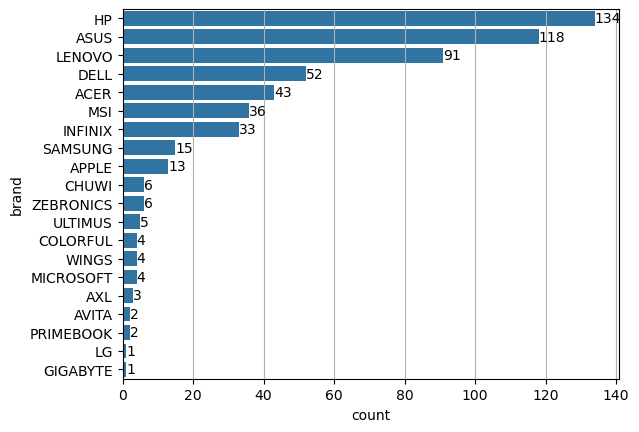

In [242]:
brand = sns.countplot(df['brand'], order=df['brand'].value_counts().index, )
plt.grid(axis='x')
plt.bar_label(brand.containers[0])
plt.show()

**insights :**

1. There are less laptops in brands - HP, ASUS, LENOVO which are > 80 laptops
2. There are 2 brands between 40-60 - DELL, ACER
3. There are 2 brands between 20-40 - MSI, INFINIX 
4. THere are many laptops which have < 20 products in their brands
5. Laptop brands below 10 product are 11 companies

In [243]:
df['processor_type'].value_counts()

processor_type
Core i5    169
Core i3    103
Core i7     84
others      72
Ryzen 5     68
Ryzen 7     28
Ryzen 3     26
Ultra 7      9
Core i9      8
Ultra 5      2
Core 7       2
Core 5       1
Ultra 9      1
Name: count, dtype: int64

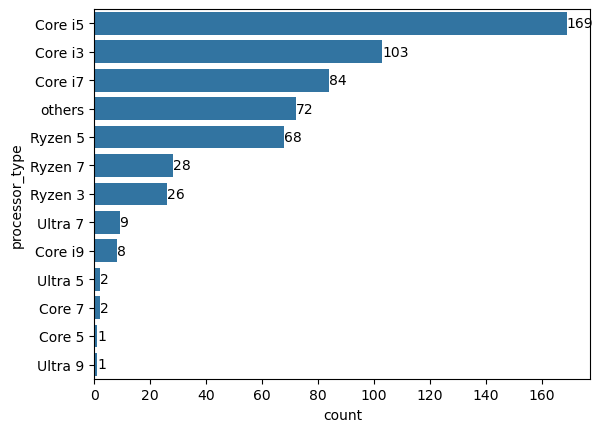

In [244]:
ptype = sns.countplot(df['processor_type'], order=df['processor_type'].value_counts().index,)

plt.bar_label(ptype.containers[0])
plt.show()

**insights :**
1. core i5 processors are more in the market
2. core i3 and i7 are between 80 - 110
3. Ryzen laptops are less the in market when compared to intel based processors
4. In others category, processors related to intel, mac and more others are included
5. Core and ultra series based laptops are less in the market

In [245]:
df['processor_generation'].value_counts()

processor_generation
12th    147
11th    105
13th     90
5        71
No       52
7        39
3        26
10th     24
14th      6
9th       4
4th       4
8th       3
6th       1
9         1
Name: count, dtype: int64

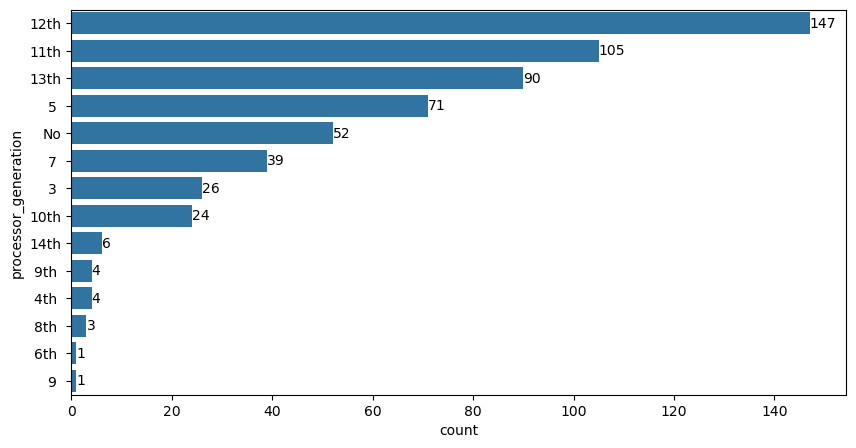

In [246]:
plt.figure(figsize=[10,5])
pgen =sns.countplot(df['processor_generation'], order=df['processor_generation'].value_counts().index)

plt.bar_label(pgen.containers[0])
plt.show()

**insights :**
1. 12th generation processors are 147
2. 11th and 13th gen are 105 and 90
3. 5,7,3 gens are Ryzen processors present in 71, 39, 26 laptops
4. some laptop brands didn't mention the generation of processor
5. 10th processors are in 24 laptops
6. 14th, 9th, 4th, 8th, 6th, 9 gen processors are less the market. They are old processors

In [247]:
df['processor_category'].value_counts()

processor_category
power efficient              203
high performance             153
integrated graphics          120
entry level computing         46
thin gaming\creator           21
optimized performance         17
all rounder                   12
extremely power efficient      1
Name: count, dtype: int64

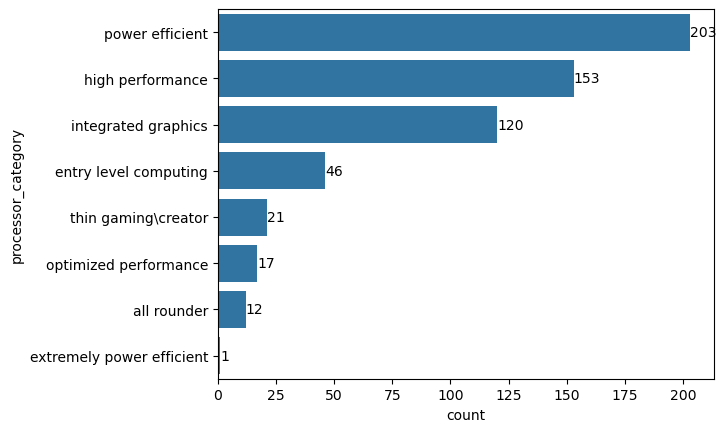

In [248]:
pcat = sns.countplot(df['processor_category'],order=df['processor_category'].value_counts().index)

plt.bar_label(pcat.containers[0])
plt.show()

**insights :**
1. **power efficient** laptops are in high count - they are more affordable laptops
2. 153 laptops have **high performance** chip in the laptop
3. Next comes **integrated graphics** chip, 120 laptops have this chip
4. **entry level computing** laptops are  only 46 , these laptops have price < 25k
5. Ryzen is providing separate **gaming / creator** range chip processors
6. **optimized performance** laptops are less. These chips offers both (optimized performance and battery efficiency)
7. **all rounder** chips are present in Apple laptops
8. **extremely power efficient** chip is available only in 1 laptop

In [249]:
df['ram'].value_counts()

ram
8     290
16    239
4      27
32     17
Name: count, dtype: int64

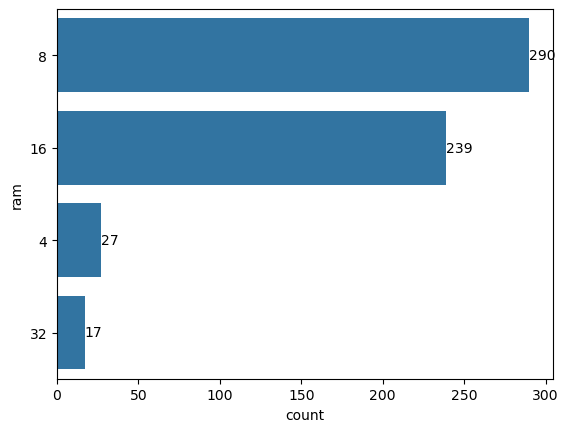

In [250]:
ram = sns.countplot(y = df['ram'], order=df['ram'].value_counts().index)

plt.bar_label(ram.containers[0])
plt.show()

**insights :**
1. 8GB RAM laptops are more in the laptops
2. Next, 16GB RAM laptops are available in the laptops
3. There are less laptops with 4GB, 32GB RAM laptops

In [251]:
df['memory'].value_counts()

memory
512     408
1000     93
256      55
128      10
64        7
Name: count, dtype: int64

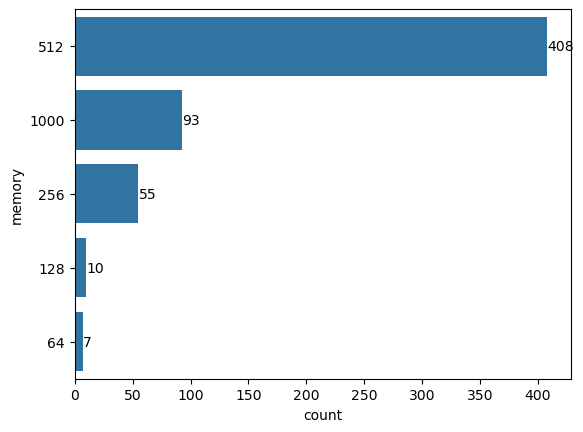

In [252]:
memory = sns.countplot(y= df['memory'],order = df['memory'].value_counts().index)

plt.bar_label(memory.containers[0])
plt.show()

**insgihts :**
1. 512gn memory spaced laptops are 408
2. All other 1000GB, 256GB laptops are 93 and 55 
3. Remaining 128GB, 64GB are less than 10

In [253]:
df['ratings'].value_counts()

ratings
4.3    110
4.4     97
4.2     96
4.1     46
4.5     45
3.8     31
4.6     31
3.6     21
4.0     21
3.9     20
3.7     18
4.7     17
4.8     14
4.9      6
Name: count, dtype: int64

In [254]:
df['ratings'].describe()

count    573.000000
mean       4.249913
std        0.280211
min        3.600000
25%        4.100000
50%        4.300000
75%        4.400000
max        4.900000
Name: ratings, dtype: float64

In [255]:
df['ratings'].median(), df['ratings'].mode()

(4.3,
 0    4.3
 Name: ratings, dtype: float64)

In [256]:
df['ratings'].skew()

-0.40095236814010593

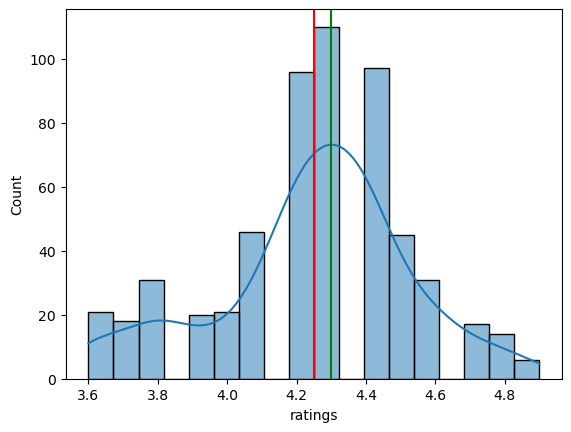

In [257]:
sns.histplot(x = df['ratings'],kde=True)
plt.axvline(df['ratings'].mean(),color ='r') # mean -- red line
plt.axvline(df['ratings'].median(),color ='g') # median --  green line

plt.show()

**insights :**
1. Tail are spread a little bit towards the left skew
2. It is similar to normal distribtuion
3. mean < median < mode left skewed data


In [258]:
df['reviews']

0        5
1       41
2       77
3      113
4      147
      ... 
568      0
569      0
570      0
571      5
572      5
Name: reviews, Length: 573, dtype: int64

In [259]:
df['reviews'].mode()

0    0
Name: reviews, dtype: int64

In [260]:
df['reviews'].skew()

1.23308819450246

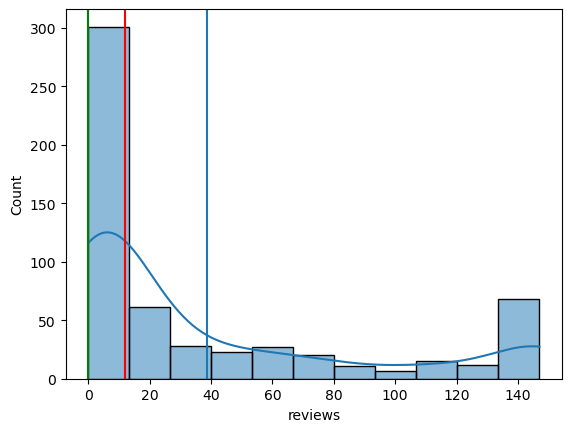

In [261]:
sns.histplot(df['reviews'],kde=True)
plt.axvline(df['reviews'].mean()) # mean  -- blue line
plt.axvline(df['reviews'].median(),c='r') # median -- red line
plt.axvline(df['reviews'].mode()[0],c='g') # mode -- green line

plt.show()

**insgihts :**
1. More laptops have 0 reviews
2. Tail is right skewed
3. mode > median > mean

In [262]:
df['ram_version'].value_counts()

ram_version
DDR4     378
DDR5     127
DDR4X     55
DDR5X      9
DDR3       4
Name: count, dtype: int64

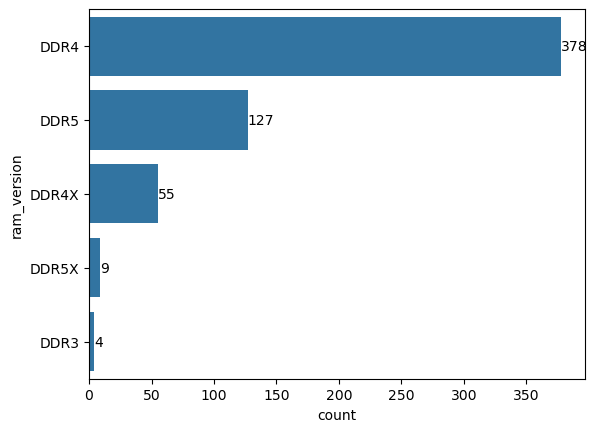

In [263]:
ram_v = sns.countplot(df['ram_version'],order = df['ram_version'].value_counts().index)
plt.bar_label(ram_v.containers[0])
plt.show()

**insgihts :**
1. Maximum laptops have DDR4 version RAM
2. DDR5 version RAMs are present is less than half of the DDR4 version
3. DDR4X version RAMs are available in 55 laptops
4. DDR5X, DDR3 are present in very less number

In [264]:
df['display_inch']

0      12
1      14
2      14
3      14
4      12
       ..
568    16
569    13
570    14
571    16
572    16
Name: display_inch, Length: 573, dtype: int64

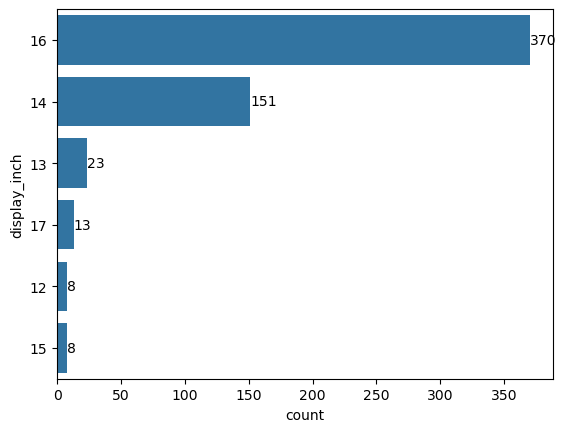

In [265]:
display = sns.countplot(y=df['display_inch'],order = df['display_inch'].value_counts().index)
plt.bar_label(display.containers[0])
plt.show()

**insgihts :**
1. 16inch displays are more in laptops
2. 14inch displays are approx half of the 16inch
3. 13, 17, 12, 15 are available in less number

In [266]:
df['warranty']

0      1
1      1
2      1
3      1
4      1
      ..
568    1
569    1
570    1
571    1
572    2
Name: warranty, Length: 573, dtype: int64

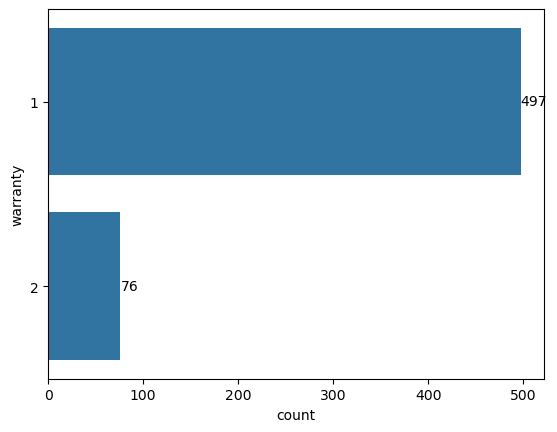

In [267]:
warranty = sns.countplot(y=df['warranty'],order=df['warranty'].value_counts().index)
plt.bar_label(warranty.containers[0])
plt.show()

**insights :**
1. More laptop brands are providing 1 year warranty
2. Only few laptop brands are giving 2 years warranty


In [268]:
df['price']

0       12990
1       12990
2       12990
3       13990
4       13990
        ...  
568    249999
569    261990
570    282990
571    299990
572    374990
Name: price, Length: 573, dtype: int64

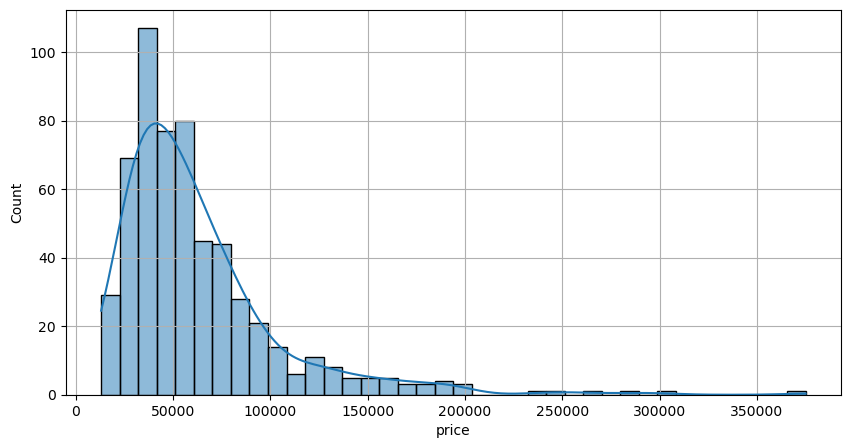

In [269]:
plt.figure(figsize=[10,5])
sns.histplot(df['price'],kde=True)
plt.grid()

**insight :**
1. Many lapots in price range of 20k - 90k
2. Gradually the laptops count is reducing from 1Lakh

In [270]:
df['price_range']

0            low
1            low
2            low
3            low
4            low
         ...    
568    very high
569    very high
570    very high
571    very high
572    very high
Name: price_range, Length: 573, dtype: category
Categories (4, object): ['low' < 'medium' < 'high' < 'very high']

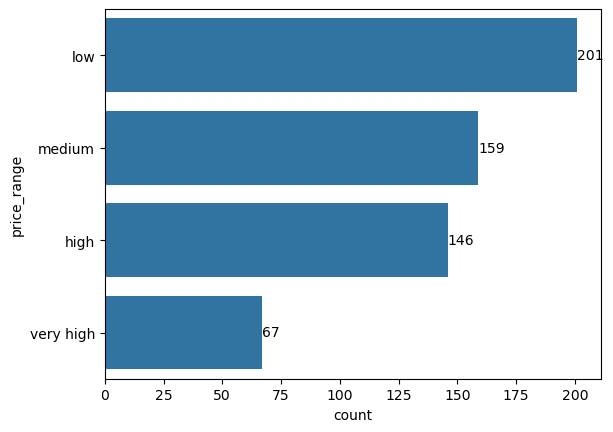

In [271]:
price = sns.countplot(df['price_range'])
plt.bar_label(price.containers[0])
plt.show()

**insights :**
1. 201 laptops are in low price range
2. 159 laptops 40k - 60k price range (medium)
3. 146 laptops are between 60k to 1lakh (high) range
4. 67 laptops are above 1lakh (very high) price range

laptop price < 40k = low, 40k - 60k = medium, 60k - 100k = high, 100k - 400k = very high


In [272]:
df['ratings_category']

0      average
1      average
2      average
3      average
4         good
        ...   
568       good
569       good
570       good
571       good
572       good
Name: ratings_category, Length: 573, dtype: category
Categories (3, object): ['average' < 'good' < 'excellent']

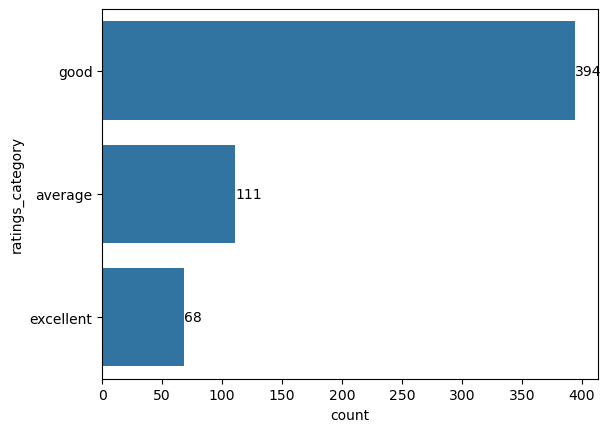

In [273]:
ratings_c = sns.countplot(df['ratings_category'],order=df['ratings_category'].value_counts().index)
plt.bar_label(ratings_c.containers[0])
plt.show()

**insights :**
1. 394 laptops have good ratings
2. average is given to 111 laptops
3. Few laptops got excelent rating

ratings between 3.5 - 4.0 = average , 4.1 - 4.5 = good, 4.6 -5.0 = excellent


## bivariate analysis :

In [274]:
df.groupby(['brand'])['price'].agg(['min','mean','max'])

min           mean     max
brand                                  
ACER       19982   59753.255814  249999
APPLE      73990  145674.615385  299990
ASUS       13990   59266.161017  199990
AVITA      15990   17990.000000   19990
AXL        16990   16990.000000   16990
CHUWI      12990   18323.333333   22990
COLORFUL   65640   78490.500000   89540
DELL       32500   60926.250000  237890
GIGABYTE   71990   71990.000000   71990
HP         20990   61013.955224  195990
INFINIX    18990   38227.000000   75990
LENOVO     15980   55943.560440  374990
LG         64762   64762.000000   64762
MICROSOFT  79990  151240.000000  261990
MSI        32990   97932.833333  199990
PRIMEBOOK  13990   13990.000000   13990
SAMSUNG    52990  101723.333333  149990
ULTIMUS    12990   19190.000000   26990
WINGS      23990   26740.000000   29990
ZEBRONICS  27990   37656.666667   43990

<Axes: ylabel='brand'>

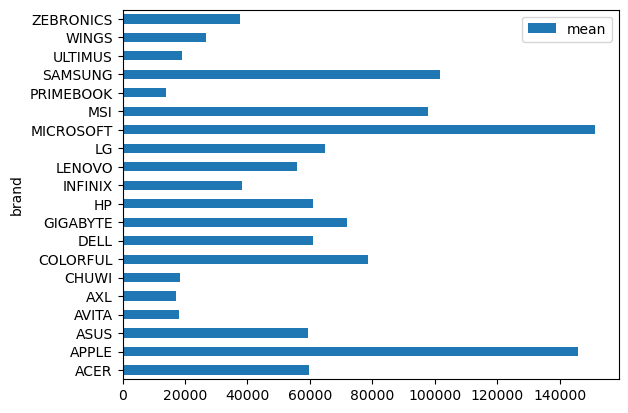

In [275]:
df.groupby(['brand'])['price'].agg(['mean']).plot(kind='barh')

**insights :**
1. Microsoft and Apple laptops have average price of above 1,40,000
2. MSI and Samsung are near to 1,00,000
3. All other brand prices are less than 80,000
4. Around 7 brands have average price between 60k to 80k

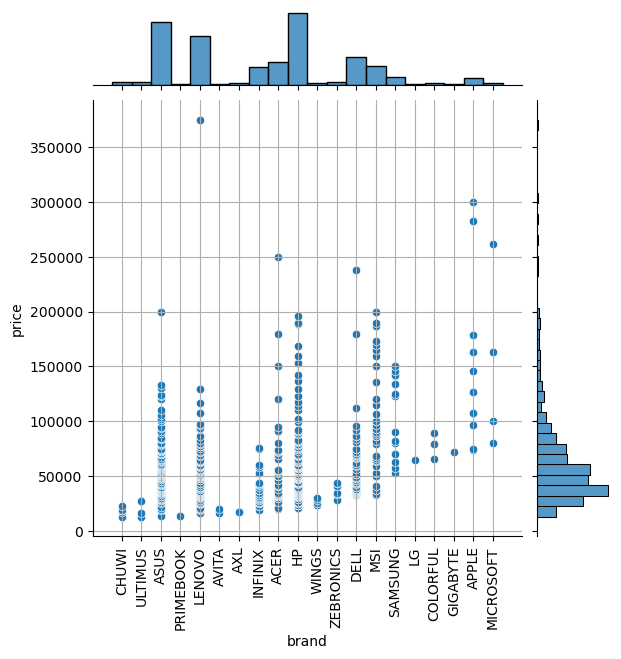

In [276]:
sns.jointplot(data=df,y='price',x='brand')

plt.grid()
plt.xticks(rotation='vertical')

plt.show()

In [277]:
df.groupby(['ram'])[['price']].agg(['min','mean','max']).transpose()

ram                   4              8              16             32
price min   12990.000000   15990.000000   32990.000000   74990.000000
      mean  20563.703704   44012.872414   80072.506276  203382.411765
      max   32990.000000  178590.000000  199990.000000  374990.000000

<Axes: >

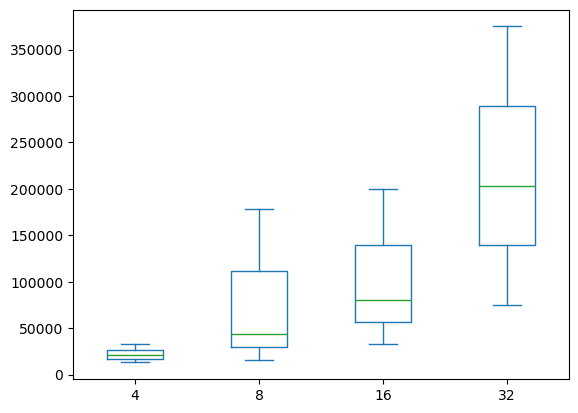

In [278]:
df.groupby(['ram'])[['price']].agg(['min','mean','max']).transpose().plot(kind='box')


In [279]:
df.groupby(['memory'])['price'].agg(['min','mean','max'])

min           mean     max
memory                              
64      13990   19655.857143   25900
128     12990   17379.200000   22990
256     15990   38232.018182  162990
512     22990   57024.441176  199990
1000    21800  110039.430108  374990

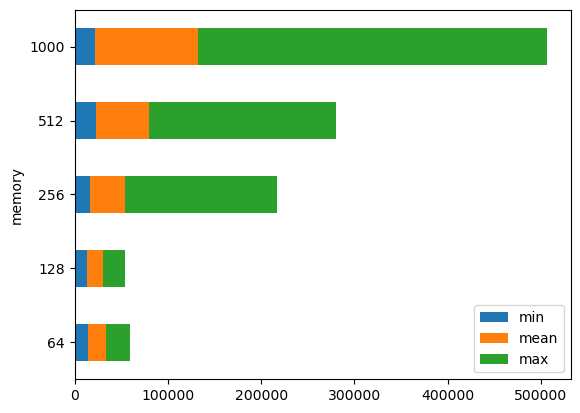

In [280]:
ax = df.groupby(['memory'])['price'].agg(['min','mean','max']).plot(kind='barh',stacked=True)

plt.show()

In [281]:
df.groupby('ratings')['price'].agg(['min','mean','max','sum'])

min           mean     max      sum
ratings                                       
3.6      12990   38758.095238   88990   813920
3.7      12990   28955.000000   89540   521190
3.8      13990   39633.193548   72990  1228629
3.9      19990   44398.950000   89990   887979
4.0      18990   44085.047619   83690   925786
4.1      22890   50495.239130  140990  2322781
4.2      13990   58906.427083  374990  5655017
4.3      18590   57759.963636  261990  6353596
4.4      13990   67527.762887  237890  6550193
4.5      27990   83001.511111  195990  3735068
4.6      35055   91561.322581  188990  2838401
4.7      35990  106620.294118  179483  1812545
4.8      37990  111034.928571  172990  1554489
4.9      56939  119031.500000  149990   714189

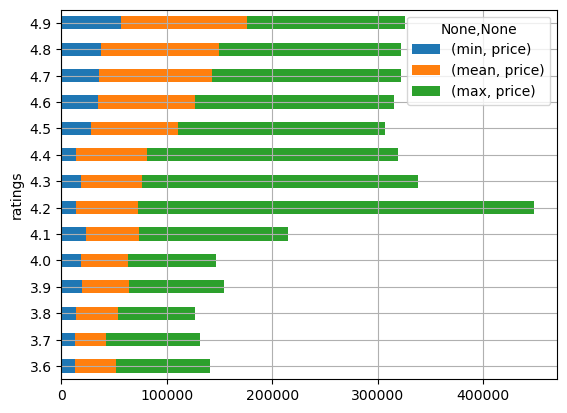

In [282]:
ax = df.pivot_table(values='price', index= 'ratings', aggfunc=['min','mean','max']).plot(kind='barh',stacked =True)

plt.grid()
plt.show()

In [283]:
df['reviews'].describe()

count    573.000000
mean      38.755672
std       50.378320
min        0.000000
25%        2.000000
50%       12.000000
75%       60.000000
max      147.000000
Name: reviews, dtype: float64

<Axes: >

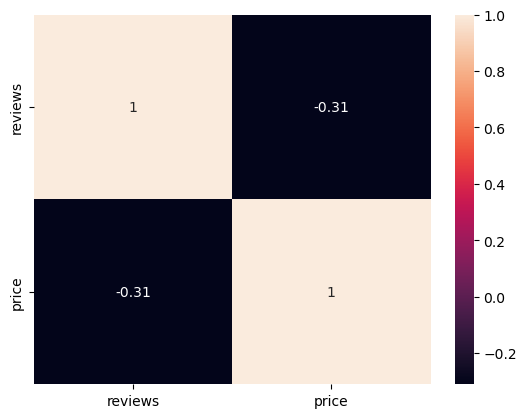

In [284]:
sns.heatmap(df[['reviews','price']].corr(),annot=True)

<Axes: xlabel='reviews', ylabel='price'>

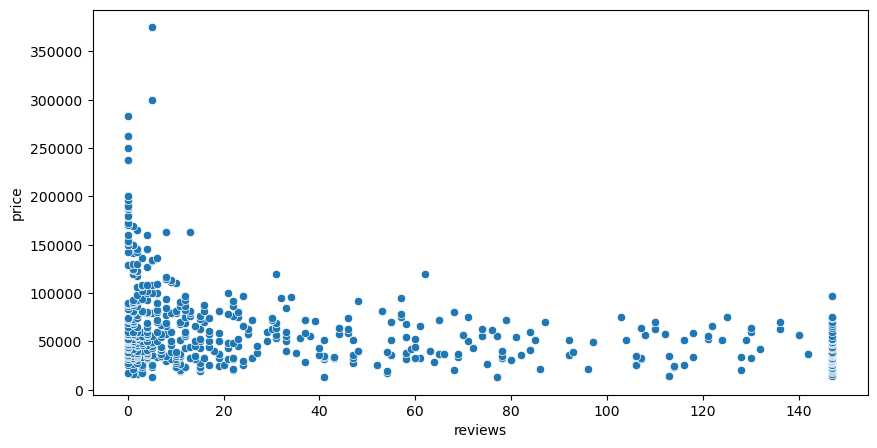

In [285]:
plt.figure(figsize=[10,5])

sns.scatterplot(data = df,x = df['reviews'], y= df['price'])

In [286]:
df['ram_version'].value_counts()

ram_version
DDR4     378
DDR5     127
DDR4X     55
DDR5X      9
DDR3       4
Name: count, dtype: int64

In [287]:
df.groupby(['ram_version'])['price'].describe()

count           mean           std      min       25%       50%  \
ram_version                                                                    
DDR3           4.0  118432.750000  67706.790971  51840.0  65393.25  116450.5   
DDR4         378.0   52058.976190  29958.954497  12990.0  34225.00   47940.0   
DDR4X         55.0   54637.654545  33193.708920  13990.0  30250.50   42890.0   
DDR5         127.0   92032.110236  56226.309912  18990.0  53990.00   79990.0   
DDR5X          9.0  118734.444444  47430.346591  59990.0  75990.00  107990.0   

                  75%       max  
ram_version                      
DDR3         169490.0  188990.0  
DDR4          60790.0  299990.0  
DDR4X         77190.0  159999.0  
DDR5         119994.5  374990.0  
DDR5X        149990.0  195990.0

<Axes: xlabel='ram_version', ylabel='price'>

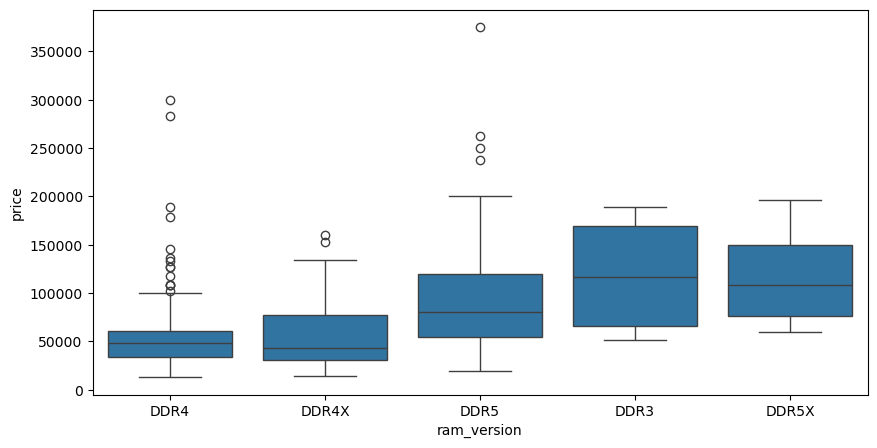

In [288]:
plt.figure(figsize=[10,5])

sns.boxplot(data=df, x= 'ram_version', y= 'price')

In [289]:
df['display_inch']

0      12
1      14
2      14
3      14
4      12
       ..
568    16
569    13
570    14
571    16
572    16
Name: display_inch, Length: 573, dtype: int64

In [290]:
df.groupby(['display_inch'])['price'].describe()

count           mean           std      min      25%       50%  \
display_inch                                                                   
12              8.0   34775.250000  34620.269091  12990.0  13990.0   17981.0   
13             23.0  111767.869565  48362.475821  33990.0  84245.0  106990.0   
14            151.0   55876.013245  38197.191868  12990.0  32250.0   43999.0   
15              8.0   74994.500000  43942.499058  28990.0  34490.0   69307.5   
16            370.0   60475.375676  39262.181712  16990.0  35982.5   51245.0   
17             13.0  127061.307692  56057.317141  51990.0  83614.0  132990.0   

                    75%       max  
display_inch                       
12             35965.00   99990.0  
13            125444.50  261990.0  
14             69374.50  282990.0  
15            100715.75  145490.0  
16             70990.00  374990.0  
17            164990.00  237890.0

<Axes: xlabel='display_inch', ylabel='price'>

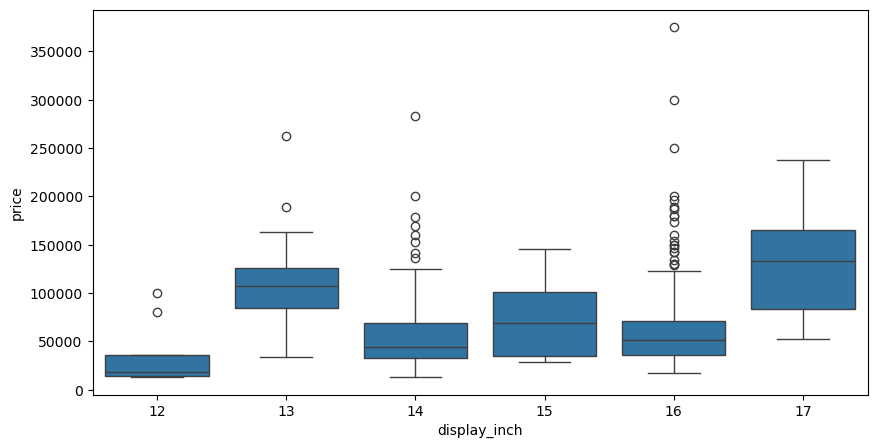

In [291]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df, x= 'display_inch', y= 'price')

In [292]:
df['warranty']

0      1
1      1
2      1
3      1
4      1
      ..
568    1
569    1
570    1
571    1
572    2
Name: warranty, Length: 573, dtype: int64

In [293]:
df.groupby(['warranty'])['price'].describe()

count          mean           std      min      25%      50%  \
warranty                                                                 
1         497.0  59759.175050  39360.328392  12990.0  33990.0  49999.0   
2          76.0  81756.223684  54646.249566  25300.0  41490.0  67840.0   

              75%       max  
warranty                     
1         71999.0  299990.0  
2         97740.0  374990.0

<Axes: xlabel='warranty', ylabel='price'>

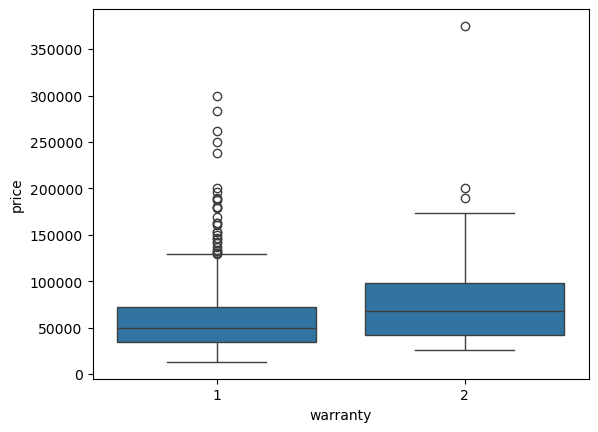

In [294]:
sns.boxplot(data=df, x= 'warranty', y= 'price')

In [295]:
df['processor_type']

0       others
1       others
2       others
3       others
4       others
        ...   
568    Core i9
569    Core i7
570     others
571     others
572    Core i9
Name: processor_type, Length: 573, dtype: object

In [296]:
df.groupby(['processor_type'])['price'].describe()

count           mean            std       min        25%  \
processor_type                                                             
Core 5            1.0   79990.000000            NaN   79990.0   79990.00   
Core 7            2.0  106490.000000   23334.523779   89990.0   98240.00   
Core i3         103.0   35500.611650    5770.017945   19990.0   31999.50   
Core i5         169.0   61513.674556   21394.002694   26990.0   49990.00   
Core i7          84.0  103077.154762   44052.634415   39990.0   76517.25   
Core i9           8.0  166782.250000  105947.331310   74990.0   78240.00   
Ryzen 3          26.0   31698.576923    5781.173086   23990.0   26947.50   
Ryzen 5          68.0   50832.764706   13699.148004   31690.0   39990.00   
Ryzen 7          28.0   79193.607143   27227.291826   46215.0   59590.00   
Ultra 5           2.0  108990.000000   46669.047558   75990.0   92490.00   
Ultra 7           9.0  144584.666667   36466.267371  106990.0  114990.00   
Ultra 9           1.0  189990.000000            NaN  189990.0  189990.00   
others           72.0   46781.333333   54658.569577   12990.0   18990.00   

                     50%        75%       max  
processor_type                                 
Core 5           79990.0   79990.00   79990.0  
Core 7          106490.0  114740.00  122990.0  
Core i3          35100.0   37940.00   57990.0  
Core i5          57999.0   70990.00  199990.0  
Core i7          92840.0  126214.75  261990.0  
Core i9         144949.5  204549.75  374990.0  
Ryzen 3          32690.5   34222.50   46990.0  
Ryzen 5          49990.0   57246.75   91499.0  
Ryzen 7          68990.0   91242.25  129990.0  
Ultra 5         108990.0  125490.00  141990.0  
Ultra 7         136342.0  168990.00  199990.0  
Ultra 9         189990.0  189990.00  189990.0  
others           25400.0   49666.75  299990.0

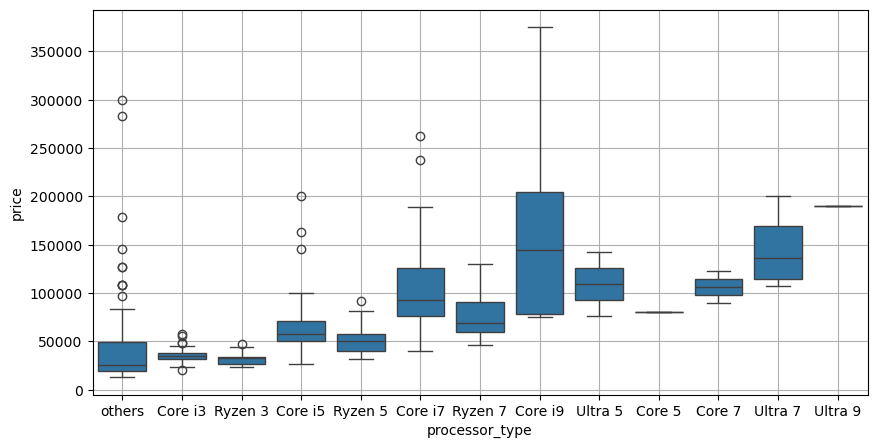

In [297]:
plt.figure(figsize=[10,5])
ax = sns.boxplot(data=df,x='processor_type',y='price')
plt.grid()
plt.show()

In [298]:
df['processor_generation']

0      10th
1        No
2        No
3        No
4        No
       ... 
568    14th
569    12th
570      No
571      No
572    14th
Name: processor_generation, Length: 573, dtype: object

In [299]:
df.groupby(df['processor_generation'])['price'].describe()

count           mean           std       min        25%  \
processor_generation                                                            
10th                   24.0   50354.375000  34427.431122   12990.0   28990.00   
11th                  105.0   45714.038095  23279.279383   16990.0   32990.00   
12th                  147.0   64160.884354  34942.511092   18590.0   37240.00   
13th                   90.0   81270.844444  37977.332108   33400.0   55990.00   
14th                    6.0  211744.500000  88578.643726  142490.0  155746.75   
3                      26.0   31698.576923   5781.173086   23990.0   26947.50   
4th                     4.0   21590.000000   3357.578493   18990.0   19740.00   
5                      71.0   52881.661972  17755.595407   31690.0   39990.00   
6th                     1.0   83614.000000           NaN   83614.0   83614.00   
7                      39.0   95683.666667  39923.524673   46215.0   63204.50   
8th                     3.0   91509.666667  62028.376654   51840.0   55769.50   
9                       1.0  189990.000000           NaN  189990.0  189990.00   
9th                     4.0   47369.750000  22863.634450   16990.0   41740.00   
No                     52.0   52969.519231  62218.945678   12990.0   20990.00   

                           50%        75%       max  
processor_generation                                 
10th                   42740.0   60011.00  188990.0  
11th                   39400.0   51990.00  189400.0  
12th                   57490.0   79391.00  261990.0  
13th                   72695.0   92915.00  199990.0  
14th                  176494.5  232499.00  374990.0  
3                      32690.5   34222.50   46990.0  
4th                    20440.0   22290.00   26490.0  
5                      50100.0   59240.00  141990.0  
6th                    83614.0   83614.00   83614.0  
7                      82990.0  122994.50  199990.0  
8th                    59699.0  111344.50  162990.0  
9                     189990.0  189990.00  189990.0  
9th                    49994.5   55624.25   72500.0  
No                     25899.5   63490.00  299990.0

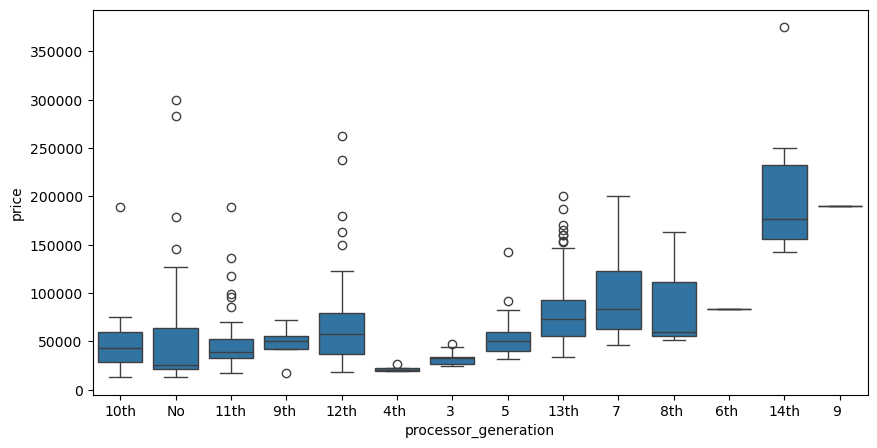

In [300]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df, x= 'processor_generation', y= 'price')

plt.show()

In [301]:
df['processor_series']

0        N4020
1        N4020
2         Core
3        N4500
4       MT8788
        ...   
568    14900HX
569      1255U
570        Max
571        Max
572    14900HX
Name: processor_series, Length: 573, dtype: object

In [302]:
df.groupby(['processor_series'])['price'].mean()

processor_series
1005G1    29617.250000
10110U    19990.000000
10210U    69911.000000
10300H    53033.000000
1035G1    41990.000000
              ...     
N5030     21800.000000
N5100     22570.000000
N6000     31490.000000
RAM       32990.000000
i5        49859.666667
Name: price, Length: 106, dtype: float64

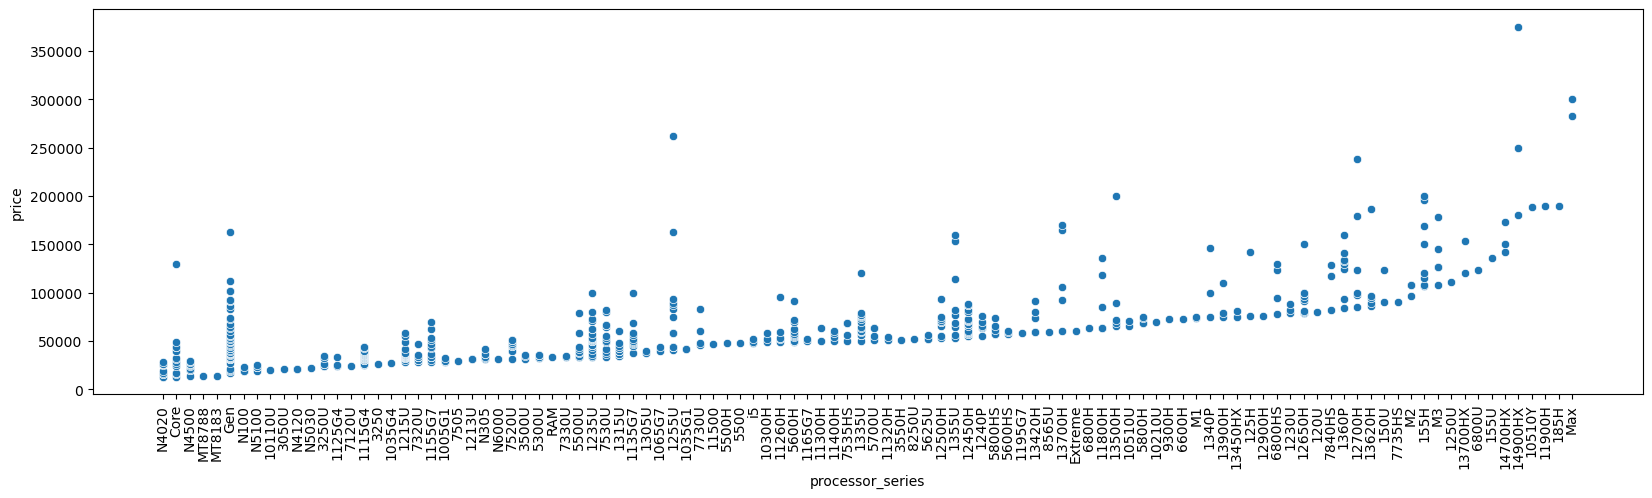

In [303]:
plt.figure(figsize=[20,5])
sns.scatterplot(data=df, x = 'processor_series', y='price')

plt.xticks(rotation=90)
plt.show()

In [304]:
df['processor_category']

0      entry level computing
1      entry level computing
2           high performance
3      entry level computing
4      entry level computing
               ...          
568         high performance
569          power efficient
570              all rounder
571              all rounder
572         high performance
Name: processor_category, Length: 573, dtype: object

In [305]:
df.groupby(['processor_category'])[['price','processor_series']].describe()

price                                         \
                           count           mean           std       min   
processor_category                                                        
all rounder                 12.0  144231.666667  74588.890939   73990.0   
entry level computing       46.0   23959.608696   6757.689906   12990.0   
extremely power efficient    1.0  188990.000000           NaN  188990.0   
high performance           153.0   86114.758170  49894.881838   12990.0   
integrated graphics        120.0   45868.525000  21556.702708   16990.0   
optimized performance       17.0  100883.000000  34769.494219   55490.0   
power efficient            203.0   53499.270936  28573.763891   19990.0   
thin gaming\creator         21.0   77939.380952  26057.366075   49990.0   

                                                                    
                                25%       50%        75%       max  
processor_category                                                  
all rounder                105240.0  117440.0  153765.00  299990.0  
entry level computing       18990.0   23340.0   27540.00   41990.0  
extremely power efficient  188990.0  188990.0  188990.00  188990.0  
high performance            57000.0   72400.0   95999.00  374990.0  
integrated graphics         32940.0   39450.0   51617.25  162990.0  
optimized performance       69990.0   92990.0  132990.00  159990.0  
power efficient             35122.5   46290.0   61090.00  261990.0  
thin gaming\creator         57790.0   68490.0   89990.00  129990.0

In [306]:
df.groupby(['processor_category']).agg(
    price = ('price','mean'),
    processor_count = ('processor_type','count')
)

price  processor_count
processor_category                                       
all rounder                144231.666667               12
entry level computing       23959.608696               46
extremely power efficient  188990.000000                1
high performance            86114.758170              153
integrated graphics         45868.525000              120
optimized performance      100883.000000               17
power efficient             53499.270936              203
thin gaming\creator         77939.380952               21

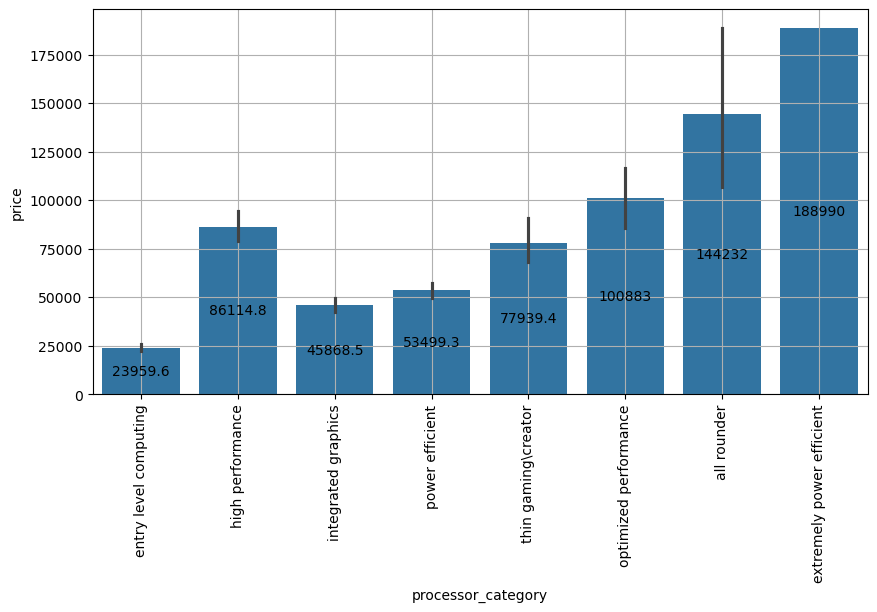

In [307]:
plt.figure(figsize=[10,5])
ax=sns.barplot(data=df, x='processor_category', y='price',estimator='mean')
plt.bar_label(ax.containers[0],label_type='center')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [308]:
df['ratings_category']

0      average
1      average
2      average
3      average
4         good
        ...   
568       good
569       good
570       good
571       good
572       good
Name: ratings_category, Length: 573, dtype: category
Categories (3, object): ['average' < 'good' < 'excellent']

In [309]:
df.groupby(['ratings_category'],observed=False)['price'].describe()

/var/folders/th/bg0b02995176q821fljkj2ch0000gn/T/ipykernel_828/3937926299.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['ratings_category'])['price'].describe()


count           mean           std      min      25%  \
ratings_category                                                         
average           111.0   39436.972973  19849.710641  12990.0  23840.0   
good              394.0   62478.819797  41675.916170  13990.0  36417.5   
excellent          68.0  101759.176471  44807.500309  35055.0  69908.0   

                      50%       75%       max  
ratings_category                               
average           33990.0   49994.5   89990.0  
good              52350.0   72475.0  374990.0  
excellent         91945.0  142115.0  188990.0

<Axes: xlabel='ratings_category', ylabel='price'>

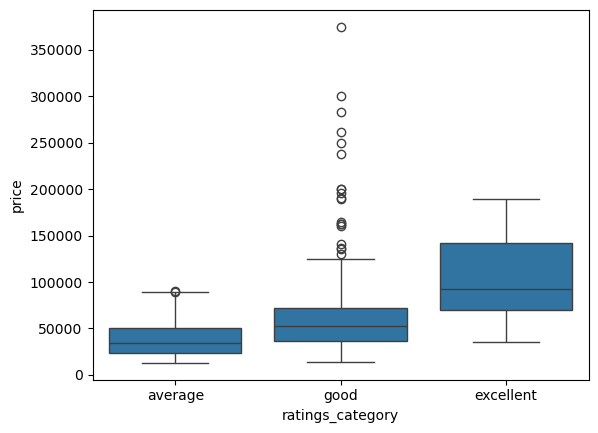

In [310]:
sns.boxplot(data=df,x='ratings_category',y='price')

In [311]:
df.pivot_table(values='price',index='ratings_category',aggfunc=['min','mean','max'])

min           mean     max
                  price          price   price
ratings_category                              
average           12990   39436.972973   89990
good              13990   62478.819797  374990
excellent         35055  101759.176471  188990

<Axes: ylabel='ratings_category'>

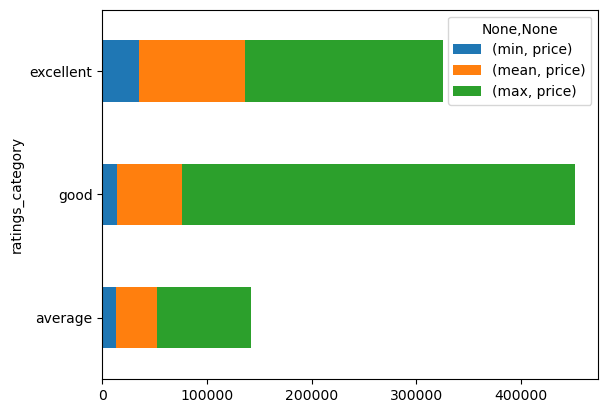

In [312]:
df.pivot_table(values='price',index='ratings_category',aggfunc=['min','mean','max']).plot(kind='barh',stacked=True)


In [313]:
df['price_range']

0            low
1            low
2            low
3            low
4            low
         ...    
568    very high
569    very high
570    very high
571    very high
572    very high
Name: price_range, Length: 573, dtype: category
Categories (4, object): ['low' < 'medium' < 'high' < 'very high']

In [314]:
df.groupby(['price_range'], observed=False)['price'].describe()

/var/folders/th/bg0b02995176q821fljkj2ch0000gn/T/ipykernel_828/3059117805.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['price_range'])['price'].describe()


count           mean           std       min       25%       50%  \
price_range                                                                     
low          201.0   30543.059701   6835.879991   12990.0   25990.0   32500.0   
medium       159.0   51260.150943   5593.819438   40990.0   46790.0   50990.0   
high         146.0   77371.869863  10842.989460   60190.0   68990.0   74990.0   
very high     67.0  154148.820896  51130.848130  101790.0  119994.5  140990.0   

                  75%       max  
price_range                      
low           35600.0   39999.0  
medium        55990.0   59990.0  
high          84990.0   99990.0  
very high    171490.0  374990.0

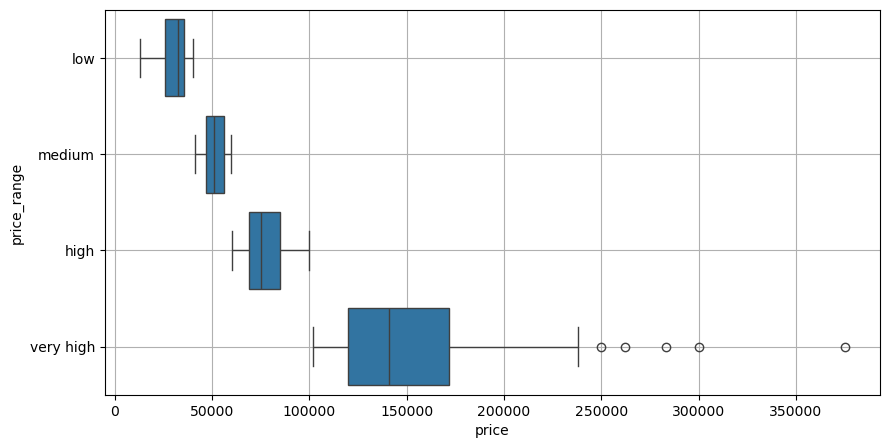

In [315]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df, y='price_range', x='price')
plt.grid()

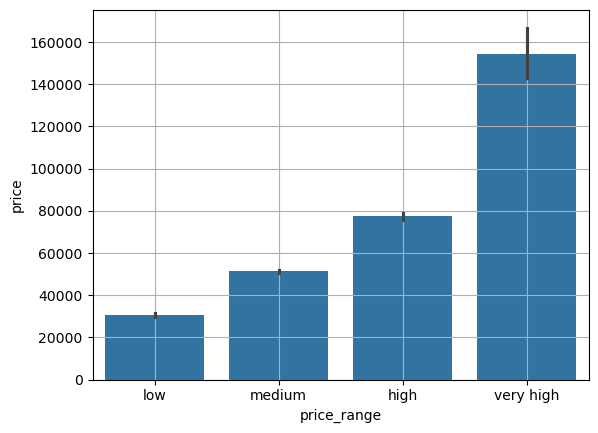

In [316]:
sns.barplot(data=df, x='price_range', y='price')
plt.grid()


## Multi variate analysis :

In [317]:
df

brand                     model                         processor  \
0        CHUWI        Intel Celeron Dual          Dual Core 10th Gen N4020   
1      ULTIMUS        Intel Celeron Dual     Intel Celeron Dual Core N4020   
2      ULTIMUS        Intel Celeron Dual   Ultimus Intel Celeron Dual Core   
3         ASUS  Chromebook Intel Celeron     Intel Celeron Dual Core N4500   
4    PRIMEBOOK          4G Android Based  4G Android Based MediaTek MT8788   
..         ...                       ...                               ...   
568       ACER        Predator Helios 16          Core i9 14th Gen 14900HX   
569  MICROSOFT             Surface Pro 9            Core i7 12th Gen 1255U   
570      APPLE          2023 MacBook Pro          MacBook Pro Apple M2 Max   
571      APPLE          2021 Macbook Pro          Macbook Pro Apple M1 Max   
572     LENOVO         Legion Intel Core          Core i9 14th Gen 14900HX   

     ram  memory  ratings  reviews ram_version  display_inch  warranty  \
0      4     128      3.6        5        DDR4            12         1   
1      4     128      3.7       41        DDR4            14         1   
2      4     128      3.7       77        DDR4            14         1   
3      4      64      3.8      113       DDR4X            14         1   
4      4      64      4.2      147        DDR4            12         1   
..   ...     ...      ...      ...         ...           ...       ...   
568   32    1000      4.3        0        DDR5            16         1   
569   32    1000      4.3        0        DDR5            13         1   
570   32    1000      4.2        0        DDR4            14         1   
571   32    1000      4.2        5        DDR4            16         1   
572   32    1000      4.2        5        DDR5            16         2   

      price processor_type processor_generation processor_series  \
0     12990         others                 10th            N4020   
1     12990         others                   No            N4020   
2     12990         others                   No             Core   
3     13990         others                   No            N4500   
4     13990         others                   No           MT8788   
..      ...            ...                  ...              ...   
568  249999        Core i9                 14th          14900HX   
569  261990        Core i7                 12th            1255U   
570  282990         others                   No              Max   
571  299990         others                   No              Max   
572  374990        Core i9                 14th          14900HX   

        processor_category ratings_category price_range  
0    entry level computing          average         low  
1    entry level computing          average         low  
2         high performance          average         low  
3    entry level computing          average         low  
4    entry level computing             good         low  
..                     ...              ...         ...  
568       high performance             good   very high  
569        power efficient             good   very high  
570            all rounder             good   very high  
571            all rounder             good   very high  
572       high performance             good   very high  

[573 rows x 17 columns]

<Axes: >

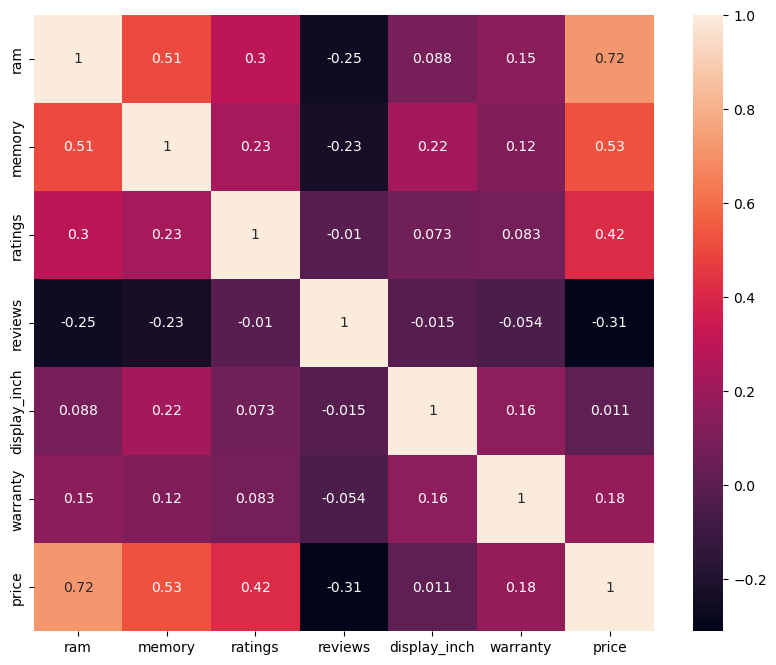

In [318]:
numeric_corr = df.corr(numeric_only=True)

plt.figure(figsize=[10,8])
sns.heatmap(numeric_corr,annot=True)


**insights :**
1. There's `High positive` correlation between ram and price
2. `Moderate positive` correlation between memory and price
3. `Low positive` correlation between ratings and price, price of laptops is not fixed based on the ratings.
4. `Low negative` correlation between reviews and price
5. `Negligible` correlation between display_inch, warranty and price
   

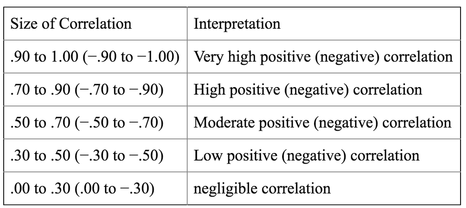

In [319]:
df.select_dtypes(include=['object'])

brand                     model                         processor  \
0        CHUWI        Intel Celeron Dual          Dual Core 10th Gen N4020   
1      ULTIMUS        Intel Celeron Dual     Intel Celeron Dual Core N4020   
2      ULTIMUS        Intel Celeron Dual   Ultimus Intel Celeron Dual Core   
3         ASUS  Chromebook Intel Celeron     Intel Celeron Dual Core N4500   
4    PRIMEBOOK          4G Android Based  4G Android Based MediaTek MT8788   
..         ...                       ...                               ...   
568       ACER        Predator Helios 16          Core i9 14th Gen 14900HX   
569  MICROSOFT             Surface Pro 9            Core i7 12th Gen 1255U   
570      APPLE          2023 MacBook Pro          MacBook Pro Apple M2 Max   
571      APPLE          2021 Macbook Pro          Macbook Pro Apple M1 Max   
572     LENOVO         Legion Intel Core          Core i9 14th Gen 14900HX   

    ram_version processor_type processor_generation processor_series  \
0          DDR4         others                 10th            N4020   
1          DDR4         others                   No            N4020   
2          DDR4         others                   No             Core   
3         DDR4X         others                   No            N4500   
4          DDR4         others                   No           MT8788   
..          ...            ...                  ...              ...   
568        DDR5        Core i9                 14th          14900HX   
569        DDR5        Core i7                 12th            1255U   
570        DDR4         others                   No              Max   
571        DDR4         others                   No              Max   
572        DDR5        Core i9                 14th          14900HX   

        processor_category  
0    entry level computing  
1    entry level computing  
2         high performance  
3    entry level computing  
4    entry level computing  
..                     ...  
568       high performance  
569        power efficient  
570            all rounder  
571            all rounder  
572       high performance  

[573 rows x 8 columns]

### brand - processor_cat - price

In [320]:
pd.crosstab(index=df['brand'],columns=df['processor_category'], values=df['price'],aggfunc='mean')

processor_category    all rounder  entry level computing  \
brand                                                      
ACER                          NaN           30556.000000   
APPLE               144231.666667                    NaN   
ASUS                          NaN           25597.100000   
AVITA                         NaN           15990.000000   
AXL                           NaN                    NaN   
CHUWI                         NaN           18323.333333   
COLORFUL                      NaN                    NaN   
DELL                          NaN                    NaN   
GIGABYTE                      NaN                    NaN   
HP                            NaN           25880.000000   
INFINIX                       NaN           22570.000000   
LENOVO                        NaN           24248.166667   
LG                            NaN                    NaN   
MICROSOFT                     NaN                    NaN   
MSI                           NaN                    NaN   
PRIMEBOOK                     NaN           13990.000000   
SAMSUNG                       NaN                    NaN   
ULTIMUS                       NaN           12990.000000   
WINGS                         NaN                    NaN   
ZEBRONICS                     NaN                    NaN   

processor_category  extremely power efficient  high performance  \
brand                                                             
ACER                                      NaN     100905.142857   
APPLE                                     NaN               NaN   
ASUS                                      NaN      73183.600000   
AVITA                                     NaN               NaN   
AXL                                       NaN      16990.000000   
CHUWI                                     NaN               NaN   
COLORFUL                                  NaN      78490.500000   
DELL                                      NaN     115693.428571   
GIGABYTE                                  NaN      71990.000000   
HP                                   188990.0      78882.911765   
INFINIX                                   NaN      65990.000000   
LENOVO                                    NaN      80628.750000   
LG                                        NaN               NaN   
MICROSOFT                                 NaN               NaN   
MSI                                       NaN     115401.875000   
PRIMEBOOK                                 NaN               NaN   
SAMSUNG                                   NaN     145990.000000   
ULTIMUS                                   NaN      14490.000000   
WINGS                                     NaN               NaN   
ZEBRONICS                                 NaN               NaN   

processor_category  integrated graphics  optimized performance  \
brand                                                            
ACER                       43893.000000                55490.0   
APPLE                     162990.000000                    NaN   
ASUS                       47224.222222               116490.0   
AVITA                               NaN                    NaN   
AXL                        16990.000000                    NaN   
CHUWI                               NaN                    NaN   
COLORFUL                            NaN                    NaN   
DELL                       53958.904762                79290.0   
GIGABYTE                            NaN                    NaN   
HP                         51451.800000                70490.0   
INFINIX                    36047.562500                    NaN   
LENOVO                     35386.846154                96644.5   
LG                                  NaN                64762.0   
MICROSOFT                           NaN                    NaN   
MSI                        36990.000000               126490.0   
PRIMEBOOK                           NaN                    NaN   
SAMSUNG         

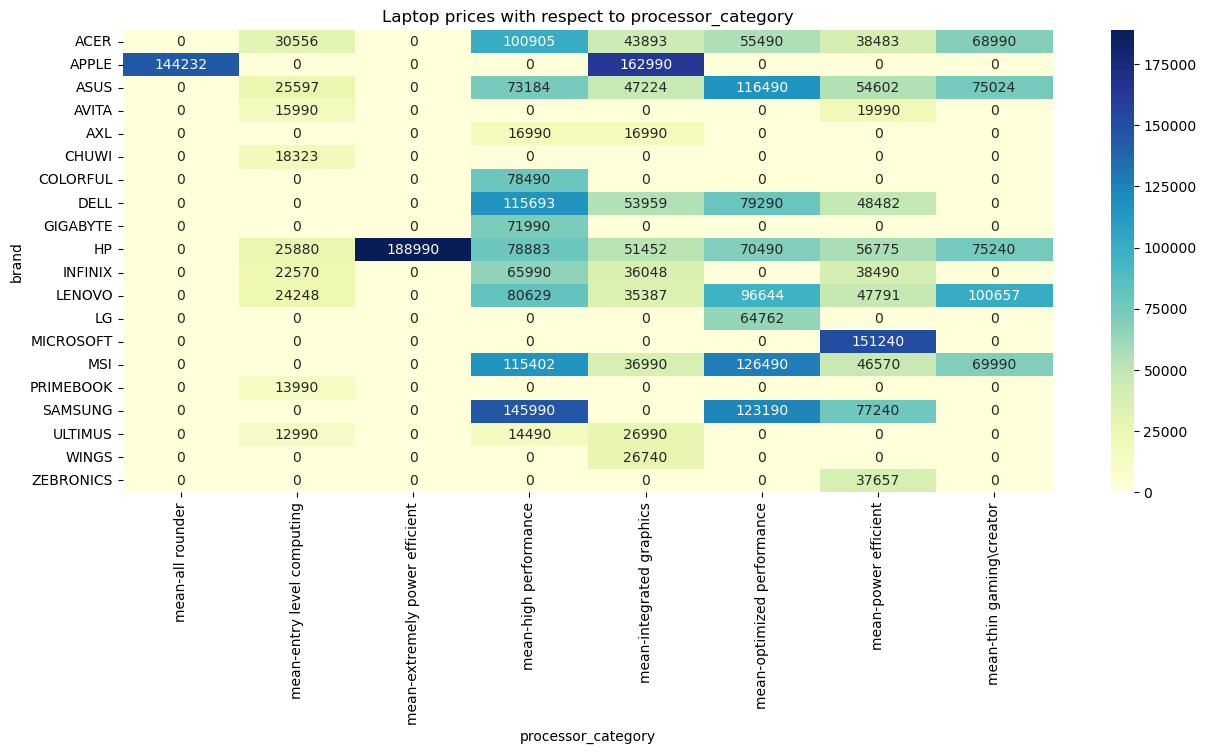

In [321]:
plt.figure(figsize=[15,6])
sns.heatmap(pd.crosstab([df['brand']], [df['processor_category']], values=df['price'], aggfunc=['mean'],).fillna(0)
            , cmap="YlGnBu", fmt='.0f', annot=True, cbar=True, )

plt.title('Laptop prices with respect to processor_category')
plt.xlabel('processor_category')
plt.show()



**insights :**
1. HP has laptops in extremely power efficient
2. ACER laptops have more average price in high performance processor laptops
3. APPLE have both all rounder and integrated graphics laptops
4. MICROSOFT has power efficient laptops
5. SAMSUNG has high performance processor laptops and optimized performance laptops more average price
6. MSI has more average price in both high performance processor and optimized performance
7. LENOVO has thin gaming\creator laptops with high average mean

### price - brand - price_range

In [322]:
df.pivot_table(values='price', index='brand', columns='price_range',
                                  aggfunc=['mean'], fill_value=0)


mean                                           
price_range           low        medium          high      very high
brand                                                               
ACER         30794.235294  50108.153846  77165.111111  174999.000000
APPLE            0.000000      0.000000  81990.000000  164780.000000
ASUS         32290.393939  52391.744186  76582.787879  127527.444444
AVITA        17990.000000      0.000000      0.000000       0.000000
AXL          16990.000000      0.000000      0.000000       0.000000
CHUWI        18323.333333      0.000000      0.000000       0.000000
COLORFUL         0.000000      0.000000  78490.500000       0.000000
DELL         36221.117647  49947.937500  76492.250000  176454.333333
GIGABYTE         0.000000      0.000000  71990.000000       0.000000
HP           31679.521739  51921.209302  76681.966667  145702.733333
INFINIX      30054.590909  49923.333333  75490.000000       0.000000
LENOVO       31084.918919  50924.960000  75364.541667  171769.800000
LG               0.000000      0.000000  64762.000000       0.000000
MICROSOFT        0.000000      0.000000  89990.000000  212490.000000
MSI          35240.000000  50590.000000  83927.133333  156063.750000
PRIMEBOOK    13990.000000      0.000000      0.000000       0.000000
SAMSUNG          0.000000  54990.000000  75823.333333  137275.714286
ULTIMUS      19190.000000      0.000000      0.000000       0.000000
WINGS        26740.000000      0.000000      0.000000       0.000000
ZEBRONICS    32323.333333  42990.000000      0.000000       0.000000

<Axes: xlabel='None-price_range', ylabel='brand'>

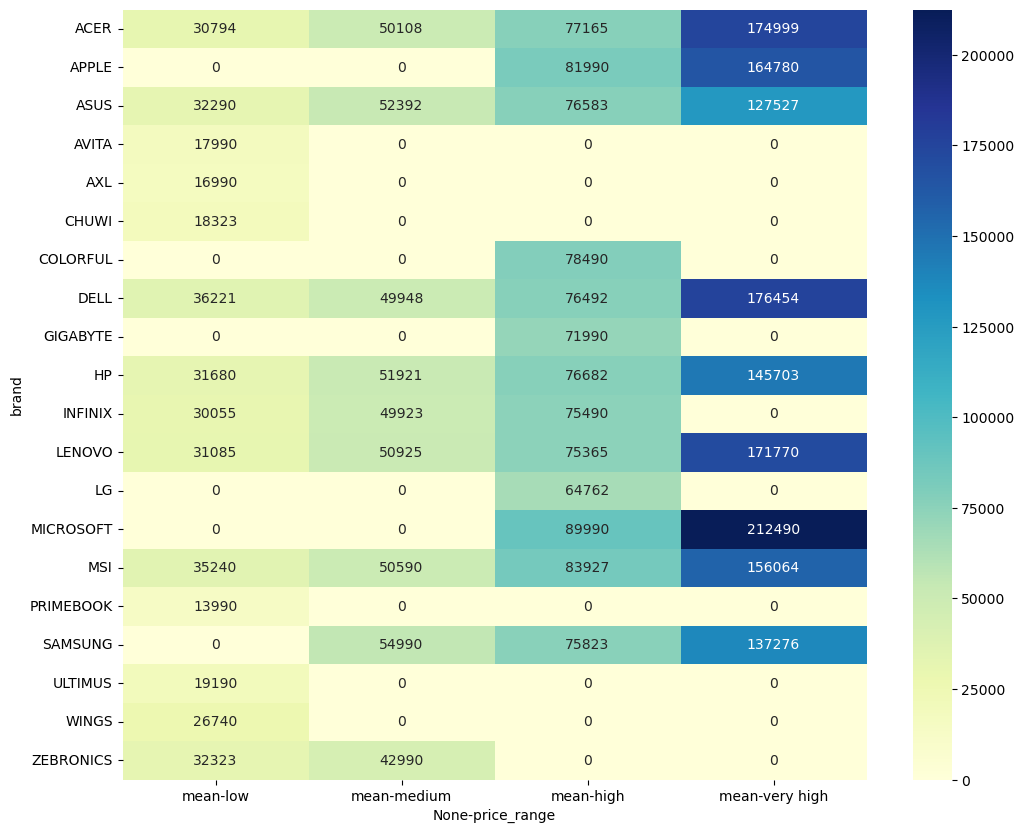

In [323]:
plt.figure(figsize=[12,10])

sns.heatmap(df.pivot_table(values='price', index=['brand'], columns='price_range', aggfunc=['mean']).fillna(0)
           , cmap="YlGnBu", fmt = '.0f', annot=True, cbar=True)

**insights :**
1. All brand have average prices according to their price range
2. Low price range is less than 37k
3. mid range is between 42k to 55k
4. high range is between 64k to 90k
5. very high range is between 127k to approx 200k 

### processor_gen - processor_typ - price

In [324]:
pd.crosstab(index = df['processor_generation'],
            columns = df['processor_type'], 
            values=df['price'],
            aggfunc='mean',
            dropna = True
        
           ) 

processor_type         Core 5    Core 7       Core i3        Core i5  \
processor_generation                                                   
10th                      NaN       NaN  28326.500000   46217.777778   
11th                      NaN       NaN  34160.738095   49952.020408   
12th                      NaN       NaN  36016.891892   63569.393939   
13th                      NaN       NaN  40213.411765   73535.923077   
14th                      NaN       NaN           NaN            NaN   
3                         NaN       NaN           NaN            NaN   
4th                       NaN       NaN           NaN            NaN   
5                     79990.0       NaN           NaN            NaN   
6th                       NaN       NaN           NaN            NaN   
7                         NaN  106490.0           NaN            NaN   
8th                       NaN       NaN           NaN  107415.000000   
9                         NaN       NaN           NaN            NaN   
9th                       NaN       NaN           NaN   57496.333333   
No                        NaN       NaN  35600.000000   81402.000000   

processor_type              Core i7        Core i9       Ryzen 3  \
processor_generation                                               
10th                   81759.200000            NaN           NaN   
11th                   78403.000000  189400.000000           NaN   
12th                   99953.222222   75990.000000           NaN   
13th                  112869.903226   87960.000000           NaN   
14th                  155159.666667  268329.333333           NaN   
3                               NaN            NaN  31698.576923   
4th                             NaN            NaN           NaN   
5                               NaN            NaN           NaN   
6th                             NaN            NaN           NaN   
7                               NaN            NaN           NaN   
8th                    59699.000000            NaN           NaN   
9                               NaN            NaN           NaN   
9th                             NaN            NaN           NaN   
No                              NaN            NaN           NaN   

processor_type             Ryzen 5       Ryzen 7   Ultra 5        Ultra 7  \
processor_generation                                                        
10th                           NaN           NaN       NaN            NaN   
11th                           NaN           NaN       NaN            NaN   
12th                           NaN           NaN       NaN            NaN   
13th                           NaN           NaN       NaN            NaN   
14th                           NaN           NaN       NaN            NaN   
3                              NaN           NaN       NaN            NaN   
4th                            NaN           NaN       NaN            NaN   
5                     50832.764706           NaN  108990.0            NaN   
6th                            NaN           NaN       NaN            NaN   
7                              NaN  79193.607143       NaN  144584.666667   
8th                            NaN           NaN       NaN            NaN   
9                              NaN           NaN       NaN            NaN   
9th                            NaN           NaN       NaN            NaN   
No                             NaN           NaN       NaN            NaN   

processor_type         Ultra 9        others  
processor_generation                          
10th                       NaN  53447.500000  
11th                       NaN  20190.000000  
12th                       NaN  32734.142857  
13th                       NaN           NaN  
14th                       NaN           NaN  
3                          NaN           NaN  
4th                        NaN  21590.000000  
5                          NaN           NaN  
6th                        NaN  83614.000000  
7       

<Axes: xlabel='processor_generation', ylabel='processor_type'>

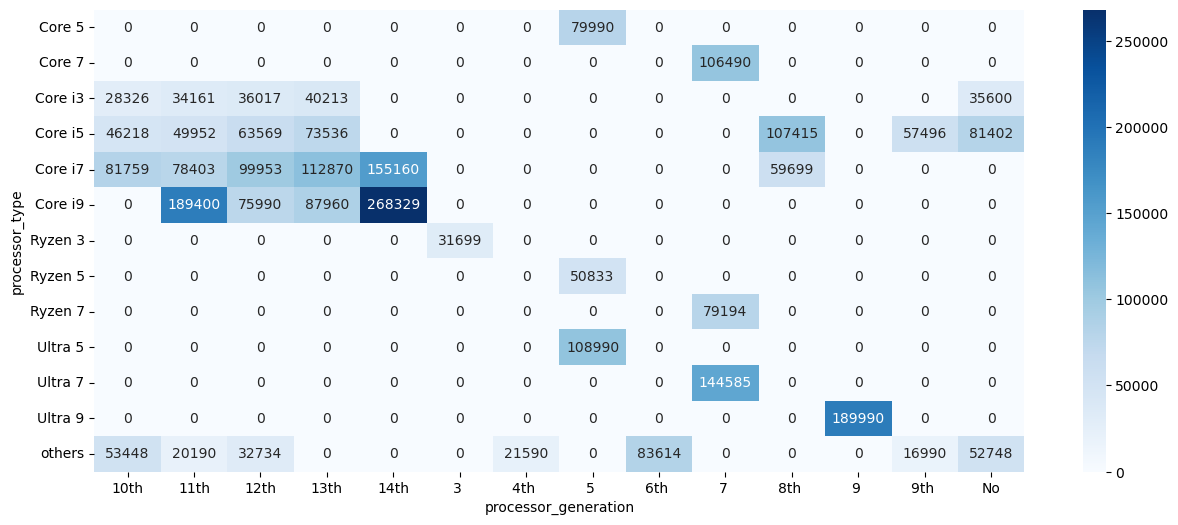

In [325]:
plt.figure(figsize=[15,6])

sns.heatmap(pd.crosstab(df['processor_type'], df['processor_generation'],values=df['price'], aggfunc='mean' ).fillna(0)
           , cmap='Blues', annot=True, fmt= '.0f' ,)

**insights :**
1. There is a positive relation between processor type and processor generation
2. Average price is being doubled by processor_type with processor generation
3. 10th gen with processor_type , is being doubled
4. Only 12th, 13th gen has slight decrease in average price of corei9 processor_type
5. Ultra type processors have average price > 1lakh
6. Even these Ultra type has increase in price, when the processor type changes
7. Ryzen processors are also increasing average price accroding to the capacity of processor


### process_type - processor_category - price

In [326]:
df.groupby(['processor_type','processor_category'])['price'].mean().unstack()

processor_category    all rounder  entry level computing  \
processor_type                                             
Core 5                        NaN                    NaN   
Core 7                        NaN                    NaN   
Core i3                       NaN           35601.666667   
Core i5                       NaN                    NaN   
Core i7                       NaN                    NaN   
Core i9                       NaN                    NaN   
Ryzen 3                       NaN                    NaN   
Ryzen 5                       NaN           32990.000000   
Ryzen 7                       NaN                    NaN   
Ultra 5                       NaN                    NaN   
Ultra 7                       NaN                    NaN   
Ultra 9                       NaN                    NaN   
others              144231.666667           21936.974359   

processor_category  extremely power efficient  high performance  \
processor_type                                                    
Core 5                                    NaN               NaN   
Core 7                                    NaN               NaN   
Core i3                                   NaN               NaN   
Core i5                                   NaN      68839.295082   
Core i7                              188990.0     113700.540541   
Core i9                                   NaN     166782.250000   
Ryzen 3                                   NaN      30644.750000   
Ryzen 5                                   NaN      54164.952381   
Ryzen 7                                   NaN      80890.000000   
Ultra 5                                   NaN     108990.000000   
Ultra 7                                   NaN     145615.000000   
Ultra 9                                   NaN     189990.000000   
others                                    NaN      32966.666667   

processor_category  integrated graphics  optimized performance  \
processor_type                                                   
Core 5                              NaN                    NaN   
Core 7                              NaN                    NaN   
Core i3                    34123.560000                    NaN   
Core i5                    50780.431373           79499.111111   
Core i7                    76818.250000          124939.875000   
Core i9                             NaN                    NaN   
Ryzen 3                             NaN                    NaN   
Ryzen 5                             NaN                    NaN   
Ryzen 7                             NaN                    NaN   
Ultra 5                             NaN                    NaN   
Ultra 7                             NaN                    NaN   
Ultra 9                             NaN                    NaN   
others                     40917.714286                    NaN   

processor_category  power efficient  thin gaming\creator  
processor_type                                            
Core 5                 79990.000000                  NaN  
Core 7                106490.000000                  NaN  
Core i3                36952.659574                  NaN  
Core i5                60235.833333                  NaN  
Core i7                90047.423077                  NaN  
Core i9                         NaN                  NaN  
Ryzen 3                31890.181818                  NaN  
Ryzen 5                47865.000000         59919.857143  
Ryzen 7                66187.000000         86949.142857  
Ultra 5                         NaN                  NaN  
Ultra 7               136342.000000                  NaN  
Ultra 9                         NaN                  NaN  
others                 37213.750000                  NaN

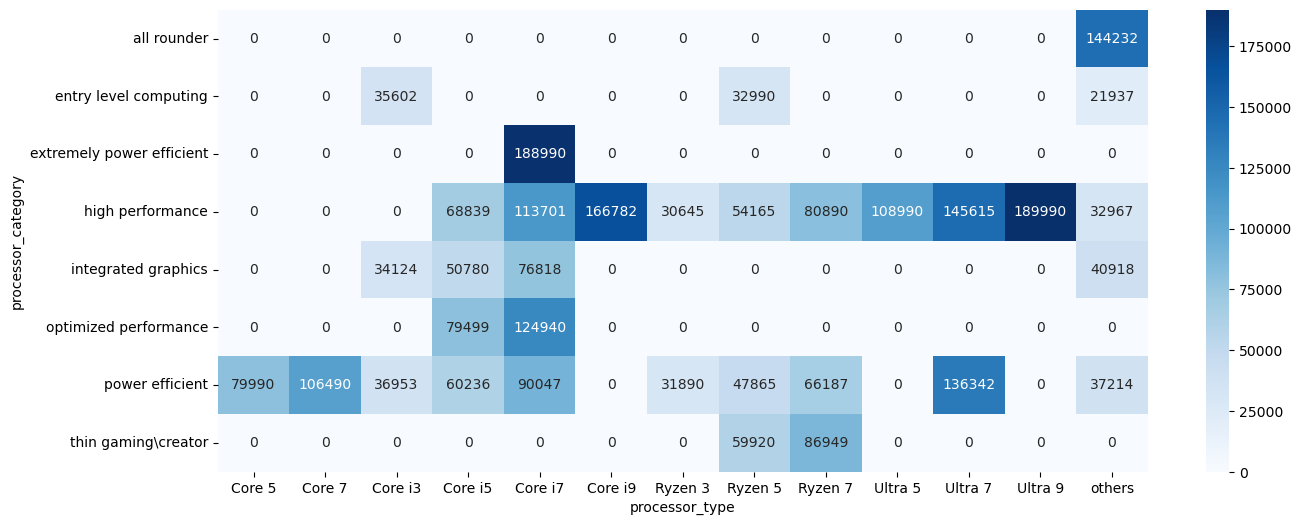

In [327]:
plt.figure(figsize=[15,6])
sns.heatmap(df.groupby(['processor_category','processor_type'])['price'].mean().unstack().fillna(0)
           ,annot=True, fmt='.0f', cmap='Blues')
plt.xticks(rotation=0)
plt.show()

**insights :**
1. core 5, core 7 processors have power efficient chips
2. corei3 has chips for entry level computing, integrated graphics and power efficient
3. From corei5 to Others all processor_types have high performance laptops
4. Even power efficient chip is avialable in max processor_types
5. According to the processor chip performance, the average prices are increasing

### price - brand - processor_category - processor_series - price_range

In [328]:
df.pivot_table(values='price', index=['brand', 'processor_category'], columns= ['processor_series', 'price_range'] )
                              

processor_series                      1005G1   10110U   10210U   10300H  \
price_range                              low      low     high   medium   
brand     processor_category                                              
ACER      entry level computing          NaN      NaN      NaN      NaN   
          high performance               NaN      NaN      NaN      NaN   
          integrated graphics            NaN      NaN      NaN      NaN   
          optimized performance          NaN      NaN      NaN      NaN   
          power efficient                NaN      NaN      NaN      NaN   
          thin gaming\creator            NaN      NaN      NaN      NaN   
APPLE     all rounder                    NaN      NaN      NaN      NaN   
          integrated graphics            NaN      NaN      NaN      NaN   
ASUS      entry level computing          NaN      NaN      NaN      NaN   
          high performance               NaN      NaN      NaN  53033.0   
          integrated graphics        28990.0      NaN      NaN      NaN   
          optimized performance          NaN      NaN      NaN      NaN   
          power efficient                NaN      NaN  69911.0      NaN   
          thin gaming\creator            NaN      NaN      NaN      NaN   
AVITA     entry level computing          NaN      NaN      NaN      NaN   
          power efficient                NaN  19990.0      NaN      NaN   
AXL       high performance               NaN      NaN      NaN      NaN   
          integrated graphics            NaN      NaN      NaN      NaN   
CHUWI     entry level computing          NaN      NaN      NaN      NaN   
COLORFUL  high performance               NaN      NaN      NaN      NaN   
DELL      high performance               NaN      NaN      NaN      NaN   
          integrated graphics            NaN      NaN      NaN      NaN   
          optimized performance          NaN      NaN      NaN      NaN   
          power efficient                NaN      NaN      NaN      NaN   
GIGABYTE  high performance               NaN      NaN      NaN      NaN   
HP        entry level computing          NaN      NaN      NaN      NaN   
          extremely power efficient      NaN      NaN      NaN      NaN   
          high performance               NaN      NaN      NaN      NaN   
          integrated graphics        31999.0      NaN      NaN      NaN   
          optimized performance          NaN      NaN      NaN      NaN   
          power efficient                NaN      NaN      NaN      NaN   
          thin gaming\creator            NaN      NaN      NaN      NaN   
INFINIX   entry level computing          NaN      NaN      NaN      NaN   
          high performance               NaN      NaN      NaN      NaN   
          integrated graphics        28740.0      NaN      NaN      NaN   
          power efficient                NaN      NaN      NaN      NaN   
LENOVO    entry level computing          NaN      NaN      NaN      NaN   
          high performance               NaN      NaN      NaN      NaN   
          integrated graphics            NaN      NaN      NaN      NaN   
          optimized performance          NaN      NaN      NaN      NaN   
          power efficient                NaN      NaN      NaN      NaN   
          thin gaming\creator            NaN      NaN      NaN      NaN   
LG        optimized performance          NaN      NaN      NaN      NaN   
MICROSOFT power efficient                NaN      NaN      NaN      NaN   
MSI       high performance               NaN      NaN      NaN      NaN   
          integrated graphics            NaN      NaN      NaN      NaN   
          optimized performance          NaN      NaN      NaN      NaN   
          power efficient                NaN      NaN      NaN      NaN   
          thin gaming\creator            NaN      NaN      NaN      NaN   
PRIMEBOOK entry level computing          NaN      NaN      NaN      NaN   
SAMSUNG   high performanc

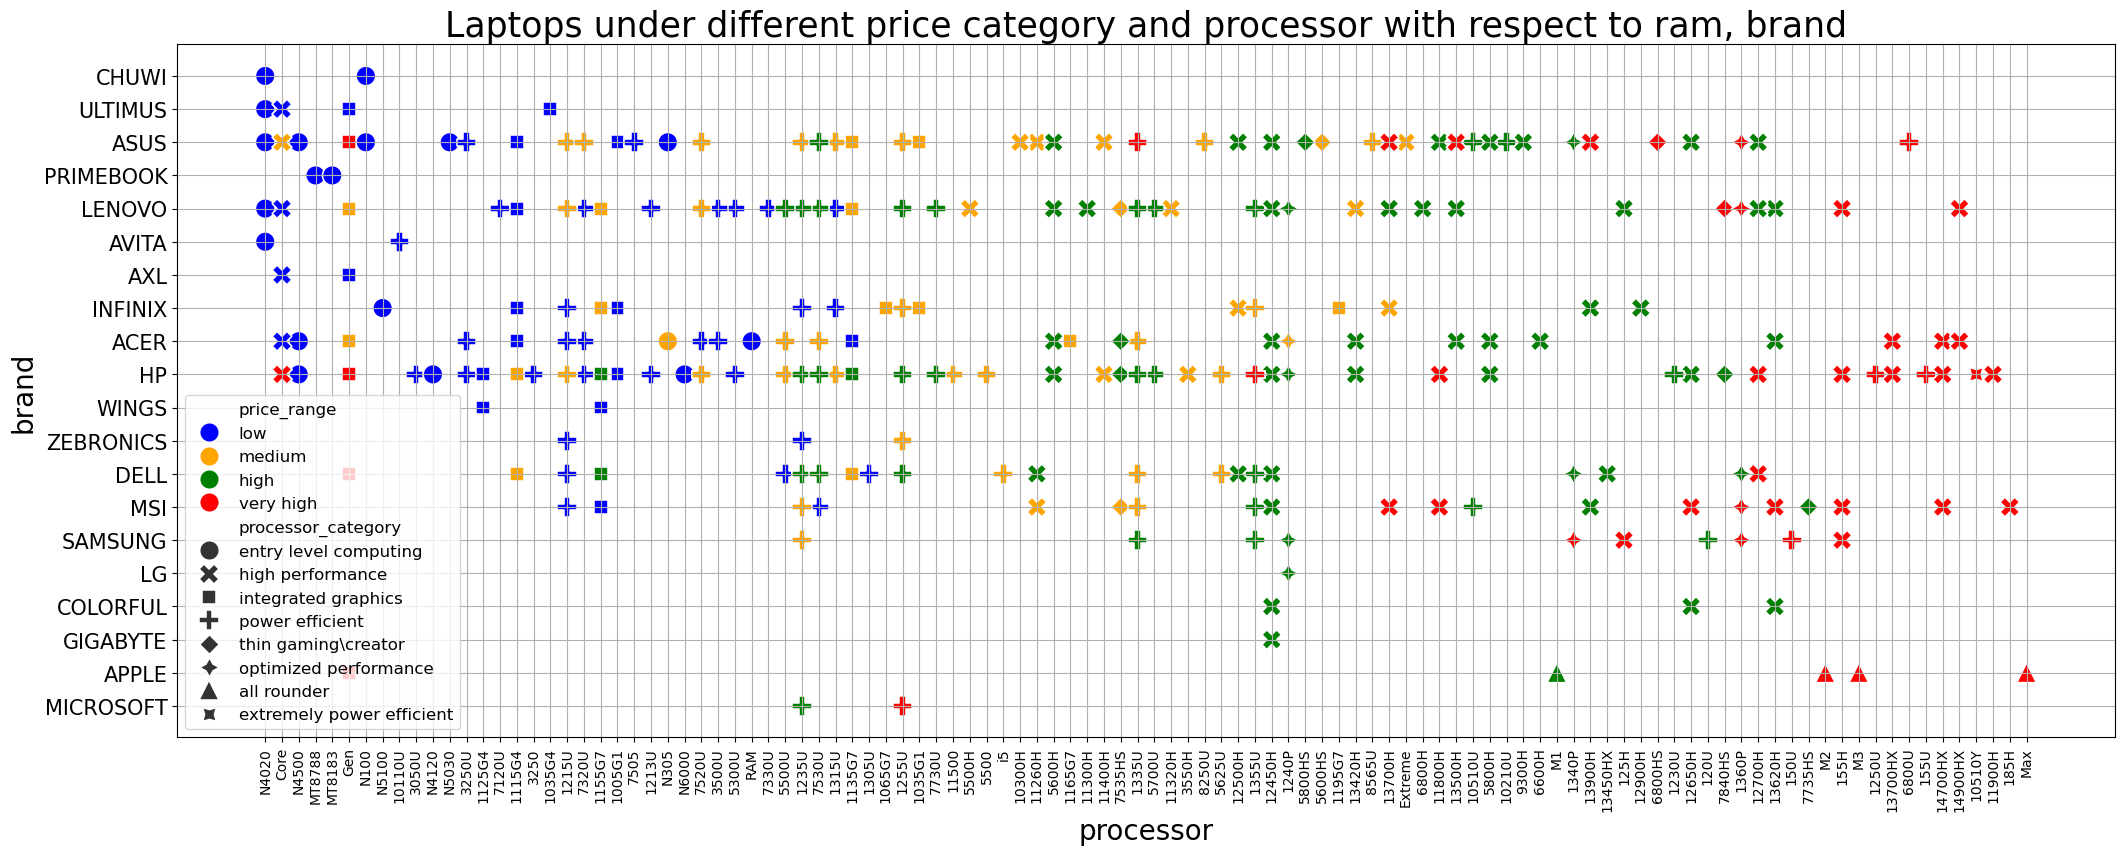

In [329]:
plt.figure(figsize=[25,9])
sns.scatterplot(data=df,y='brand',x='processor_series',hue='price_range',style='processor_category',
               palette=['blue','orange','green','red'], s=200)

plt.grid()
plt.xticks(rotation=90,size=10)
plt.yticks(size=15)
plt.xlabel(xlabel='processor',size=20)
plt.ylabel(ylabel='brand',size=20)
plt.title('Laptops under different price category and processor with respect to ram, brand',size=25)
plt.legend(fontsize=12,loc='lower left')

plt.show()

**insights :**
1. Low price_range laptops have processors for **entry level computing, high performance, power efficient**
   - More power efficient laptops are available in this range
   - There are entry level computing chips in the next place
   - Only few laptops are integrated graphics chips

2. Medium price_range laptops have **power efficient, high performance and integrated graphics**
   - More power efficient laptops are available in this range
   - Only few laptops have high performance and integrated graphics

4. High price_range laptops have **High performance, power efficient, thin gaming/creator and optimized performance chips**
   - More laptops have High performance
   - Next comes the power efficient laptops
   - Only few laptops have thin gaming/creator and optimized performance chips

5. Very high range laptops have **High performance, power efficient, optimized performance, extremely power efficient and all rounder chips**
   - More high performance are in this range
   - Only few laptops are with power efficient, optimized performance, extremely power efficient and all rounder chips

### ram_version - ram - price 

In [330]:
df.groupby(['ram_version','ram'])['price'].mean().unstack()

ram                    4             8              16             32
ram_version                                                          
DDR3                  NaN  94913.666667  188990.000000            NaN
DDR4         20482.227273  43988.619048   67983.057377  257460.000000
DDR4X        20922.200000  36716.050000   69418.931034  152990.000000
DDR5                  NaN  43980.555556   99031.792683  220463.444444
DDR5X                 NaN           NaN  104130.000000  136990.000000

<Axes: xlabel='ram', ylabel='ram_version'>

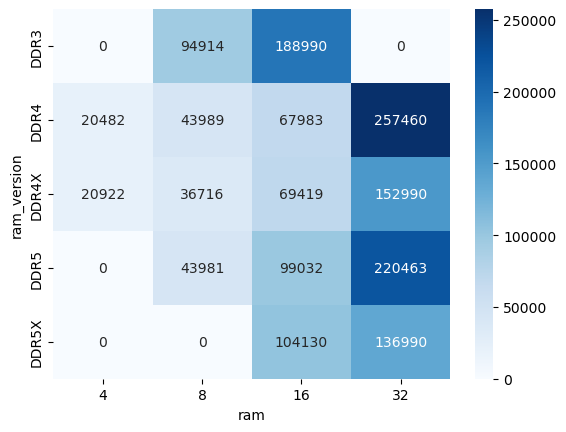

In [331]:
sns.heatmap(df.groupby(['ram_version','ram'])['price'].mean().unstack().fillna(0)
           , annot=True, fmt='.0f', cmap='Blues',)

Text(0.5, 1.0, 'Min, Mean, Max prices of laptops with respect to Ram and Ram-version')

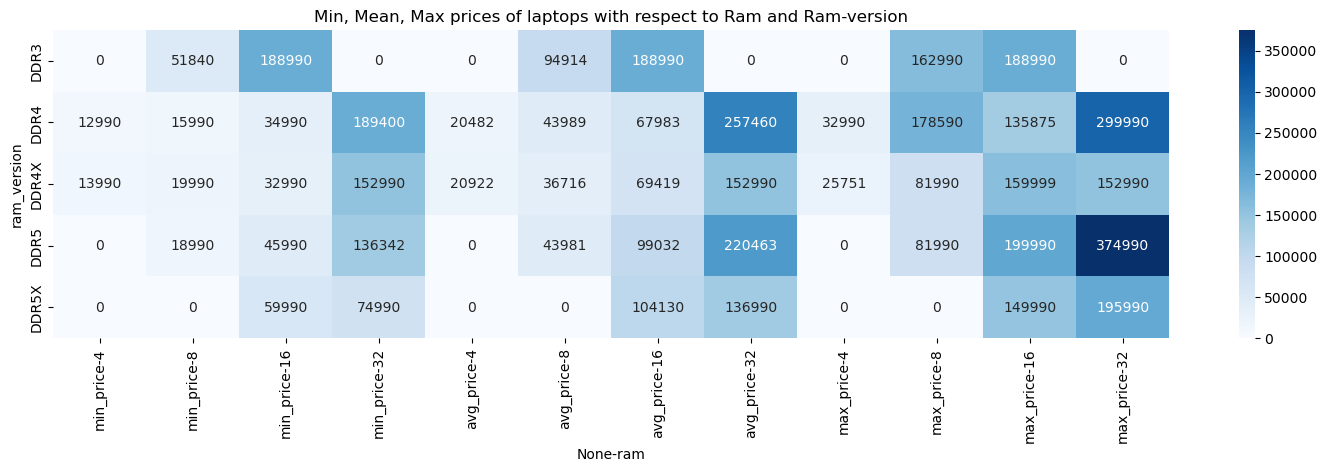

In [366]:
plt.figure(figsize=[18,4])

sns.heatmap(df.groupby(['ram_version','ram']).agg(
    
    min_price = ('price','min'),
    avg_price = ('price','mean'),
    max_price = ('price','max') 
    
).unstack().fillna(0), cmap='Blues', annot = True, fmt='.0f')

plt.title('Min, Mean, Max prices of laptops with respect to Ram and Ram-version')

**insights :**
1. 4GB RAM is present in DDR4, DDR4X versions laptops are with
   - min price 12k-14k , mean price 20k, max price 25k-32k
2. 8GB RAM is present in DDR3, DDR4, DDR4X, DDR5
   - DDR3 is the oldest version, only few laptops are available and has prices 51k, 94k, 162k
   - DDR4, DDR4X, DDR5 has min price 15k, 20k, 19k according to the ram-versions
   - DDR4, DDR4X, DDR5 has meann price 43k, 36k, 43k according to the ram-versions
   - DDR4, DDR4X, DDR5 has max price 178k, 81k, 81k according to the ram-versions
3. 16GB RAM has all versions DDR3, DDR4, DDR4X, DDR5, DDR5X
   - min price - 189k, 34k, 32k, 45k, 60k
   - mean price - 189k, 67k, 69k, 99k, 104k
   - max price - 189k, 135k, 160k, 200k, 150k
4. 32GB RAM has DDR4, DRR4X, DDR5, DDR5X
   - min price - 189k, 152k, 136k, 75k
   - mean price - 257k, 152k, 220k, 136k
   - max price - 299k, 152k, 374k, 195k

In [333]:
df.groupby(['ram','memory'])['price'].mean().unstack()

memory          64       128            256           512            1000
ram                                                                      
4       19655.857143  16727.5   21190.000000  31999.000000   27430.000000
8                NaN  19986.0   37116.911111  44351.840708   60587.294118
16               NaN      NaN  131490.000000  72985.950276  101140.928571
32               NaN      NaN            NaN           NaN  203382.411765

<Axes: xlabel='memory', ylabel='ram'>

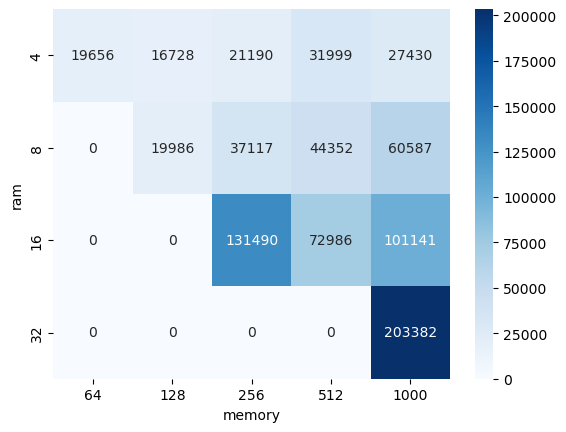

In [334]:
sns.heatmap(df.groupby(['ram','memory'])['price'].mean().unstack().fillna(0)
           , annot=True, cmap = 'Blues', fmt='.0f')

In [335]:
df.groupby(['ram','memory']).agg(
    
    min_price = ('price','min'),
    avg_price = ('price','mean'),
    max_price = ('price','max') 
    
).unstack()

min_price                                         avg_price           \
memory      64       128      256      512      1000          64       128    
ram                                                                           
4        13990.0  12990.0  16990.0  31999.0  21800.0  19655.857143  16727.5   
8            NaN  19982.0  15990.0  22990.0  36990.0           NaN  19986.0   
16           NaN      NaN  99990.0  32990.0  41299.0           NaN      NaN   
32           NaN      NaN      NaN      NaN  74990.0           NaN      NaN   

                                                   max_price           \
memory           256           512            1000      64       128    
ram                                                                     
4        21190.000000  31999.000000   27430.000000   25900.0  22990.0   
8        37116.911111  44351.840708   60587.294118       NaN  19990.0   
16      131490.000000  72985.950276  101140.928571       NaN      NaN   
32                NaN           NaN  203382.411765       NaN      NaN   

                                      
memory      256       512       1000  
ram                                   
4        32990.0   31999.0   31500.0  
8       126890.0  162990.0  178590.0  
16      162990.0  199990.0  186990.0  
32           NaN       NaN  374990.0

<Axes: xlabel='None-memory', ylabel='ram'>

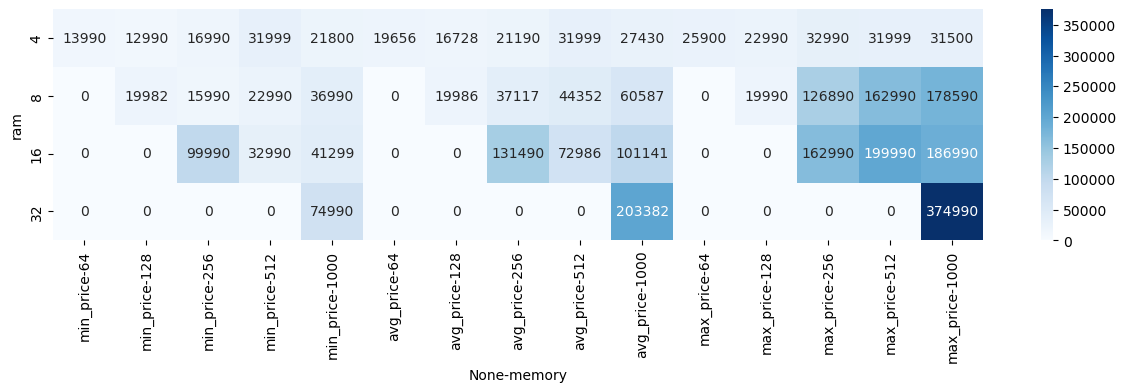

In [336]:
plt.figure(figsize=[15,3])

sns.heatmap(df.groupby(['ram','memory']).agg(
    
    min_price = ('price','min'),
    avg_price = ('price','mean'),
    max_price = ('price','max') 
    
).unstack().fillna(0), cmap='Blues', annot=True, fmt='.0f' )



**insights :**
1. The _PRICE_ are **increasing** as the *RAM & MEMORY* **increases**
2. 32GB has only 1000GB MEMORY, it has a min price of 75k but the max price is 375k
3. 16GB RAM with 256, 512, 1000GB MEMORY has price 32k-200k
4. 8GB RAM with 128, 256, 512, 1000GB MEMORY has price 20k-178k
5. 4GB RAM with 64, 128, 256, 512, 1000GB MEMORY has price 13k-32k


### ram - price - processor_series

In [337]:
df.pivot_table(index='ram', values='price',columns='processor_series')

processor_series   1005G1   10110U   10210U   10300H   1035G1   1035G4  \
ram                                                                      
4                 30494.5  19990.0      NaN      NaN      NaN      NaN   
8                 28740.0      NaN  69911.0  50550.0  41990.0  26990.0   
16                    NaN      NaN      NaN  57999.0      NaN      NaN   
32                    NaN      NaN      NaN      NaN      NaN      NaN   

processor_series   10510U    10510Y   1065G7   1115G4  ...          N100  \
ram                                                    ...                 
4                     NaN       NaN      NaN  32990.0  ...  18590.000000   
8                 70279.0       NaN  39990.0  34723.0  ...  20323.333333   
16                66047.0  188990.0  43490.0  38990.0  ...           NaN   
32                    NaN       NaN      NaN      NaN  ...           NaN   

processor_series          N305      N4020    N4120         N4500    N5030  \
ram                                                                         
4                          NaN  16788.000  20990.0  21880.333333  21800.0   
8                 35601.666667  24172.375      NaN  24615.250000      NaN   
16                         NaN        NaN      NaN           NaN      NaN   
32                         NaN        NaN      NaN           NaN      NaN   

processor_series         N5100    N6000      RAM       i5  
ram                                                        
4                 21623.333333      NaN      NaN      NaN  
8                 23990.000000  31490.0  32990.0  48689.5  
16                         NaN      NaN      NaN  52200.0  
32                         NaN      NaN      NaN      NaN  

[4 rows x 106 columns]

In [338]:
df[['price','processor_series','ram']].transpose()

0      1      2      3       4       5      6      7    \
price             12990  12990  12990  13990   13990   13990  15980  15990   
processor_series  N4020  N4020   Core  N4500  MT8788  MT8183  N4020   Core   
ram                   4      4      4      4       4       4      4      8   

                    8      9    ...     563     564     565     566     567  \
price             15990  16990  ...  189990  195990  199990  199990  237890   
processor_series  N4020   Core  ...    185H    155H    155H  13500H  12700H   
ram                   4      4  ...      32      32      32      16      32   

                      568     569     570     571      572  
price              249999  261990  282990  299990   374990  
processor_series  14900HX   1255U     Max     Max  14900HX  
ram                    32      32      32      32       32  

[3 rows x 573 columns]

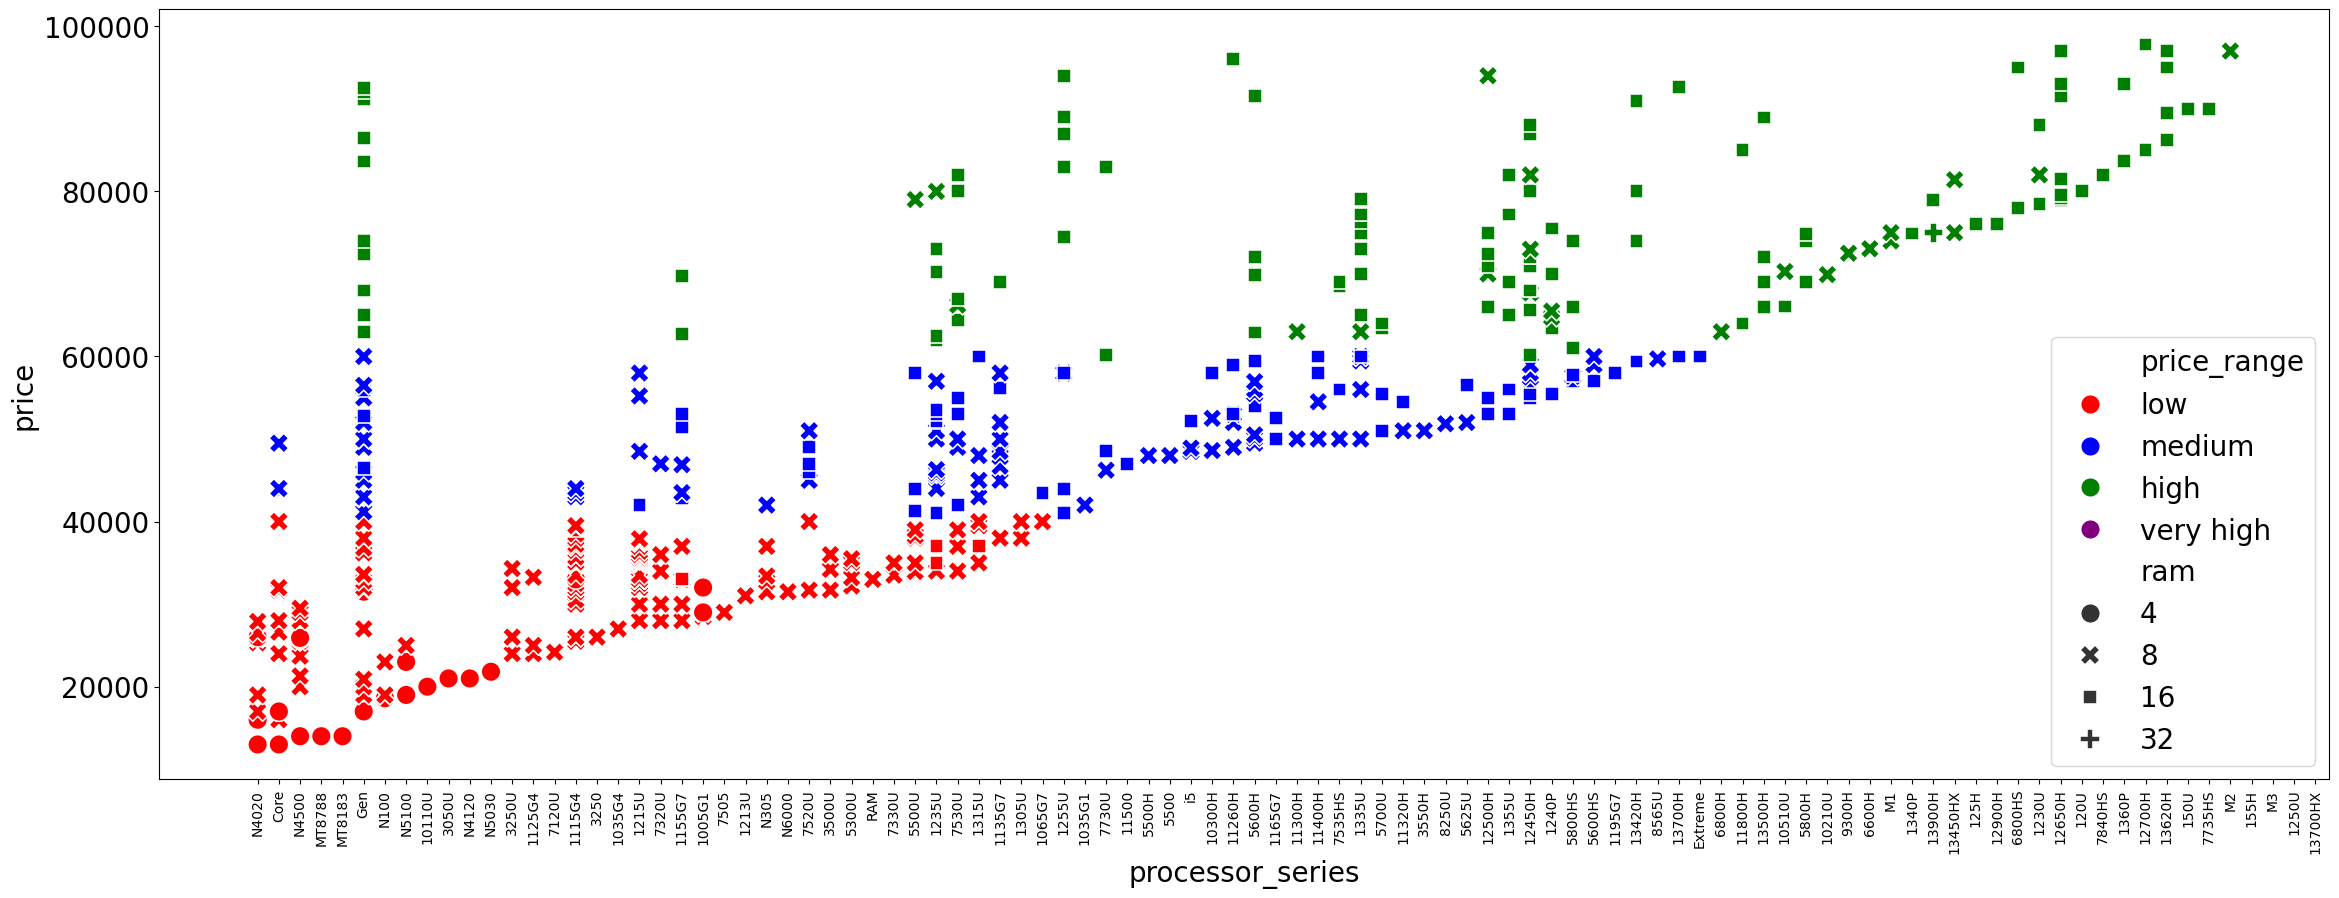

In [339]:
plt.figure(figsize=[28,10])
sns.scatterplot(data=df,x=df['processor_series'],y=df['price'][:500],hue='price_range',style='ram',
                palette=['red','blue','green','purple'],s=200)

plt.xticks(rotation='vertical')
plt.xlabel('processor_series',size=20)
plt.yticks(size=20)
plt.ylabel('price',size=20)

plt.legend(fontsize=20)
plt.show()

**insights :**
1. N-sereis, U-series and G-series processors are more in low price range
2. N-sereis, U-series, G-series and H-series are available in medium price range
3. U, G, H, HS, P are available in high price range
4. 8GB RAMs are more in all laptops
5. 8GB & 16GB RAM more in medium and high price range
6. As the time increases many laptop brands are using atleast 8GB RAM

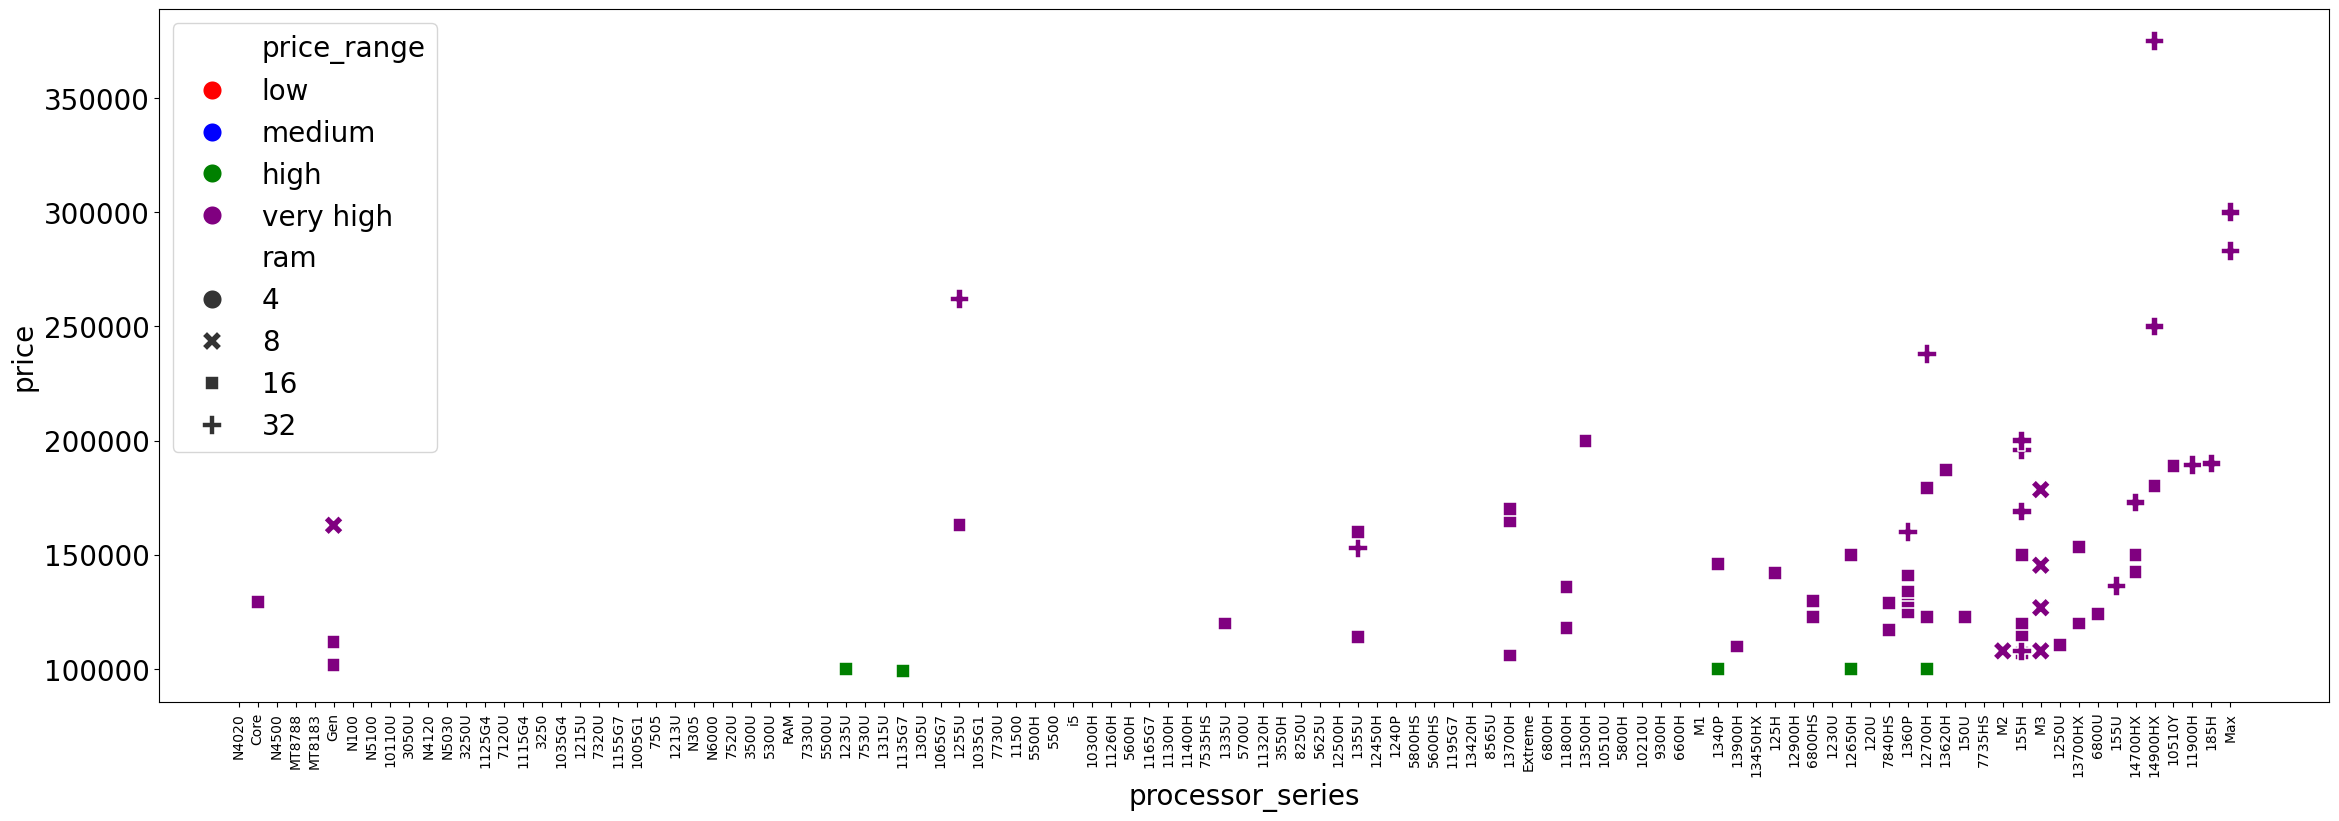

In [340]:
plt.figure(figsize=[28,9])
sns.scatterplot(data=df,x=df['processor_series'],y=df['price'][500:],hue='price_range',style='ram',
                palette=['red','blue','green','purple'],s=200)

plt.xticks(rotation='vertical')
plt.xlabel('processor_series',size=20)
plt.yticks(size=20)
plt.ylabel('price',size=20)

plt.legend(fontsize=20)
plt.show()

**insights :**
1. Laptops prices above 1 lakh(very high price range) has 16GB & 32GB RAM 
2. Max laptops are with high end processors

### brand-price-ram-memory

In [341]:
df.pivot_table(index='brand', columns=['memory','ram'], values= ['price'] )

price                                                \
memory             64            128               256                  
ram                  4             4        8        4             8    
brand                                                                   
ACER                NaN           NaN  19982.0      NaN  26256.666667   
APPLE               NaN           NaN      NaN      NaN  96170.000000   
ASUS       19870.500000           NaN  19990.0  22290.0  35918.666667   
AVITA               NaN  15990.000000      NaN  19990.0           NaN   
AXL                 NaN           NaN      NaN  16990.0           NaN   
CHUWI               NaN  12990.000000      NaN      NaN  19390.000000   
COLORFUL            NaN           NaN      NaN      NaN           NaN   
DELL                NaN           NaN      NaN      NaN  34240.000000   
GIGABYTE            NaN           NaN      NaN      NaN           NaN   
HP         22626.666667           NaN      NaN  20990.0  31980.000000   
INFINIX             NaN  21623.333333      NaN      NaN  26365.000000   
LENOVO     15980.000000           NaN      NaN  32990.0  26613.250000   
LG                  NaN           NaN      NaN      NaN           NaN   
MICROSOFT           NaN           NaN      NaN      NaN  79990.000000   
MSI                 NaN           NaN      NaN      NaN           NaN   
PRIMEBOOK  13990.000000  13990.000000      NaN      NaN           NaN   
SAMSUNG             NaN           NaN      NaN      NaN  56990.000000   
ULTIMUS             NaN  12990.000000      NaN      NaN  15990.000000   
WINGS               NaN           NaN      NaN      NaN  23990.000000   
ZEBRONICS           NaN           NaN      NaN      NaN           NaN   

                                                                     \
memory                  512                                    1000   
ram              16       4              8              16       4    
brand                                                                 
ACER            NaN      NaN   35932.500000   63685.076923      NaN   
APPLE           NaN      NaN  130270.000000            NaN      NaN   
ASUS            NaN      NaN   46128.136364   72517.454545  27430.0   
AVITA           NaN      NaN            NaN            NaN      NaN   
AXL             NaN      NaN            NaN            NaN      NaN   
CHUWI           NaN      NaN            NaN            NaN      NaN   
COLORFUL        NaN      NaN            NaN   78490.500000      NaN   
DELL            NaN      NaN   45831.214286   75033.500000      NaN   
GIGABYTE        NaN      NaN            NaN   71990.000000      NaN   
HP              NaN  31999.0   42692.217391   82180.750000      NaN   
INFINIX         NaN      NaN   32292.100000   46454.285714      NaN   
LENOVO          NaN      NaN   40893.189189   69932.514286      NaN   
LG              NaN      NaN   64762.000000            NaN      NaN   
MICROSOFT  131490.0      NaN            NaN            NaN      NaN   
MSI             NaN      NaN   46990.000000   70283.857143      NaN   
PRIMEBOOK       NaN      NaN            NaN            NaN      NaN   
SAMSUNG         NaN      NaN   62990.000000  102808.181818      NaN   
ULTIMUS         NaN      NaN   26990.000000            NaN      NaN   
WINGS           NaN      NaN   27656.666667            NaN      NaN   
ZEBRONICS       NaN      NaN   30990.000000   37990.000000      NaN   

                                                   
memory                                             
ram                   8              16        32  
brand                                              
ACER        53676.000000  109464.166667  249999.0  
APPLE      178590.000000            NaN  291490.0  
ASUS        59819.500000  101197.100000       NaN  
AVITA                NaN            NaN       NaN  
AXL                  NaN            NaN       NaN  
CHUWI                NaN            NaN       NaN  
COLORFUL             NaN            NaN 

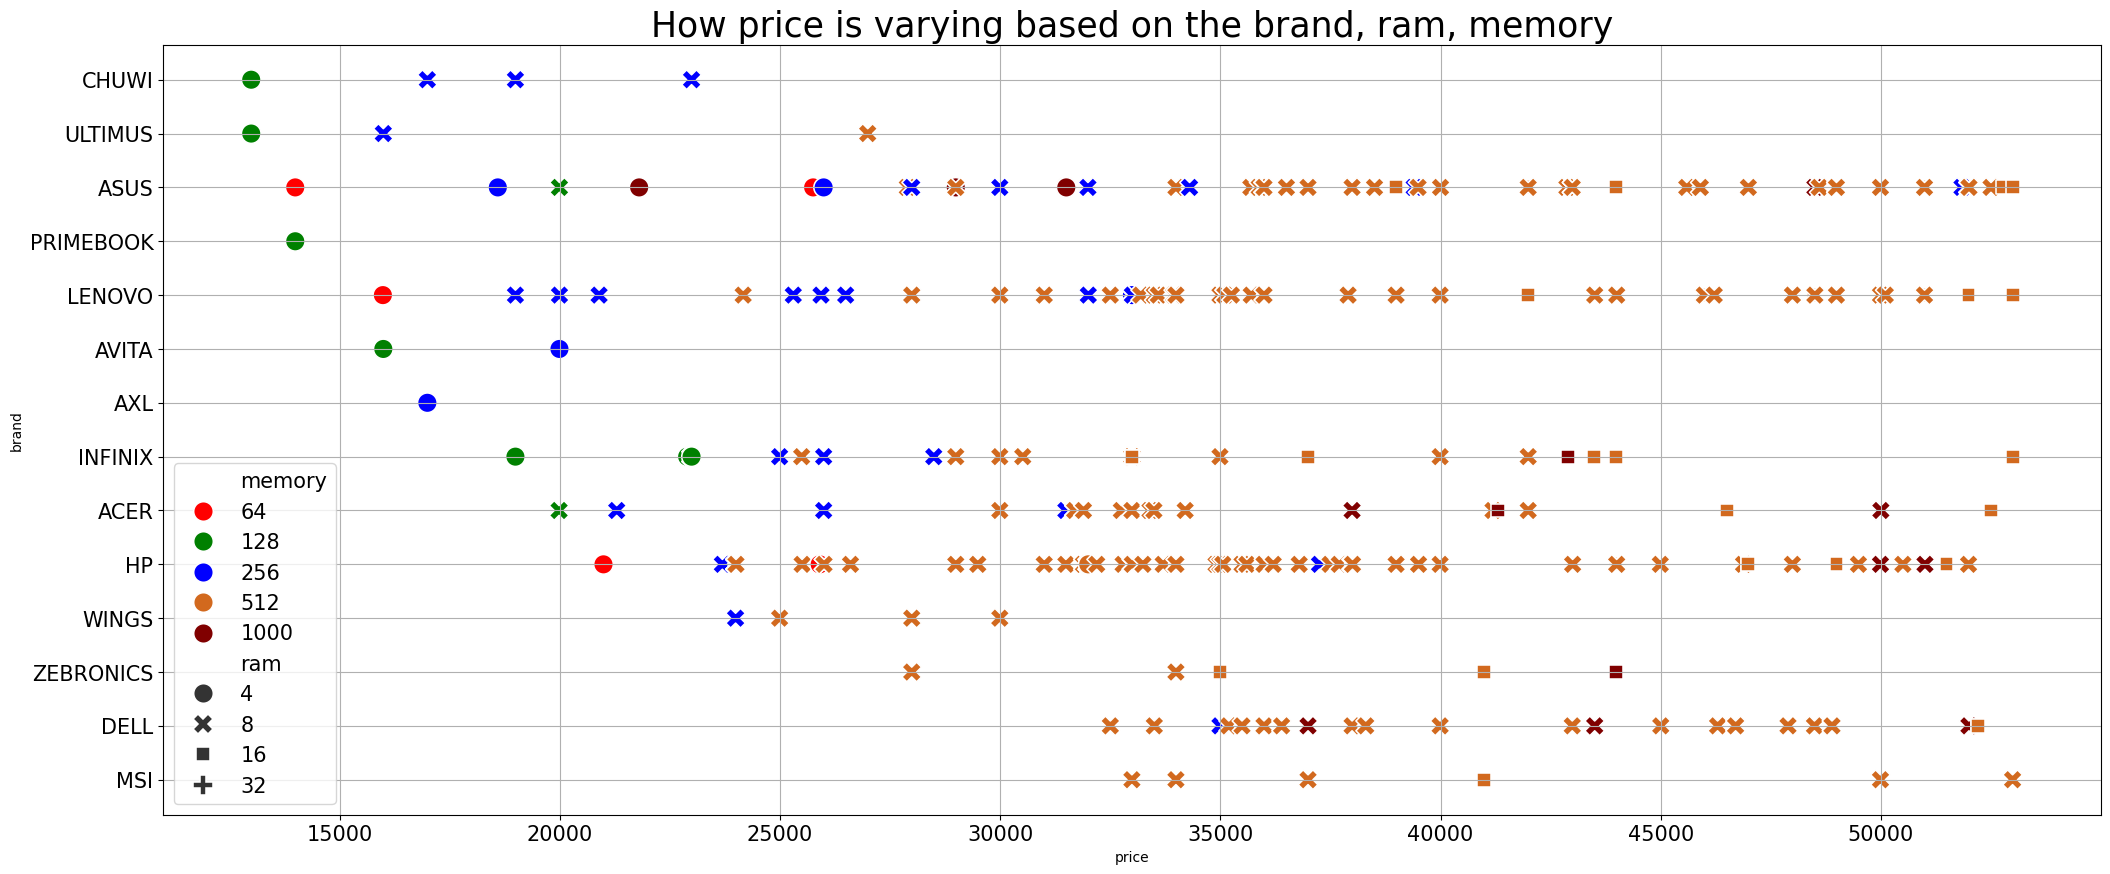

In [342]:
plt.figure(figsize=[25,10])
sns.scatterplot(data=df,y='brand',x=df['price'][:300:], hue='memory',style='ram',
                palette=['red','green','blue','chocolate','maroon'],s=200)
plt.grid()
plt.xticks(rotation=0,size=15)

plt.yticks(size=15)
plt.legend(fontsize=15)
plt.title('How price is varying based on the brand, ram, memory',size=25)
plt.show()

**insights :**
1. Laptops with price below 30k are providing ( 8GB-RAM, 256GB-MEMORY )
2. Laptops Above 30k have more ( 8GB-RAM, 512GB-MEMORY )
3. As the Price increases RAM-MEMORY capacities are increasing

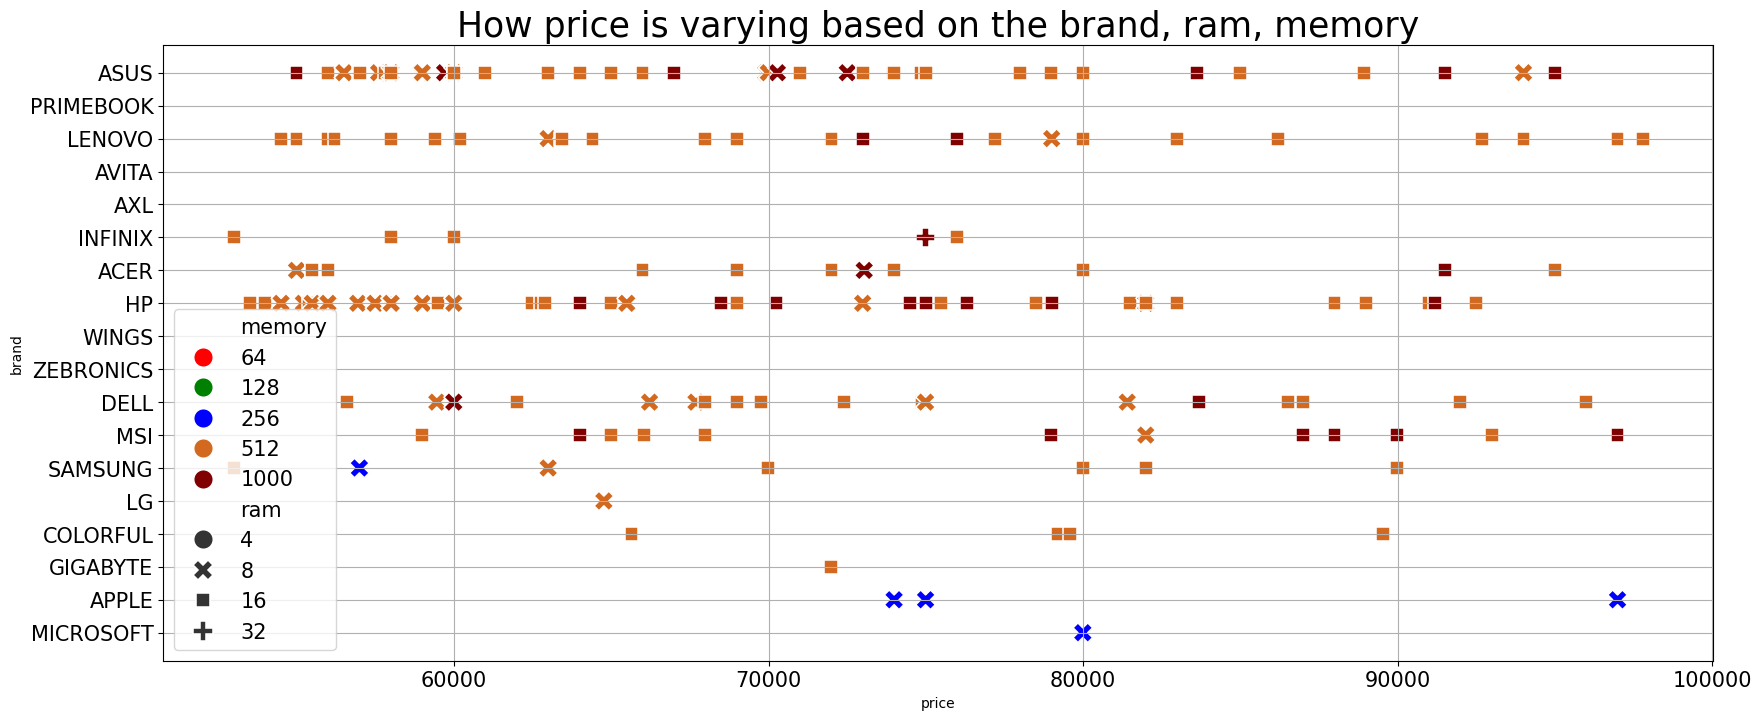

In [343]:
plt.figure(figsize=[20,8])
sns.scatterplot(data=df,y='brand',x=df['price'][300:500:], hue='memory',style='ram',
                palette=['red','green','blue','chocolate','maroon'],s=200)


plt.grid()
plt.xticks(rotation=0,size=15)

plt.yticks(size=15)
plt.legend(fontsize=15)
plt.title('How price is varying based on the brand, ram, memory',size=25)
plt.show()

**insights :**
- Many laptops have 16GB RAM & 512GB MEMORY


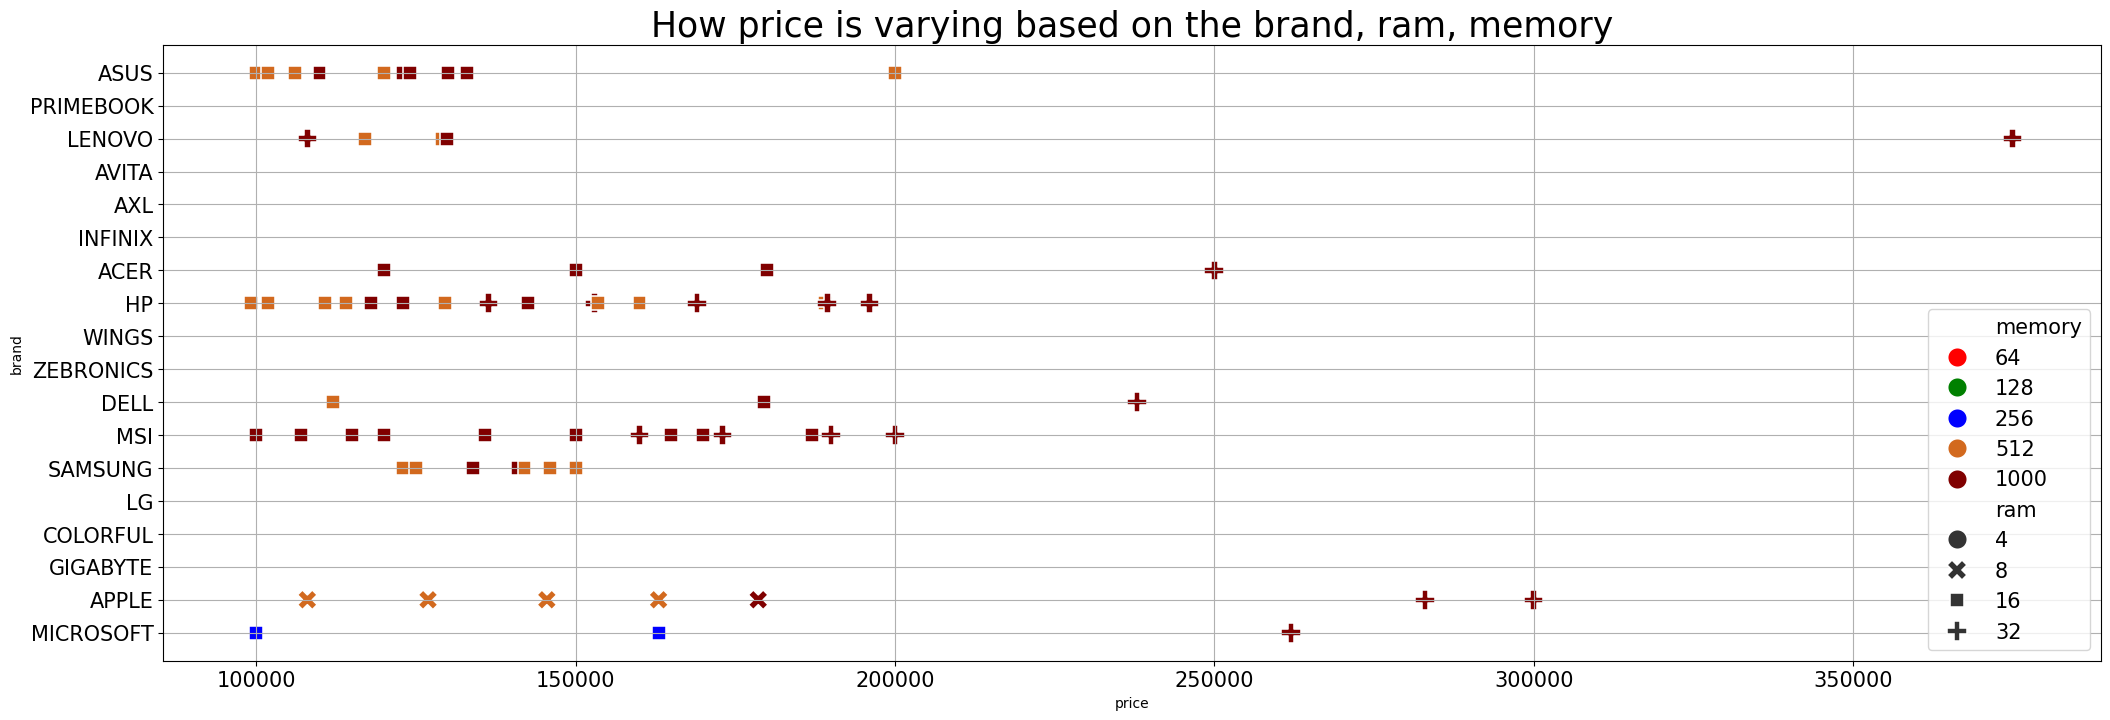

In [344]:
plt.figure(figsize=[25,8])
sns.scatterplot(data=df,y='brand',x=df['price'][500::], hue='memory',style='ram',
                palette=['red','green','blue','chocolate','maroon'],s=200)
plt.grid()
plt.xticks(rotation=0,size=15)

plt.yticks(size=15)
plt.legend(fontsize=15)
plt.title('How price is varying based on the brand, ram, memory',size=25)
plt.show()

**insights :**
- Prices Above 1lakh have 16 RAM 512GB MEMORY & 32GB RAM & 1000GB MEMORY
- Prices increases, the RAM & MEMORY capacity increases


In [345]:
df.pivot_table(index=['brand','ram'], columns=['processor_series', 'price_range'], values= ['price'] )

price                                               \
processor_series   1005G1   10110U   10210U   10300H   1035G1   1035G4   
price_range           low      low     high   medium   medium      low   
brand     ram                                                            
ACER      8           NaN      NaN      NaN      NaN      NaN      NaN   
          16          NaN      NaN      NaN      NaN      NaN      NaN   
          32          NaN      NaN      NaN      NaN      NaN      NaN   
APPLE     8           NaN      NaN      NaN      NaN      NaN      NaN   
          32          NaN      NaN      NaN      NaN      NaN      NaN   
ASUS      4       28990.0      NaN      NaN      NaN      NaN      NaN   
          8           NaN      NaN  69911.0  50550.0  41990.0      NaN   
          16          NaN      NaN      NaN  57999.0      NaN      NaN   
AVITA     4           NaN  19990.0      NaN      NaN      NaN      NaN   
AXL       4           NaN      NaN      NaN      NaN      NaN      NaN   
CHUWI     4           NaN      NaN      NaN      NaN      NaN      NaN   
          8           NaN      NaN      NaN      NaN      NaN      NaN   
COLORFUL  16          NaN      NaN      NaN      NaN      NaN      NaN   
DELL      8           NaN      NaN      NaN      NaN      NaN      NaN   
          16          NaN      NaN      NaN      NaN      NaN      NaN   
          32          NaN      NaN      NaN      NaN      NaN      NaN   
GIGABYTE  16          NaN      NaN      NaN      NaN      NaN      NaN   
HP        4       31999.0      NaN      NaN      NaN      NaN      NaN   
          8           NaN      NaN      NaN      NaN      NaN      NaN   
          16          NaN      NaN      NaN      NaN      NaN      NaN   
          32          NaN      NaN      NaN      NaN      NaN      NaN   
INFINIX   4           NaN      NaN      NaN      NaN      NaN      NaN   
          8       28740.0      NaN      NaN      NaN  41990.0      NaN   
          16          NaN      NaN      NaN      NaN      NaN      NaN   
          32          NaN      NaN      NaN      NaN      NaN      NaN   
LENOVO    4           NaN      NaN      NaN      NaN      NaN      NaN   
          8           NaN      NaN      NaN      NaN      NaN      NaN   
          16          NaN      NaN      NaN      NaN      NaN      NaN   
          32          NaN      NaN      NaN      NaN      NaN      NaN   
LG        8           NaN      NaN      NaN      NaN      NaN      NaN   
MICROSOFT 8           NaN      NaN      NaN      NaN      NaN      NaN   
          16          NaN      NaN      NaN      NaN      NaN      NaN   
          32          NaN      NaN      NaN      NaN      NaN      NaN   
MSI       8           NaN      NaN      NaN      NaN      NaN      NaN   
          16          NaN      NaN      NaN      NaN      NaN      NaN   
          32          NaN      NaN      NaN      NaN      NaN      NaN   
PRIMEBOOK 4           NaN      NaN      NaN      NaN      NaN      NaN   
SAMSUNG   8           NaN      NaN      NaN      NaN      NaN      NaN   
          16          NaN      NaN      NaN      NaN      NaN      NaN   
ULTIMUS   4           NaN      NaN      NaN      NaN      NaN      NaN   
          8           NaN      NaN      NaN      NaN      NaN  26990.0   
WINGS     8           NaN      NaN      NaN      NaN      NaN      NaN   
ZEBRONICS 8           NaN      NaN      NaN      NaN      NaN      NaN   
          16          NaN      NaN      NaN      NaN      NaN      NaN   

                                                       ...                \
processor_series   10510U    10510Y   1065G7           ...          N305   
price_range          high very high      low   medium  ...           low   
brand     ram                                          ...                 
ACER      8           NaN       NaN      NaN      NaN  ...  32546.666667   
          16          NaN       NaN      NaN      NaN  ...           NaN   
          3

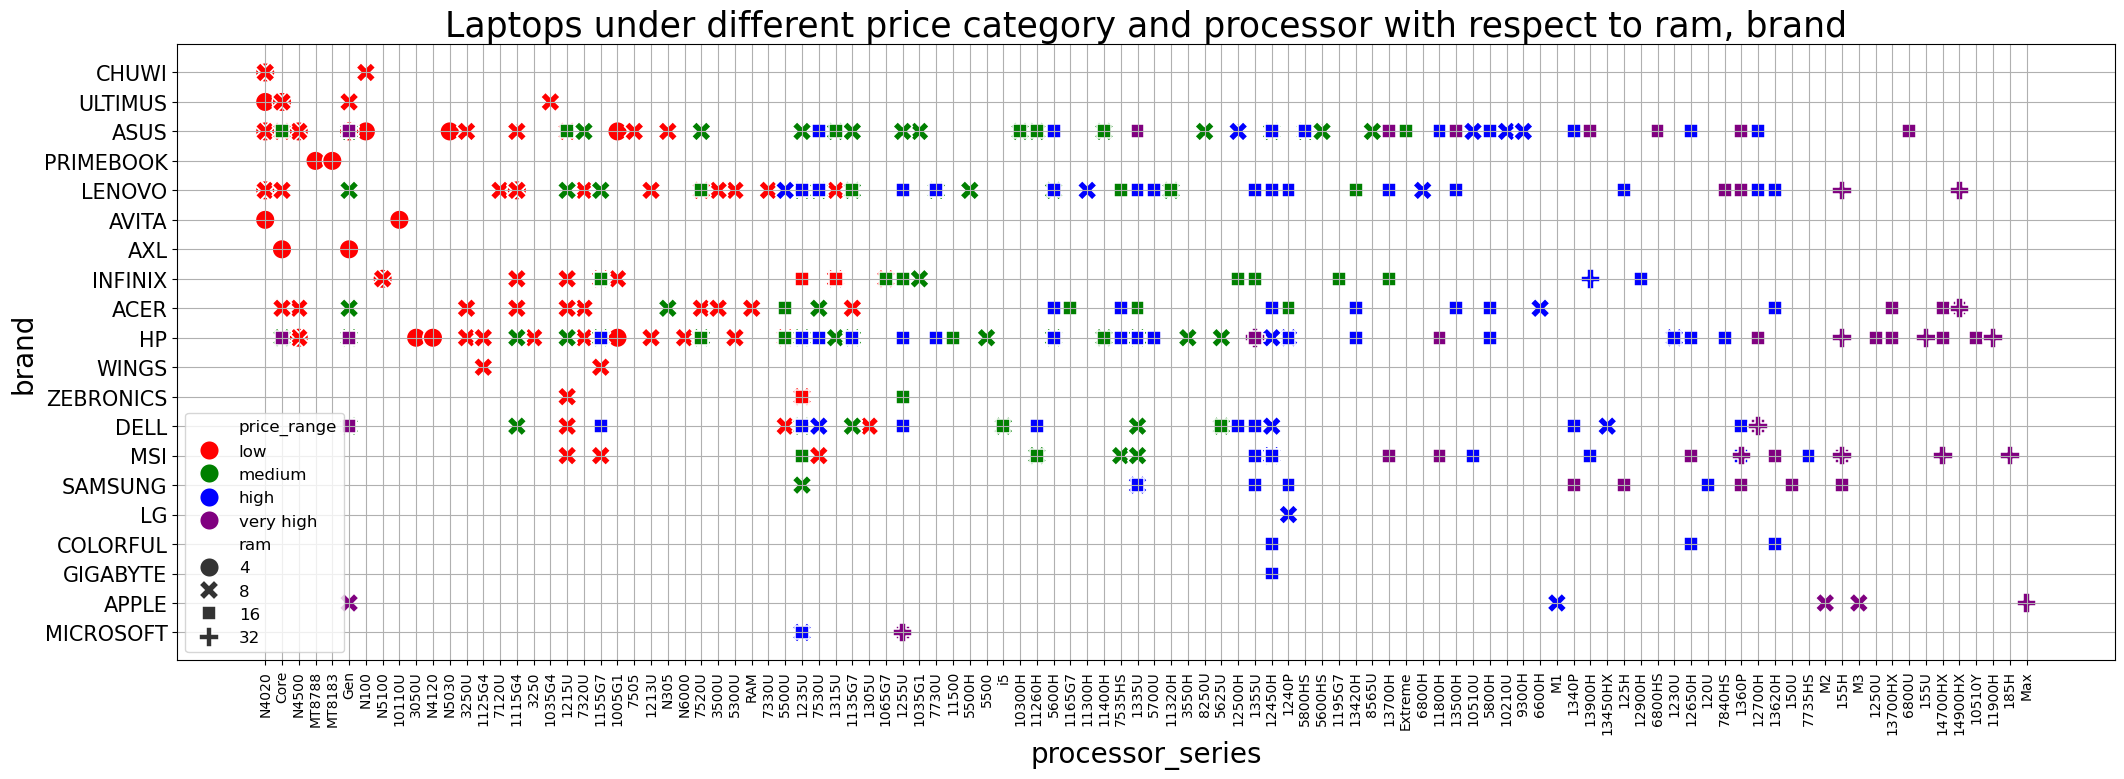

In [346]:
plt.figure(figsize=[25,8])
sns.scatterplot(data=df,y='brand',x='processor_series',hue='price_range',style='ram',
                palette=['red','green','blue','purple'],s=200)

plt.grid()
plt.xticks(rotation=90,size=10)
plt.yticks(size=15)
plt.xlabel(xlabel='processor_series',size=20)
plt.ylabel(ylabel='brand',size=20)
plt.title('Laptops under different price category and processor with respect to ram, brand',size=25)
plt.legend(fontsize=12,loc='lower left')

plt.show()

**insights :**
1. Low price range has more N-series, U-series, G-series processors with (4GB & 8GB RAM )
2. Medium range laptops have  (8GB, 16GB RAM) with similar U, G, H-series processors
3. More high price range laptops are in LENOVO, HP, DELL, ASUS
4. SAMSUNG, LG, MICROSOFT, APPLE have high range and very high price range laptops (8GB, 16GB)

In [347]:
df.columns

Index(['brand', 'model', 'processor', 'ram', 'memory', 'ratings', 'reviews',
       'ram_version', 'display_inch', 'warranty', 'price', 'processor_type',
       'processor_generation', 'processor_series', 'processor_category',
       'ratings_category', 'price_range'],
      dtype='object')

In [348]:
df.groupby(['ratings_category','price_range'],observed=True)['reviews'].mean().unstack()

price_range             low     medium       high  very high
ratings_category                                            
average           38.590909   4.700000   2.666667        NaN
good              66.587786  47.194915  34.722222   4.162162
excellent          3.000000  40.272727  31.347826   3.566667

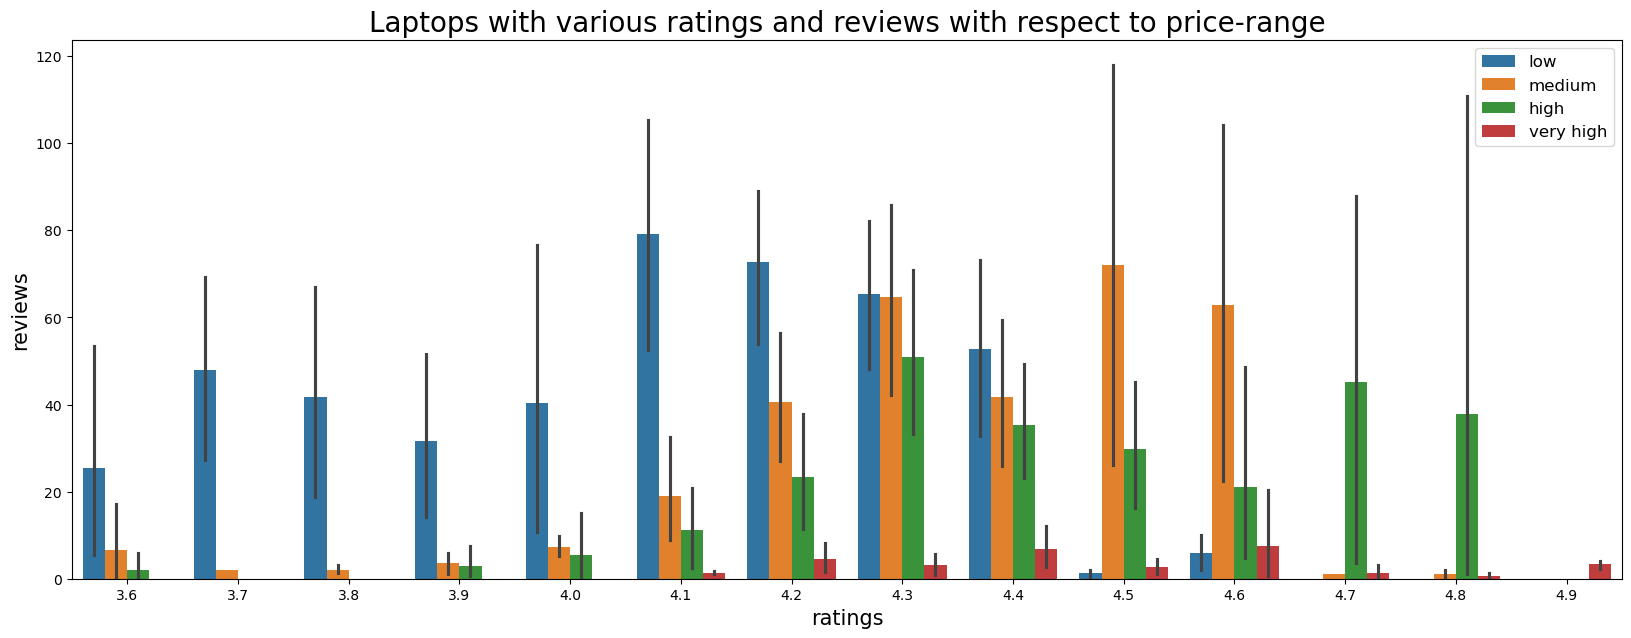

In [396]:
plt.figure(figsize=[20,7])

sns.barplot(data=df, x='ratings', y='reviews', hue='price_range',)

plt.xlabel('ratings',fontsize=15)
plt.ylabel('reviews',fontsize=15)
plt.legend(fontsize=12)
plt.title('Laptops with various ratings and reviews with respect to price-range',size=20)

plt.show()

**insights :**
1. As the ratings increases, there is increase in reviews 
2. Low and medium price range laptops have more reviews and ratings are between 3.6 to 4.6
3. high price range laptops have less more ratings and less reviews
4. low and medium range have more reviews and more ratings
5. high and very high range have less reviews, but ratings are high

### warranty - ratings - reviews

In [350]:
df.groupby(['warranty','ratings'])['reviews'].mean().unstack()

ratings         3.6        3.7   3.8   3.9        4.0         4.1        4.2  \
warranty                                                                       
1         19.235294  45.294118  27.1  19.0  21.190476   40.930233  51.506329   
2          5.500000   0.000000   2.0   3.5        NaN  109.333333  43.058824   

ratings         4.3   4.4        4.5        4.6   4.7        4.8  4.9  
warranty                                                               
1         56.628866  40.0  34.055556  29.423077  21.8  14.090909  3.2  
2         60.846154  26.4  13.444444   3.200000   0.5   0.666667  1.0

<Axes: xlabel='ratings', ylabel='warranty'>

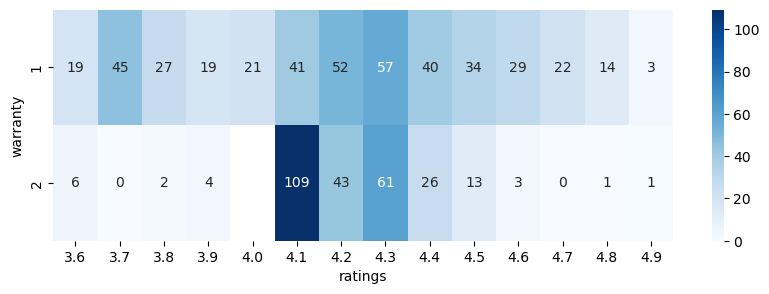

In [351]:
plt.figure(figsize=[10,3])

sns.heatmap(df.groupby(['warranty','ratings'])['reviews'].mean().unstack()
           , cmap='Blues', annot=True, fmt='.0f')

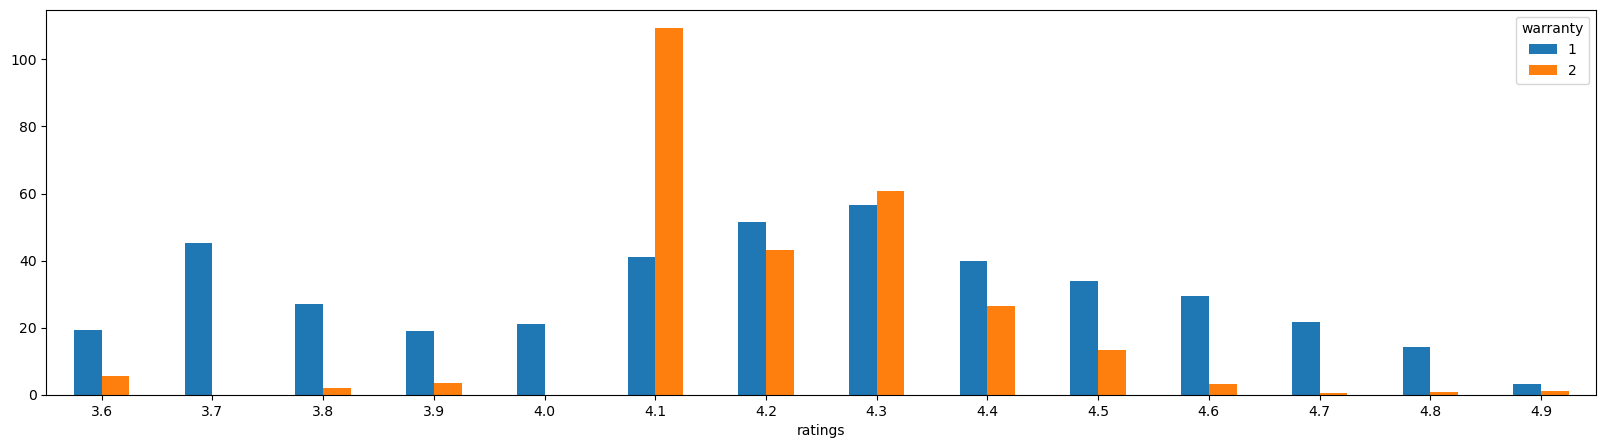

In [352]:
df.pivot_table(values='reviews', index='ratings', columns='warranty').plot(kind='bar',stacked=False,figsize=[20,5])

plt.xticks(rotation=0)
plt.show()

**insights :**
1. 1-year warranty laptops are more reviews and ratings
2. 2-year warranty laptops more reviews with 4.1 rating, slowly the reviews count decreased

### displayInc-warranty-price

In [411]:
df.groupby(['display_inch','warranty'])['price'].describe()

count           mean           std       min  \
display_inch warranty                                                 
12           1           8.0   34775.250000  34620.269091   12990.0   
13           1          21.0  112889.571429  50524.538863   33990.0   
             2           2.0   99990.000000   9899.494937   92990.0   
14           1         142.0   56312.309859  39093.407060   12990.0   
             2           9.0   48992.222222  19074.817678   25300.0   
15           1           8.0   74994.500000  43942.499058   28990.0   
16           1         310.0   56819.874194  34463.092845   16990.0   
             2          60.0   79362.133333  54659.918426   25890.0   
17           1           8.0  105120.250000  60960.067512   51990.0   
             2           5.0  162167.000000  20511.195601  135875.0   

                             25%       50%        75%       max  
display_inch warranty                                            
12           1          13990.00   17981.0   35965.00   99990.0  
13           1          81990.00  107990.0  126890.00  261990.0  
             2          96490.00   99990.0  103490.00  106990.0  
14           1          32125.00   43994.5   69870.50  282990.0  
             2          33990.00   47990.0   64400.00   77190.0  
15           1          34490.00   69307.5  100715.75  145490.0  
16           1          35006.25   49990.0   64990.00  299990.0  
             2          41490.00   66815.0   96246.75  374990.0  
17           1          66617.25   84302.0  125496.75  237890.0  
             2         149990.00  164990.0  169990.00  189990.0

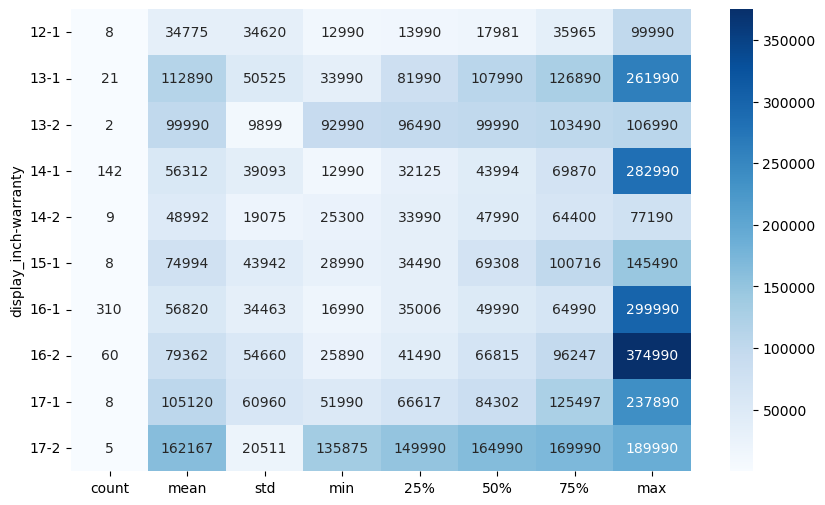

In [417]:
plt.figure(figsize=[10,6])
sns.heatmap(df.groupby(['display_inch','warranty'])['price'].describe()
            ,cmap='Blues', annot=True, fmt='.0f')

plt.yticks(rotation=0)
plt.show()

**insights :**
1. There is a impact of warranty and display_inch on the prices of laptops
2. If warranty increases with same display-inch then price is increasing 40-50%
3. More brands have 14inch, 160inch laptops. These prices are from 13k, 17k
4. Odd display_inches (13, 17) have min price around 33k and max price 1lakh, 190k



### brand - processor_series - price_range - display_inch 



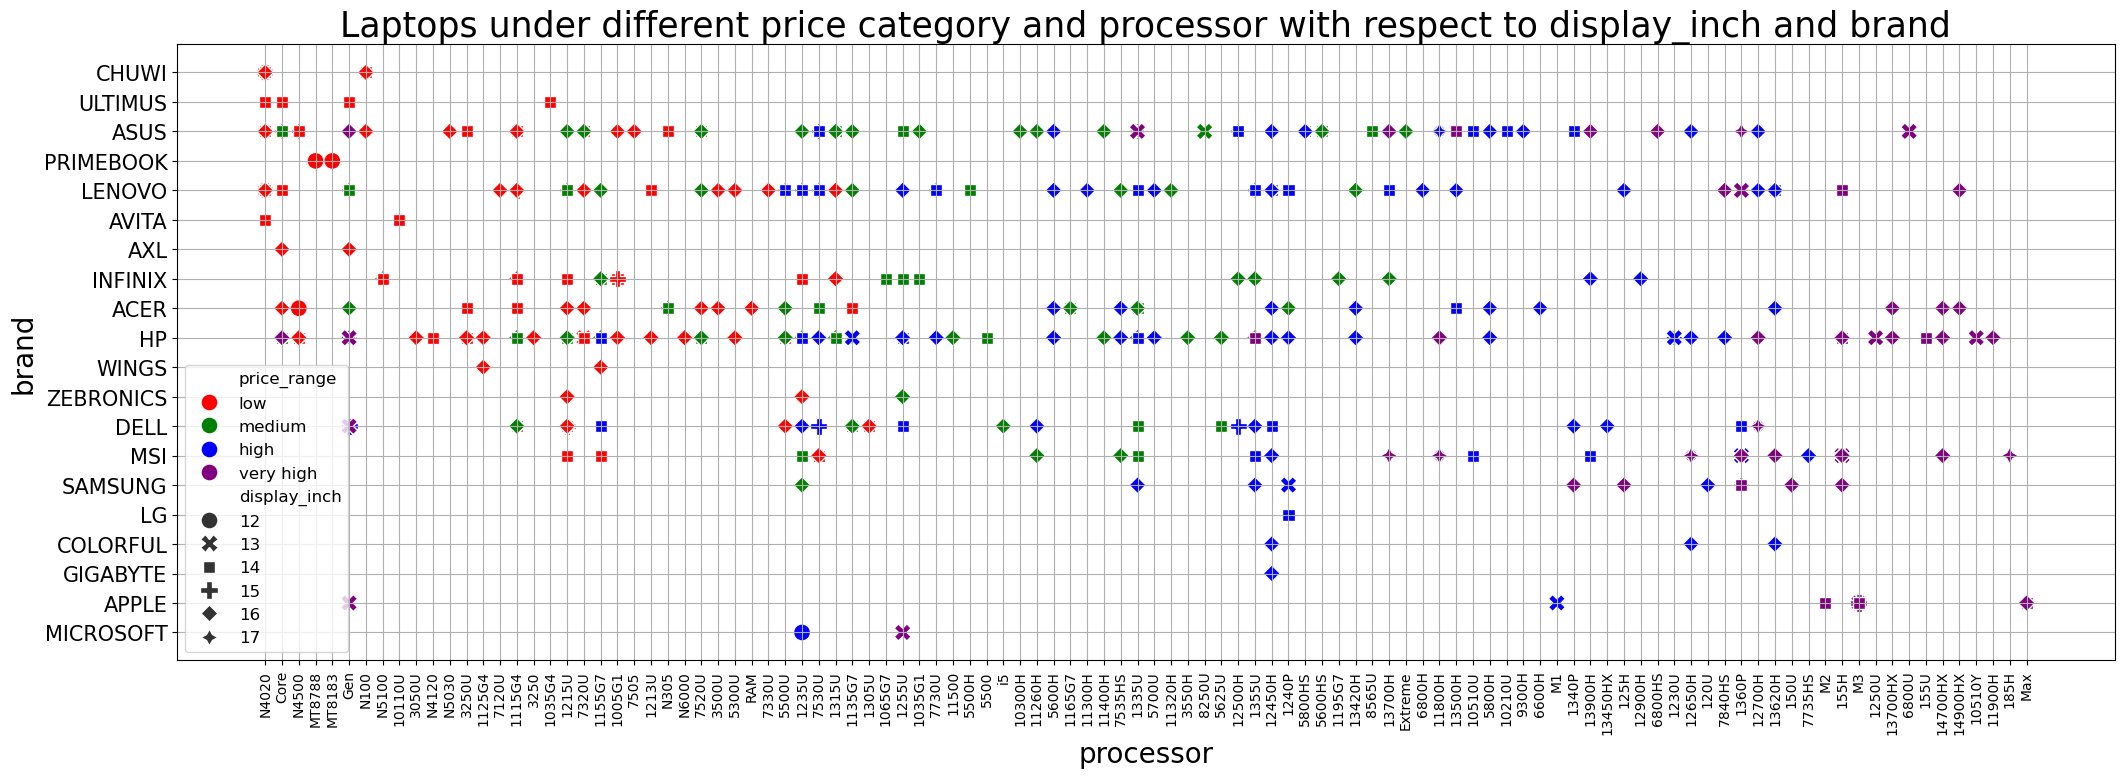

In [419]:
plt.figure(figsize=[25,8])
sns.scatterplot(data=df,y='brand',x='processor_series',hue='price_range',style='display_inch',
                palette=['red','green','blue','purple'],s=150)

plt.grid()
plt.xticks(rotation=90,size=10)
plt.yticks(size=15)
plt.xlabel(xlabel='processor',size=20)
plt.ylabel(ylabel='brand',size=20)
plt.title('Laptops under different price category and processor with respect to display_inch and brand',size=25)
plt.legend(fontsize=12,loc='lower left')

plt.show()

**insights :**
1. ASUS, LENOVO, INFINIX, ACER, HP, MSI are offering 14, 16inch displays
2. MICROSOFT, APPLE, SAMSUNG are offering 12, 13, 16ich displays
3. CHUWI, GIGABYTE, ZEBRONICS COLORFUL, WINGS, AXL are providing only 16inch displays
4. ULTIMUS, AVITA, LG are providing only 14inch displays

### brand - processor_category - correlation

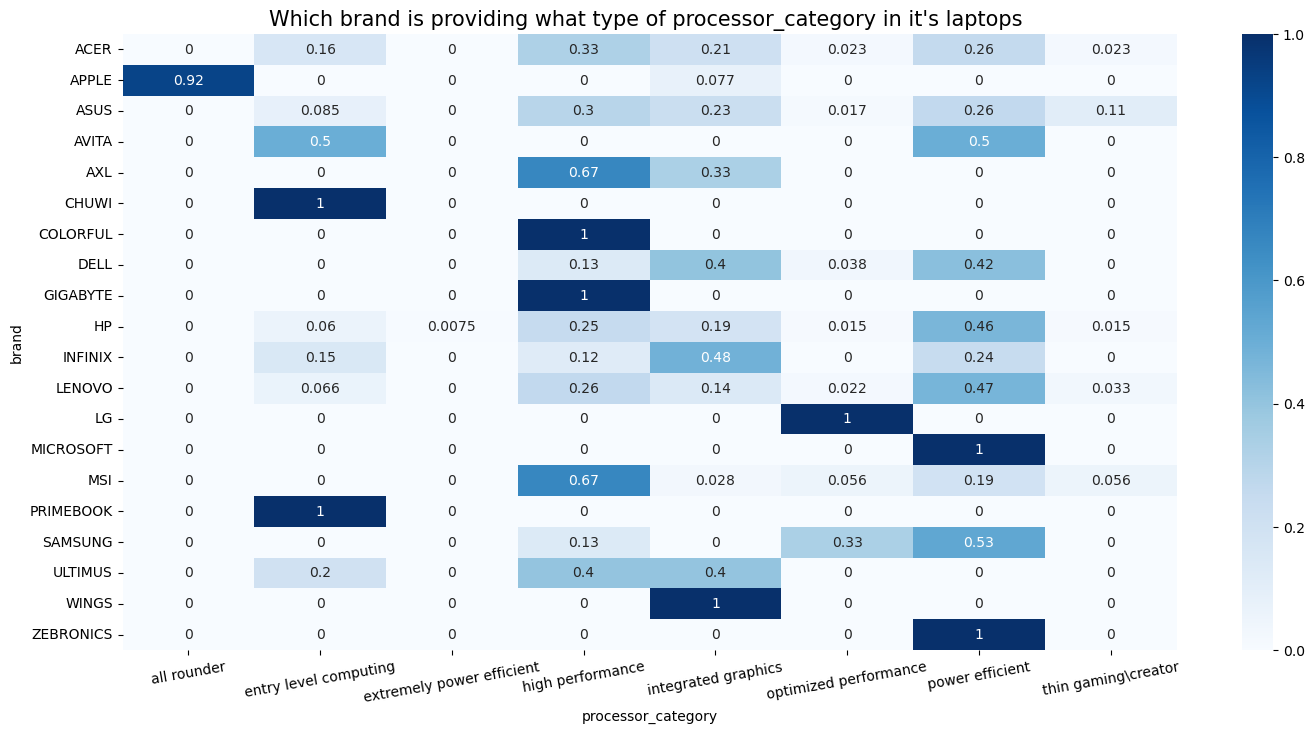

In [536]:
plt.figure(figsize=[17,8])

sns.heatmap(pd.crosstab(index = df['brand'],columns=df['processor_category'],normalize='index'), 
            cmap='Blues', annot=True)
plt.title("Which brand is providing what type of processor_category in it's laptops ", size=15)
plt.xticks(rotation=10,size=10)
plt.show()

**insights :**
1. AAPLE, CHUWI, COLORFUL, GIGABYTE, LG, MICROSOFT, PRIMEBOOK, WINGS, ZEBRONICS all these brands are provide ONE respective processor_category to all it's models
2. ACER, ASUS, HP, INFINIX, LENOVO, MSI are providing more variety of processor_category to it's laptops
3. AVITA, AXL, ULTIMUS, SAMSUNG, DELL are providing 2-4 processor category processors to it's laptops

### processor_type - price_range

In [448]:
pd.crosstab(index=df['processor_type'], columns=[df['price_range']],normalize='index')

price_range          low    medium      high  very high
processor_type                                         
Core 5          0.000000  0.000000  1.000000   0.000000
Core 7          0.000000  0.000000  0.500000   0.500000
Core i3         0.864078  0.135922  0.000000   0.000000
Core i5         0.094675  0.485207  0.402367   0.017751
Core i7         0.011905  0.154762  0.452381   0.380952
Core i9         0.000000  0.000000  0.375000   0.625000
Ryzen 3         0.923077  0.076923  0.000000   0.000000
Ryzen 5         0.294118  0.514706  0.191176   0.000000
Ryzen 7         0.000000  0.250000  0.535714   0.214286
Ultra 5         0.000000  0.000000  0.500000   0.500000
Ultra 7         0.000000  0.000000  0.000000   1.000000
Ultra 9         0.000000  0.000000  0.000000   1.000000
others          0.708333  0.083333  0.083333   0.125000

<Axes: xlabel='price_range', ylabel='processor_type'>

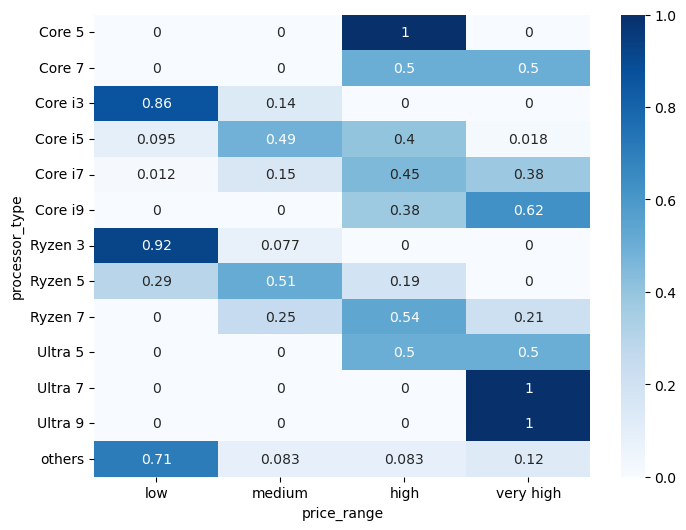

In [468]:
plt.figure(figsize=[8,6])
sns.heatmap(pd.crosstab(index=df['processor_type'], columns=[df['price_range']],normalize='index'),
           cmap='Blues', annot=True)

**insights :**
1. Low performance prcessors are available only in low and medium price ranges
2. Medium performance processors are available more in medium and high price range
3. High performance laptops are available only in high and/or very high high price range

### processor_generation - price_range

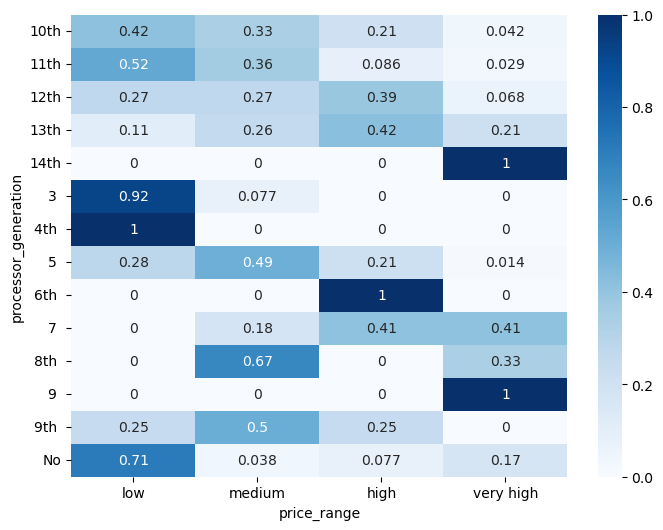

In [471]:
plt.figure(figsize=[8,6])

sns.heatmap(pd.crosstab(index=df['processor_generation'], columns=[df['price_range']],normalize='index'),
           cmap = 'Blues', annot=True)

plt.yticks(rotation=0)
plt.show()

**insights :**
1. latest processor generations are available in very high price range laptops
2. 10th, 11th gen processor are in old laptops which are low range
3. 12th, 13th gen processor are currently available in many laptops mainly in high and/or very high range
4. 3, 5, 7, 9 are available in low to medium, low to high, medium to very high, only very high
5. No generation are available more in low, less in medium, high and very high

In [362]:
df

brand                     model                         processor  \
0        CHUWI        Intel Celeron Dual          Dual Core 10th Gen N4020   
1      ULTIMUS        Intel Celeron Dual     Intel Celeron Dual Core N4020   
2      ULTIMUS        Intel Celeron Dual   Ultimus Intel Celeron Dual Core   
3         ASUS  Chromebook Intel Celeron     Intel Celeron Dual Core N4500   
4    PRIMEBOOK          4G Android Based  4G Android Based MediaTek MT8788   
..         ...                       ...                               ...   
568       ACER        Predator Helios 16          Core i9 14th Gen 14900HX   
569  MICROSOFT             Surface Pro 9            Core i7 12th Gen 1255U   
570      APPLE          2023 MacBook Pro          MacBook Pro Apple M2 Max   
571      APPLE          2021 Macbook Pro          Macbook Pro Apple M1 Max   
572     LENOVO         Legion Intel Core          Core i9 14th Gen 14900HX   

     ram  memory  ratings  reviews ram_version  display_inch  warranty  \
0      4     128      3.6        5        DDR4            12         1   
1      4     128      3.7       41        DDR4            14         1   
2      4     128      3.7       77        DDR4            14         1   
3      4      64      3.8      113       DDR4X            14         1   
4      4      64      4.2      147        DDR4            12         1   
..   ...     ...      ...      ...         ...           ...       ...   
568   32    1000      4.3        0        DDR5            16         1   
569   32    1000      4.3        0        DDR5            13         1   
570   32    1000      4.2        0        DDR4            14         1   
571   32    1000      4.2        5        DDR4            16         1   
572   32    1000      4.2        5        DDR5            16         2   

      price processor_type processor_generation processor_series  \
0     12990         others                 10th            N4020   
1     12990         others                   No            N4020   
2     12990         others                   No             Core   
3     13990         others                   No            N4500   
4     13990         others                   No           MT8788   
..      ...            ...                  ...              ...   
568  249999        Core i9                 14th          14900HX   
569  261990        Core i7                 12th            1255U   
570  282990         others                   No              Max   
571  299990         others                   No              Max   
572  374990        Core i9                 14th          14900HX   

        processor_category ratings_category price_range  
0    entry level computing          average         low  
1    entry level computing          average         low  
2         high performance          average         low  
3    entry level computing          average         low  
4    entry level computing             good         low  
..                     ...              ...         ...  
568       high performance             good   very high  
569        power efficient             good   very high  
570            all rounder             good   very high  
571            all rounder             good   very high  
572       high performance             good   very high  

[573 rows x 17 columns]

In [363]:
df.select_dtypes('int').corr()

ram    memory   reviews  display_inch  warranty     price
ram           1.000000  0.506714 -0.254583      0.088182  0.146134  0.721978
memory        0.506714  1.000000 -0.230032      0.217386  0.117160  0.527109
reviews      -0.254583 -0.230032  1.000000     -0.015023 -0.053814 -0.310406
display_inch  0.088182  0.217386 -0.015023      1.000000  0.159177  0.011256
warranty      0.146134  0.117160 -0.053814      0.159177  1.000000  0.176466
price         0.721978  0.527109 -0.310406      0.011256  0.176466  1.000000

In [364]:
df.apply(lambda x : pd.factorize(x)[0]).corr()

brand     model  processor       ram    memory  \
brand                 1.000000  0.293881   0.272408  0.153699  0.038031   
model                 0.293881  1.000000   0.813287  0.635417  0.185368   
processor             0.272408  0.813287   1.000000  0.662246  0.256698   
ram                   0.153699  0.635417   0.662246  1.000000  0.296916   
memory                0.038031  0.185368   0.256698  0.296916  1.000000   
ratings               0.191626  0.381479   0.388119  0.243001  0.098814   
reviews               0.003950  0.121267   0.100855  0.120992  0.171721   
ram_version           0.109704  0.408614   0.397057  0.370446 -0.001116   
display_inch          0.117812  0.284542   0.333549  0.193457  0.101698   
warranty              0.149292  0.156966   0.140279  0.149729  0.018247   
price                 0.299581  0.886872   0.903492  0.733277  0.223531   
processor_type        0.125625  0.598061   0.662480  0.652713  0.249019   
processor_generation  0.029685  0.400209   0.450023  0.438229  0.235000   
processor_series      0.255239  0.778207   0.857934  0.604941  0.167119   
processor_category    0.251932  0.253089   0.201207  0.127884  0.242138   
ratings_category      0.159630  0.478394   0.434938  0.276805  0.193378   
price_range           0.286035  0.848169   0.862163  0.694812  0.120718   

                       ratings   reviews  ram_version  display_inch  warranty  \
brand                 0.191626  0.003950     0.109704      0.117812  0.149292   
model                 0.381479  0.121267     0.408614      0.284542  0.156966   
processor             0.388119  0.100855     0.397057      0.333549  0.140279   
ram                   0.243001  0.120992     0.370446      0.193457  0.149729   
memory                0.098814  0.171721    -0.001116      0.101698  0.018247   
ratings               1.000000 -0.072116     0.204686      0.183416  0.016127   
reviews              -0.072116  1.000000    -0.003033      0.021525  0.001923   
ram_version           0.204686 -0.003033     1.000000      0.124445  0.111469   
display_inch          0.183416  0.021525     0.124445      1.000000  0.123512   
warranty              0.016127  0.001923     0.111469      0.123512  1.000000   
price                 0.399566  0.116536     0.396037      0.321383  0.181464   
processor_type        0.212243  0.119403     0.429884      0.181712  0.158526   
processor_generation  0.147174  0.019562     0.412574      0.111076  0.044164   
processor_series      0.345775  0.111076     0.408983      0.242775  0.194432   
processor_category    0.134185  0.031354    -0.027784      0.120627 -0.101738   
ratings_category      0.659024  0.060713     0.237328      0.219286  0.080854   
price_range           0.408360  0.084065     0.409744      0.303095  0.162971   

                         price  processor_type  processor_generation  \
brand                 0.299581        0.125625              0.029685   
model                 0.886872        0.598061              0.400209   
processor             0.903492        0.662480              0.450023   
ram                   0.733277        0.652713              0.438229   
memory                0.223531        0.249019              0.235000   
ratings               0.399566        0.212243              0.147174   
reviews               0.116536        0.119403              0.019562   
ram_version           0.396037        0.429884              0.412574   
display_inch          0.321383        0.181712              0.111076   
warranty              0.181464        0.158526              0.044164   
price                 1.000000        0.660221              0.426410   
processor_type        0.660221        1.000000              0.580118   
processor_generation  0.426410        0.580118              1.000000   
processor_series      0.808358        0.617734              0.394754   
processor_category    0.208187        0.041997              0.176219   
ratings_category      0.454220        0.237775              0.2

### correlation 

<Axes: >

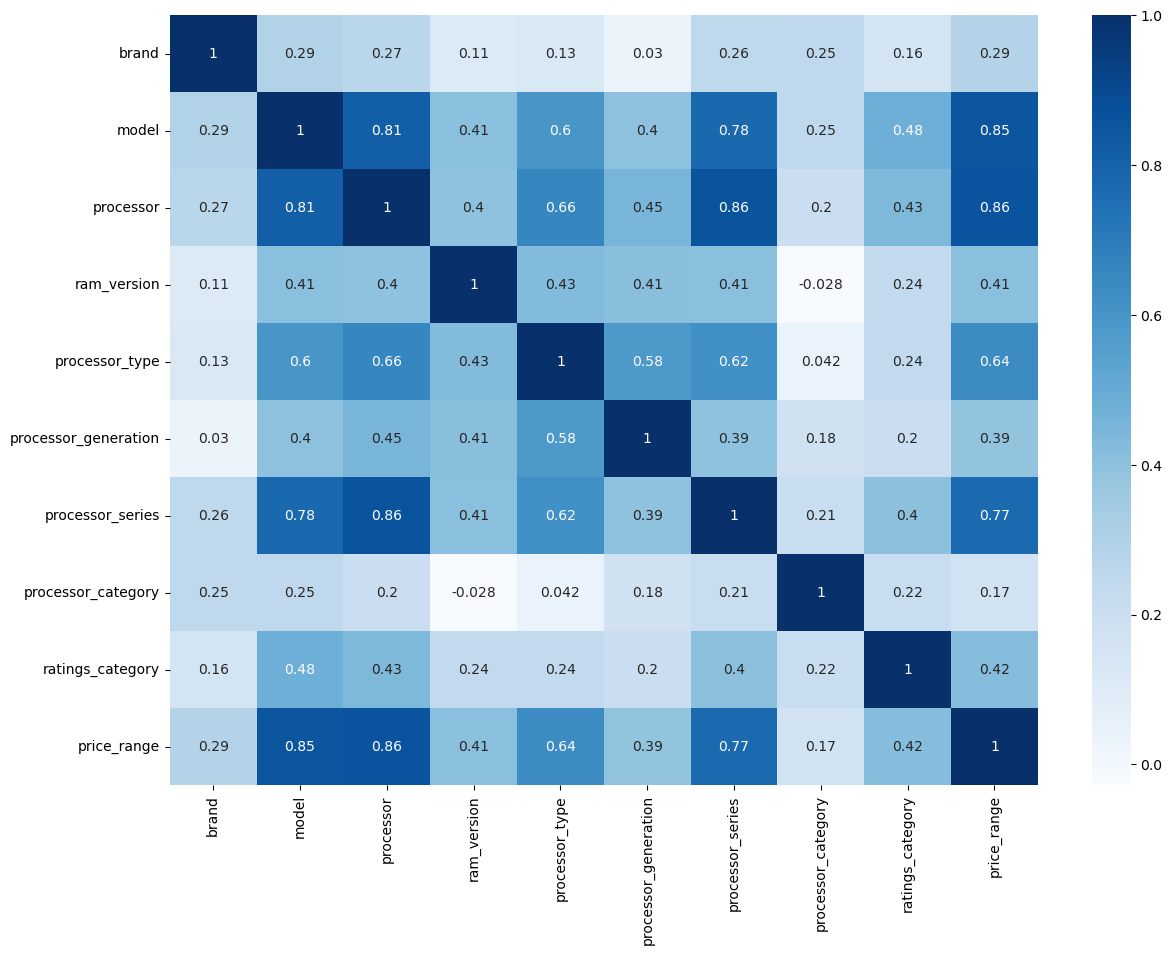

In [365]:
plt.figure(figsize=[14,10])

sns.heatmap(df.select_dtypes(
            ['object','category']).apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', numeric_only=True,min_periods=1),
           cmap='Blues', annot=True )


- correlation  numeric columns
- brand - processor_category - price
- brand - price - price_range
- processor_gen - process_type - price
- processor_type - proce_cat - price
- ram_verison - ram - price
- ram - memory - price
- processor_series - price - ram
- brand - price - memory - ram
- brand - processor_series - price_range - ram
- ratings - reviews - price
- price_range, ratings_category
- warranty - ratings - reviews
- display_inch - warranty - price
- brand - processor_series - price 

# conclusion : 
Unveiling the Secrets of Laptop Prices
-

In this captivating journey through the world of laptops, we’ve explored the intricate dance between specifications and prices. Our dataset, comprising a whopping 573 laptops, allowed us to delve into the fascinating factors that influence laptop costs. 



Here are the key takeaways from our analysis:
-

**Features Matter:**
- Laptops come in various flavors, each with its unique set of specifications. From processor type, generation, series and category to RAM size to Memory and display inches to warranty, these features play a pivotal role in determining the price tag. Brands also contribute significantly to the final cost.

**Processor Power:**
- The heart of any laptop lies in its processor. We observed that higher-priced laptops tend to feature more powerful processors. Whether it’s an Intel Core i9 or an AMD Ryzen 9, or an M-Seires chip the choice impacts the price significantly.

**RAM and Storage:** 
- RAM and Memory play a crucial role. As RAM size increases, so does the price. Similarly, opting for larger storage space (Memory-SSD) affects the overall cost.

**Display Delight:**
- The display size matter. Larger screens with higher resolutions often come with a premium price. Whether you’re eyeing a compact 13-inch laptop or a spacious 17-inch beast, be prepared to pay accordingly.

**Brand Loyalty:** 
- Brand loyalty is real! Some laptop brands command higher prices due to their reputation, build quality, and customer support. Apple, Dell, Microsoft, Samsung, Lenovo, Asus and HP are prime examples.

**Warranty Wisdom:** 
- Extended warranties add to the cost. Buyers willing to invest in peace of mind may opt for longer warranty periods, even if it means a slightly higher price.

**Reviews and Ratings:**
- Surprisingly, reviews become scarcer. But don’t worry—normal ratings prevail, laptop prices remain unaffected by user reviews and ratings. High-end laptops often have fewer reviews, yet their prices remain steady. It’s as if they exude confidence!

**The Price Spectrum:**
- As we ascend the price ladder, Whether you’re spending on a premium laptop or sticking to a budget-friendly option, the balance remains.

In summary, our EDA journey has demystified the laptop market. Armed with data-driven insights, we can confidently navigate the vast sea of laptops, making informed decisions based on our preferences and budget.
So, whether you’re a tech enthusiast, a prospective buyer, or simply curious about the laptop landscape, remember this: Behind every sleek design and glowing screen lies a fascinating interplay of specs and prices. Happy laptop hunting! 🎉🔍💻
